# Taller fundamentos

## Librerias

In [152]:
!pip install bayesian-optimization

In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import math

In [2]:
import pickle
from sklearn.preprocessing import scale
import os.path as osp
import os
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    StandardScaler, MinMaxScaler, OneHotEncoder
)
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import roc_auc_score, f1_score
from sklearn import set_config
set_config(display="diagram")

from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from pprint import pprint

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from bayes_opt import BayesianOptimization
from bayes_opt.logger import JSONLogger
from bayes_opt.event import Events

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score

from sklearn.model_selection import GridSearchCV

from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from pprint import pprint
import collections

# Algorithmns models to be compared
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import cohen_kappa_score
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import make_scorer, cohen_kappa_score
from sklearn.model_selection import KFold, cross_val_predict

import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import VarianceThreshold
from IPython.display import clear_output
import collections
from sklearn.linear_model import Lasso
from sklearn.feature_selection import VarianceThreshold
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
import math
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
%matplotlib inline

## Funciones

In [3]:
### En esta funcion se realiza todo el tratamiento de datos y transformaciones pertinentes para el desarrollo del modelo
def convertir_tipos_de_test(train):

    # Convertir columnas a tipo 'str'
    train['GRUPO_ETAREO'] = train['GRUPO_ETAREO'].astype(str)
    train['ESTADO_CIVIL'] = train['ESTADO_CIVIL'].astype(str)
    train['TipoAfiliado'] = train['TipoAfiliado'].astype(str)
    train['Estrato'] = train['Estrato'].astype(str)
    train['ALBUMINA'] = train['ALBUMINA'].astype(str)
    train['ALBUMINURIA'] = train['ALBUMINURIA'].astype(str)
    train['ALBUMINURIA24'] = train['ALBUMINURIA24'].astype(str)
    train['CREATININA_24'] = train['CREATININA_24'].astype(str)
    train['CREATININA_DEPURACION'] = train['CREATININA_DEPURACION'].astype(str)
    train['CREATININA_EN_SUERO_ORINA_OTROS'] = train['CREATININA_EN_SUERO_ORINA_OTROS'].astype(str)
    train['FOSFORO'] = train['FOSFORO'].astype(str)
    train['HDL'] = train['HDL'].astype(str)
    train['HEMOGLOBINA'] = train['HEMOGLOBINA'].astype(str)
    train['HEMOGLOBINA_GLICOSILADA'] = train['HEMOGLOBINA_GLICOSILADA'].astype(str)
    train['LDL'] = train['LDL'].astype(str)
    train['PROTEINURIA'] = train['PROTEINURIA'].astype(str)
    train['PTH'] = train['PTH'].astype(str)
    train['RELACION_ALBUMINURIA_CREATINURIA'] = train['RELACION_ALBUMINURIA_CREATINURIA'].astype(str)
    train['TRIGLICERIDOS'] = train['TRIGLICERIDOS'].astype(str)
    train['UROANALISIS'] = train['UROANALISIS'].astype(str)
    train['ANTIHIPERTENSIVOS'] = train['ANTIHIPERTENSIVOS'].map({'SI': 1, 'NO': 0}).astype(str)
    train['AEI'] = train['AEI'].map({'SI': 1, 'NO': 0}).astype(str)

    # Convertir columnas a tipo 'int'
    train['GENERO'] = train['GENERO'].replace('F', '0')
    train['GENERO'] = train['GENERO'].replace('M', '1')
    train['GENERO'] = train['GENERO'].astype(int)
    train['CANCER_MAMA_FAMILIAR'] = train['CANCER_MAMA_FAMILIAR'].astype(int)
    train['CANCER_OTRO_SITIO_FAMILIAR'] = train['CANCER_OTRO_SITIO_FAMILIAR'].astype(int)
    train['HIPERTENSION_FAMILIAR'] = train['HIPERTENSION_FAMILIAR'].astype(int)
    train['DIABETES_FAMILIAR'] = train['DIABETES_FAMILIAR'].astype(int)
    train['CORONARIOS_FAMILIAR'] = train['CORONARIOS_FAMILIAR'].astype(int)
    train['CEREBRAL_FAMILIAR'] = train['CEREBRAL_FAMILIAR'].astype(int)
    train['ENFERMEDAD_RENAL_FAMILIAR'] = train['ENFERMEDAD_RENAL_FAMILIAR'].astype(int)
    train['RIESGOS'] = train['RIESGOS'].astype(int)
    train['IV_NIVEL'] = train['IV_NIVEL'].astype(int)
    train['HOSPI_NO_QUIRURGICA'] = train['HOSPI_NO_QUIRURGICA'].astype(int)
    train['CANTIDAD_URGENCIAS'] = train['CANTIDAD_URGENCIAS'].astype(int)
    train['HOSPITALIZACION'] = train['HOSPITALIZACION'].astype(int)
    train['SERVICIOS'] = train['SERVICIOS'].astype(int)
    train['MEDICAMENTOS'] = train['MEDICAMENTOS'].astype(int)


    # Convertir columnas a tipo 'float'
    train['Antiguedad_paciente'] = train['Antiguedad_paciente'].astype(float)
    train['Tiempo_Ultima_cita'] = train['Tiempo_Ultima_cita'].astype(float)
    train['TSISTOLICA'] = train['TSISTOLICA'].astype(float)
    train['TDIASTOLICA'] = train['TDIASTOLICA'].astype(float)
    train['CMes_6'] = train['CMes_6'].astype(float)
    train['CMes_5'] = train['CMes_5'].astype(float)
    train['CMes_4'] = train['CMes_4'].astype(float)
    train['CMes_3'] = train['CMes_3'].astype(float)
    train['CMes_2'] = train['CMes_2'].astype(float)
    train['CMes_1'] = train['CMes_1'].astype(float)
    train['SMes_1'] = train['SMes_1'].astype(float)
    train['SMes_2'] = train['SMes_2'].astype(float)
    train['SMes_3'] = train['SMes_3'].astype(float)
    train['SMes_4'] = train['SMes_4'].astype(float)
    train['SMes_5'] = train['SMes_5'].astype(float)
    train['SMes_6'] = train['SMes_6'].astype(float)
    train['MMes_1'] = train['MMes_1'].astype(float)
    train['MMes_2'] = train['MMes_2'].astype(float)
    train['MMes_3'] = train['MMes_3'].astype(float)
    train['MMes_4'] = train['MMes_4'].astype(float)
    train['MMes_5'] = train['MMes_5'].astype(float)
    train['MMes_6'] = train['MMes_6'].astype(float)

    # Convertir columnas de fecha a tipo datetime
    train['FECHA_ULTIMA_CITA'] = pd.to_datetime(train['FECHA_ULTIMA_CITA'], errors='coerce')
    train['FECHA_ALBUMINA_LAB'] = pd.to_datetime(train['FECHA_ALBUMINA_LAB'], errors='coerce')
    train['FECHA_ALBUMINURIA_LAB'] = pd.to_datetime(train['FECHA_ALBUMINURIA_LAB'], errors='coerce')
    train['FECHA_ALBUMINURIA24_LAB'] = pd.to_datetime(train['FECHA_ALBUMINURIA24_LAB'], errors='coerce')
    train['FECHA_CREATININA_24_LAB'] = pd.to_datetime(train['FECHA_CREATININA_24_LAB'], errors='coerce')
    train['FECHA_CREATININA_DEPURACION_LAB'] = pd.to_datetime(train['FECHA_CREATININA_DEPURACION_LAB'], errors='coerce')
    train['FECHA_CREATININA_EN_SUERO_ORINA_OTROS_LAB'] = pd.to_datetime(train['FECHA_CREATININA_EN_SUERO_ORINA_OTROS_LAB'], errors='coerce')
    train['FECHA_FOSFORO_LAB'] = pd.to_datetime(train['FECHA_FOSFORO_LAB'], errors='coerce')
    train['FECHA_HDL_LAB'] = pd.to_datetime(train['FECHA_HDL_LAB'], errors='coerce')
    train['FECHA_COLESTEROL_TOTAL_LAB'] = pd.to_datetime(train['FECHA_COLESTEROL_TOTAL_LAB'], errors='coerce')
    train['FECHA_HEMOGLOBINA_LAB'] = pd.to_datetime(train['FECHA_HEMOGLOBINA_LAB'], errors='coerce')
    train['FECHA_HEMOGLOBINA_GLICOSILADA_LAB'] = pd.to_datetime(train['FECHA_HEMOGLOBINA_GLICOSILADA_LAB'], errors='coerce')
    train['FECHA_LDL_LAB'] = pd.to_datetime(train['FECHA_LDL_LAB'], errors='coerce')
    train['FECHA_PROTEINURIA_LAB'] = pd.to_datetime(train['FECHA_PROTEINURIA_LAB'], errors='coerce')
    train['FECHA_PTH_LAB'] = pd.to_datetime(train['FECHA_PTH_LAB'], errors='coerce')
    train['FECHA_RELACION_ALBUMINURIA_CREATINURIA_LAB'] = pd.to_datetime(train['FECHA_RELACION_ALBUMINURIA_CREATINURIA_LAB'], errors='coerce')
    train['FECHA_TRIGLICERIDOS_LAB'] = pd.to_datetime(train['FECHA_TRIGLICERIDOS_LAB'], errors='coerce')
    train['FECHA_UROANALISIS_LAB'] = pd.to_datetime(train['FECHA_UROANALISIS_LAB'], errors='coerce')
    train['FECHA_CERO'] = pd.to_datetime(train['FECHA_CERO'], errors='coerce')

    ## eliminar filas innecesarias
    train = train.drop(['EXFUMADOR', 'FUMADOR'], axis = 1)


    ##imputamos atipicos
    train=imputer_quantile(train, 'TSISTOLICA', 0.001, 0.9995)
    train=imputer_quantile(train, 'TDIASTOLICA', 0.001, 0.9992)
    train=imputer_quantile(train, 'SMes_6', 0.001, 0.99999)

    quantile001 = train['Antiguedad_paciente'].quantile(0.01111)
    train['Antiguedad_paciente'] = np.where(train['Antiguedad_paciente'] < quantile001, quantile001, train['Antiguedad_paciente'])


    ## transformar variables de tipo fecha a dias transcurridos
    columnas_de_fecha = train.select_dtypes(include=['datetime64']).columns
    for columna_fecha in columnas_de_fecha:
        nombre_nueva_columna = f'DIAS_{columna_fecha}'
        train[nombre_nueva_columna] = (train['FECHA_CERO'] - train[columna_fecha]).dt.days
    train = train.drop(columnas_de_fecha, axis=1)

    ## manejo de columnas faltantes en dias
    columnas_interes = ['DIAS_FECHA_ULTIMA_CITA', 'DIAS_FECHA_ALBUMINA_LAB',
                    'DIAS_FECHA_ALBUMINURIA_LAB', 'DIAS_FECHA_ALBUMINURIA24_LAB',
                    'DIAS_FECHA_COLESTEROL_TOTAL_LAB', 'DIAS_FECHA_CREATININA_24_LAB',
                    'DIAS_FECHA_CREATININA_DEPURACION_LAB', 'DIAS_FECHA_CREATININA_EN_SUERO_ORINA_OTROS_LAB',
                    'DIAS_FECHA_FOSFORO_LAB', 'DIAS_FECHA_HDL_LAB',
                    'DIAS_FECHA_HEMOGLOBINA_LAB', 'DIAS_FECHA_HEMOGLOBINA_GLICOSILADA_LAB',
                    'DIAS_FECHA_LDL_LAB', 'DIAS_FECHA_PROTEINURIA_LAB',
                    'DIAS_FECHA_PTH_LAB', 'DIAS_FECHA_RELACION_ALBUMINURIA_CREATINURIA_LAB',
                    'DIAS_FECHA_TRIGLICERIDOS_LAB', 'DIAS_FECHA_UROANALISIS_LAB']

    ## Se transforma la variable a dias
    train['Antiguedad_paciente'] = train['Antiguedad_paciente'] * 365

    for columna in columnas_interes:
      train[columna].fillna(train['Antiguedad_paciente'], inplace=True)
      #train[columna] = np.where(train[columna] < 0, train['Antiguedad_paciente'], train[columna])


    nombre_columna_a_eliminar = 'DIAS_FECHA_CERO'
    train = train.drop(columns=[nombre_columna_a_eliminar])

    columnas_a_eliminar = [
    'PROTEINURIA',
    'ALBUMINA',
    'ALBUMINURIA',
    'ALBUMINURIA24',
    'COLESTEROL_TOTAL',
    'CREATININA_24',
    'CREATININA_DEPURACION',
    'CREATININA_EN_SUERO_ORINA_OTROS',
    'FOSFORO',
    'HDL',
    'HEMOGLOBINA',
    'HEMOGLOBINA_GLICOSILADA',
    'LDL',
    'PTH',
    'RELACION_ALBUMINURIA_CREATINURIA',
    'TRIGLICERIDOS',
    'UROANALISIS']

    # Elimina las columnas redundantes del DataFrame
    train = train.drop(columns=columnas_a_eliminar)
    train['ANTIHIPERTENSIVOS'] = train['ANTIHIPERTENSIVOS'].replace('0.0', '0')
    train['ANTIHIPERTENSIVOS'] = train['ANTIHIPERTENSIVOS'].replace('nan', '0')
    train['ANTIHIPERTENSIVOS']=  train['ANTIHIPERTENSIVOS'].astype(int)
    train['TipoAfiliado']=  train['TipoAfiliado'].replace('None', 'Cotizante')
    train['AEI'] = train['AEI'].replace('nan', '0')
    train['AEI'] = train['AEI'].astype(int)
    train['Estrato'] = train['Estrato'].replace('', '1')
    train['Estrato'] = train['Estrato'].astype(int)
    # Aplica la función a la columna "riesgos" para crear una nueva columna "grupo_riesgos"
    train['grupo_riesgos'] = train['RIESGOS'].apply(agrupar_riesgos)
    train = train.drop(columns=['RIESGOS'])
    ## convertir categoricas
    var_categoricas = ['ESTADO_CIVIL', 'GRUPO_ETAREO', 'TipoAfiliado','GENERO', 'Estrato', 'ANTIHIPERTENSIVOS',
       'AEI', 'CANCER_MAMA_FAMILIAR', 'CANCER_OTRO_SITIO_FAMILIAR',
       'HIPERTENSION_FAMILIAR', 'DIABETES_FAMILIAR', 'CORONARIOS_FAMILIAR',
       'CEREBRAL_FAMILIAR', 'ENFERMEDAD_RENAL_FAMILIAR', 'grupo_riesgos']
    train[var_categoricas]=train[var_categoricas].astype(str)
    return train

In [4]:
### En esta funcion se realiza todo el tratamiento de datos y transformaciones pertinentes para el desarrollo del modelo
def convertir_tipos_de_datos(train):

    # Convertir columnas a tipo 'str'
    train['GRUPO_ETAREO'] = train['GRUPO_ETAREO'].astype(str)
    train['ESTADO_CIVIL'] = train['ESTADO_CIVIL'].astype(str)
    train['TipoAfiliado'] = train['TipoAfiliado'].astype(str)
    train['Estrato'] = train['Estrato'].astype(str)
    train['ALBUMINA'] = train['ALBUMINA'].astype(str)
    train['ALBUMINURIA'] = train['ALBUMINURIA'].astype(str)
    train['ALBUMINURIA24'] = train['ALBUMINURIA24'].astype(str)
    train['CREATININA_24'] = train['CREATININA_24'].astype(str)
    train['CREATININA_DEPURACION'] = train['CREATININA_DEPURACION'].astype(str)
    train['CREATININA_EN_SUERO_ORINA_OTROS'] = train['CREATININA_EN_SUERO_ORINA_OTROS'].astype(str)
    train['FOSFORO'] = train['FOSFORO'].astype(str)
    train['HDL'] = train['HDL'].astype(str)
    train['HEMOGLOBINA'] = train['HEMOGLOBINA'].astype(str)
    train['HEMOGLOBINA_GLICOSILADA'] = train['HEMOGLOBINA_GLICOSILADA'].astype(str)
    train['LDL'] = train['LDL'].astype(str)
    train['PROTEINURIA'] = train['PROTEINURIA'].astype(str)
    train['PTH'] = train['PTH'].astype(str)
    train['RELACION_ALBUMINURIA_CREATINURIA'] = train['RELACION_ALBUMINURIA_CREATINURIA'].astype(str)
    train['TRIGLICERIDOS'] = train['TRIGLICERIDOS'].astype(str)
    train['UROANALISIS'] = train['UROANALISIS'].astype(str)
    train['ANTIHIPERTENSIVOS'] = train['ANTIHIPERTENSIVOS'].map({'SI': 1, 'NO': 0}).astype(str)
    train['AEI'] = train['AEI'].map({'SI': 1, 'NO': 0}).astype(str)

    # Convertir columnas a tipo 'int'
    train['GENERO'] = train['GENERO'].replace('F', '0')
    train['GENERO'] = train['GENERO'].replace('M', '1')
    train['GENERO'] = train['GENERO'].astype(int)
    train['CANCER_MAMA_FAMILIAR'] = train['CANCER_MAMA_FAMILIAR'].astype(int)
    train['CANCER_OTRO_SITIO_FAMILIAR'] = train['CANCER_OTRO_SITIO_FAMILIAR'].astype(int)
    train['HIPERTENSION_FAMILIAR'] = train['HIPERTENSION_FAMILIAR'].astype(int)
    train['DIABETES_FAMILIAR'] = train['DIABETES_FAMILIAR'].astype(int)
    train['CORONARIOS_FAMILIAR'] = train['CORONARIOS_FAMILIAR'].astype(int)
    train['CEREBRAL_FAMILIAR'] = train['CEREBRAL_FAMILIAR'].astype(int)
    train['ENFERMEDAD_RENAL_FAMILIAR'] = train['ENFERMEDAD_RENAL_FAMILIAR'].astype(int)
    train['RIESGOS'] = train['RIESGOS'].astype(int)
    train['IV_NIVEL'] = train['IV_NIVEL'].astype(int)
    train['HOSPI_NO_QUIRURGICA'] = train['HOSPI_NO_QUIRURGICA'].astype(int)
    train['CANTIDAD_URGENCIAS'] = train['CANTIDAD_URGENCIAS'].astype(int)
    train['HOSPITALIZACION'] = train['HOSPITALIZACION'].astype(int)
    train['SERVICIOS'] = train['SERVICIOS'].astype(int)
    train['MEDICAMENTOS'] = train['MEDICAMENTOS'].astype(int)


    # Convertir columnas a tipo 'float'
    train['Antiguedad_paciente'] = train['Antiguedad_paciente'].astype(float)
    train['Tiempo_Ultima_cita'] = train['Tiempo_Ultima_cita'].astype(float)
    train['TSISTOLICA'] = train['TSISTOLICA'].astype(float)
    train['TDIASTOLICA'] = train['TDIASTOLICA'].astype(float)
    train['CMes_6'] = train['CMes_6'].astype(float)
    train['CMes_5'] = train['CMes_5'].astype(float)
    train['CMes_4'] = train['CMes_4'].astype(float)
    train['CMes_3'] = train['CMes_3'].astype(float)
    train['CMes_2'] = train['CMes_2'].astype(float)
    train['CMes_1'] = train['CMes_1'].astype(float)
    train['SMes_1'] = train['SMes_1'].astype(float)
    train['SMes_2'] = train['SMes_2'].astype(float)
    train['SMes_3'] = train['SMes_3'].astype(float)
    train['SMes_4'] = train['SMes_4'].astype(float)
    train['SMes_5'] = train['SMes_5'].astype(float)
    train['SMes_6'] = train['SMes_6'].astype(float)
    train['MMes_1'] = train['MMes_1'].astype(float)
    train['MMes_2'] = train['MMes_2'].astype(float)
    train['MMes_3'] = train['MMes_3'].astype(float)
    train['MMes_4'] = train['MMes_4'].astype(float)
    train['MMes_5'] = train['MMes_5'].astype(float)
    train['MMes_6'] = train['MMes_6'].astype(float)

    # Convertir columnas de fecha a tipo datetime
    train['FECHA_ULTIMA_CITA'] = pd.to_datetime(train['FECHA_ULTIMA_CITA'], errors='coerce')
    train['FECHA_ALBUMINA_LAB'] = pd.to_datetime(train['FECHA_ALBUMINA_LAB'], errors='coerce')
    train['FECHA_ALBUMINURIA_LAB'] = pd.to_datetime(train['FECHA_ALBUMINURIA_LAB'], errors='coerce')
    train['FECHA_ALBUMINURIA24_LAB'] = pd.to_datetime(train['FECHA_ALBUMINURIA24_LAB'], errors='coerce')
    train['FECHA_CREATININA_24_LAB'] = pd.to_datetime(train['FECHA_CREATININA_24_LAB'], errors='coerce')
    train['FECHA_CREATININA_DEPURACION_LAB'] = pd.to_datetime(train['FECHA_CREATININA_DEPURACION_LAB'], errors='coerce')
    train['FECHA_CREATININA_EN_SUERO_ORINA_OTROS_LAB'] = pd.to_datetime(train['FECHA_CREATININA_EN_SUERO_ORINA_OTROS_LAB'], errors='coerce')
    train['FECHA_FOSFORO_LAB'] = pd.to_datetime(train['FECHA_FOSFORO_LAB'], errors='coerce')
    train['FECHA_HDL_LAB'] = pd.to_datetime(train['FECHA_HDL_LAB'], errors='coerce')
    train['FECHA_COLESTEROL_TOTAL_LAB'] = pd.to_datetime(train['FECHA_COLESTEROL_TOTAL_LAB'], errors='coerce')
    train['FECHA_HEMOGLOBINA_LAB'] = pd.to_datetime(train['FECHA_HEMOGLOBINA_LAB'], errors='coerce')
    train['FECHA_HEMOGLOBINA_GLICOSILADA_LAB'] = pd.to_datetime(train['FECHA_HEMOGLOBINA_GLICOSILADA_LAB'], errors='coerce')
    train['FECHA_LDL_LAB'] = pd.to_datetime(train['FECHA_LDL_LAB'], errors='coerce')
    train['FECHA_PROTEINURIA_LAB'] = pd.to_datetime(train['FECHA_PROTEINURIA_LAB'], errors='coerce')
    train['FECHA_PTH_LAB'] = pd.to_datetime(train['FECHA_PTH_LAB'], errors='coerce')
    train['FECHA_RELACION_ALBUMINURIA_CREATINURIA_LAB'] = pd.to_datetime(train['FECHA_RELACION_ALBUMINURIA_CREATINURIA_LAB'], errors='coerce')
    train['FECHA_TRIGLICERIDOS_LAB'] = pd.to_datetime(train['FECHA_TRIGLICERIDOS_LAB'], errors='coerce')
    train['FECHA_UROANALISIS_LAB'] = pd.to_datetime(train['FECHA_UROANALISIS_LAB'], errors='coerce')
    train['FECHA_CERO'] = pd.to_datetime(train['FECHA_CERO'], errors='coerce')

    ## eliminar filas innecesarias
    ## EDAD esta muy correlacionada con grupo etareo, se decide dejar solo grupo etareo
    train = train.drop(['EXFUMADOR', 'FUMADOR'], axis = 1)


    ##imputamos atipicos
    train=imputer_quantile(train, 'TSISTOLICA', 0.001, 0.9995)
    train=imputer_quantile(train, 'TDIASTOLICA', 0.001, 0.9992)
    train=imputer_quantile(train, 'SMes_6', 0.001, 0.99999)

    quantile001 = train['Antiguedad_paciente'].quantile(0.01111)
    train['Antiguedad_paciente'] = np.where(train['Antiguedad_paciente'] < quantile001, quantile001, train['Antiguedad_paciente'])


    ## transformar variables de tipo fecha a dias transcurridos
    columnas_de_fecha = train.select_dtypes(include=['datetime64']).columns
    for columna_fecha in columnas_de_fecha:
        nombre_nueva_columna = f'DIAS_{columna_fecha}'
        train[nombre_nueva_columna] = (train['FECHA_CERO'] - train[columna_fecha]).dt.days
    train = train.drop(columnas_de_fecha, axis=1)

    ## manejo de columnas faltantes en dias
    columnas_interes = ['DIAS_FECHA_ULTIMA_CITA', 'DIAS_FECHA_ALBUMINA_LAB',
                    'DIAS_FECHA_ALBUMINURIA_LAB', 'DIAS_FECHA_ALBUMINURIA24_LAB',
                    'DIAS_FECHA_COLESTEROL_TOTAL_LAB', 'DIAS_FECHA_CREATININA_24_LAB',
                    'DIAS_FECHA_CREATININA_DEPURACION_LAB', 'DIAS_FECHA_CREATININA_EN_SUERO_ORINA_OTROS_LAB',
                    'DIAS_FECHA_FOSFORO_LAB', 'DIAS_FECHA_HDL_LAB',
                    'DIAS_FECHA_HEMOGLOBINA_LAB', 'DIAS_FECHA_HEMOGLOBINA_GLICOSILADA_LAB',
                    'DIAS_FECHA_LDL_LAB', 'DIAS_FECHA_PROTEINURIA_LAB',
                    'DIAS_FECHA_PTH_LAB', 'DIAS_FECHA_RELACION_ALBUMINURIA_CREATINURIA_LAB',
                    'DIAS_FECHA_TRIGLICERIDOS_LAB', 'DIAS_FECHA_UROANALISIS_LAB']

    ## Se transforma la variable a dias
    train['Antiguedad_paciente'] = train['Antiguedad_paciente'] * 365

    for columna in columnas_interes:
      train[columna].fillna(train['Antiguedad_paciente'], inplace=True)

    train = train[~(train[columnas_interes] < 0).any(axis=1)]

    nombre_columna_a_eliminar = 'DIAS_FECHA_CERO'
    train = train.drop(columns=[nombre_columna_a_eliminar])

    columnas_a_eliminar = [
    'PROTEINURIA',
    'ALBUMINA',
    'ALBUMINURIA',
    'ALBUMINURIA24',
    'COLESTEROL_TOTAL',
    'CREATININA_24',
    'CREATININA_DEPURACION',
    'CREATININA_EN_SUERO_ORINA_OTROS',
    'FOSFORO',
    'HDL',
    'HEMOGLOBINA',
    'HEMOGLOBINA_GLICOSILADA',
    'LDL',
    'PTH',
    'RELACION_ALBUMINURIA_CREATINURIA',
    'TRIGLICERIDOS',
    'UROANALISIS']

    # Elimina las columnas redundantes del DataFrame
    train = train.drop(columns=columnas_a_eliminar)
    train['ANTIHIPERTENSIVOS'] = train['ANTIHIPERTENSIVOS'].replace('0.0', '0')
    train['ANTIHIPERTENSIVOS'] = train['ANTIHIPERTENSIVOS'].replace('nan', '0')
    train['ANTIHIPERTENSIVOS']=  train['ANTIHIPERTENSIVOS'].astype(int)
    train['TipoAfiliado']=  train['TipoAfiliado'].replace('None', 'Cotizante')
    train['AEI'] = train['AEI'].replace('nan', '0')
    train['AEI'] = train['AEI'].astype(int)
    train['Estrato'] = train['Estrato'].replace('', '1')
    train['Estrato'] = train['Estrato'].astype(int)
    # Aplica la función a la columna "riesgos" para crear una nueva columna "grupo_riesgos"
    train['grupo_riesgos'] = train['RIESGOS'].apply(agrupar_riesgos)
    train = train.drop(columns=['RIESGOS'])
    ## convertir categoricas
    var_categoricas = ['ESTADO_CIVIL', 'GRUPO_ETAREO', 'TipoAfiliado','GENERO', 'Estrato', 'ANTIHIPERTENSIVOS',
       'AEI', 'CANCER_MAMA_FAMILIAR', 'CANCER_OTRO_SITIO_FAMILIAR',
       'HIPERTENSION_FAMILIAR', 'DIABETES_FAMILIAR', 'CORONARIOS_FAMILIAR',
       'CEREBRAL_FAMILIAR', 'ENFERMEDAD_RENAL_FAMILIAR', 'grupo_riesgos']
    train[var_categoricas]=train[var_categoricas].astype(str)
    return train

In [5]:
def biplot_pca(pca, df, labels=None):

    components = pca.components_
    explained_variance = pca.explained_variance_ratio_

    # Configuración de los ejes del gráfico
    fig, ax = plt.subplots(figsize=(10, 8))

    # Dibujar los vectores propios
    for i, (comp, var) in enumerate(zip(components, explained_variance)):
        ax.arrow(0, 0, comp[0], comp[1], head_width=0.05, head_length=0.1, fc='r', ec='r')
        if labels is None:
            ax.text(comp[0], comp[1], f'Componente {i+1}', fontsize=12, ha='center')
        else:
            ax.text(comp[0], comp[1], labels[i], fontsize=12, ha='center')

    # Dibujar las etiquetas de las variables originales si se proporcionaron
    if labels is not None:
        for i, label in enumerate(labels):
            ax.annotate(label, (components[i, 0], components[i, 1]), fontsize=12)

    # Configuración de los límites y etiquetas de los ejes
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_xlabel(f'PC1 ({explained_variance[0]:.2f} de varianza)')
    ax.set_ylabel(f'PC2 ({explained_variance[1]:.2f} de varianza)')
    ax.set_title('Biplot de Componentes Principales')

    plt.grid()
    plt.show()


In [6]:
def scatter_plot_pca(df, component1, component2, target_column):

    plt.figure(figsize=(10, 6))
    plt.scatter(df[component1], df[component2], c=df[target_column], cmap='viridis', marker='o')
    plt.xlabel(f'Componente Principal {component1}')
    plt.ylabel(f'Componente Principal {component2}')
    plt.title(f'Gráfico de Dispersión de Componentes Principales {component1} y {component2} vs. {target_column}')
    plt.colorbar(label=target_column)
    plt.show()

In [7]:
def analyze_column1(train, column_name, q1_value, q3_value):
    # Extract the specified column
    column = train[column_name]

    # Calculate missing values
    missing_values = column.isna().sum()
    total_registros = len(column)

    # Print missing values and percentage
    print(f"Total de missing values en '{column_name}': {missing_values}")
    missing_percentage = (missing_values / total_registros) * 100
    print(f"Porcentaje de missing values en '{column_name}': {missing_percentage:.2f}%")

    # Describe the column
    print(f"Descripción de '{column_name}':")
    print(column.describe())

    # Check for outliers
    if column.std() != 0:
        # Create a box plot
        sns.boxplot(x=column)
        plt.title(f'Box Plot de "{column_name}"')
        plt.show()

        # Calculate and print outlier count
        q1 = column.quantile(q1_value)
        q3 = column.quantile(q3_value)
        outliers = ((column > q3) | (column < q1)).sum()
        print(f"Considerando como límites el percentil {q1_value} y percentil {q3_value}, el total de outliers en '{column_name}' es: {outliers}")
        value_zero= (column == 0).sum()
        print(f"'{value_zero}' valores son iguales a 0")

In [8]:
def analyze_column(train, column_name, q1_value, q3_value):
    # Extract the specified column
    column = train[column_name]

    # Calculate missing values
    missing_values = column.isna().sum()
    total_registros = len(column)

    # Print missing values and percentage
    print(f"Total de missing values en '{column_name}': {missing_values}")
    missing_percentage = (missing_values / total_registros) * 100
    print(f"Porcentaje de missing values en '{column_name}': {missing_percentage:.2f}%")

    # Describe the column
    print(f"Descripción de '{column_name}':")
    print(column.describe())

    # Check for outliers
    if column.std() != 0:
        # Create a box plot
        sns.boxplot(x=column)
        plt.title(f'Box Plot de "{column_name}"')
        plt.show()

        # Calculate and print outlier count
        q1 = column.quantile(q1_value)
        q3 = column.quantile(q3_value)
        outliers = ((column > q3) | (column < q1)).sum()
        print(f"Considerando como límites el percentil {q1_value} y percentil {q3_value}, el total de outliers en '{column_name}' es: {outliers}")
        value_zero= (column == 0).sum()
        print(f"'{value_zero}' valores son iguales a 0")

        fig_boxplot = plt.figure(figsize=(10,5))
        ax = fig_boxplot.add_axes([0,0,1,1])
        ax=sns.boxplot(x=train[column_name], y=train["Target"])
        plt.ylabel('Target')
        plt.xlabel(f'{column_name}')
        plt.show()

In [9]:
def perform_pca(data):
    # Normaliza los datos
    normalized_data = pd.DataFrame(scale(data), columns=data.columns)

    # Calcula el PCA
    pca = PCA()
    pca.fit(normalized_data)

    # Obtiene los nombres de las columnas de los componentes
    component_columns = [f'principal component {i}' for i in range(1, len(data.columns) + 1)]

    # Calcula los componentes principales
    principal_components = pca.transform(normalized_data)
    principal_df = pd.DataFrame(data=principal_components, columns=component_columns)

    # Calcula las cargas de los componentes
    component_loadings = pd.DataFrame(pca.components_, columns=data.columns)

    # Obtiene la varianza explicada
    explained_variance_ratio = pca.explained_variance_ratio_

    # Calcula la varianza explicada acumulada
    cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

    return {
        'principal_df': principal_df,
        'component_loadings': component_loadings,
        'explained_variance_ratio': explained_variance_ratio,
        'cumulative_variance_ratio': cumulative_variance_ratio
    }


In [10]:
def imputer_quantile(df, column_name,q1_value, q3_value):
    # Verificar si la columna existe en el DataFrame
    if column_name not in df.columns:
        print(f"La columna '{column_name}' no existe en el DataFrame.")
        return

    # Calcular los cuantiles q1 y q3 de la columna
    q1 = df[column_name].quantile(q1_value)
    q3 = df[column_name].quantile(q3_value)

    # Reemplazar los valores menores al cuantil q1 con el valor del cuantil q1
    df[column_name] = np.where(df[column_name] < q1, q1, df[column_name])

    # Reemplazar los valores superiores al cuantil q3 con el valor del cuantil q3
    df[column_name] = np.where(df[column_name] > q3, q3, df[column_name])
    return df

In [11]:
def impute_mean(df, column_name):
    if column_name in df.columns and pd.api.types.is_numeric_dtype(df[column_name]):
        df[column_name].fillna(df[column_name].mean(), inplace=True)
    return df

In [12]:
def count_plot(df, column_name):
    # Check if the column exists in the DataFrame
    if column_name not in df.columns:
        print(f"La columna '{column_name}' no existe en el DataFrame.")
        return

    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Create the first count plot
    sns.set(style="whitegrid")  # Optional styling
    ax = sns.countplot(x=column_name, data=df, ax=axes[0], order=df[column_name].value_counts().index)  # Order by value counts

    # Add labels and a title to the first plot
    ax.set_xlabel('Categoria')
    ax.set_ylabel('Conteo')
    ax.set_title(column_name)

    # Annotate the columns with counts
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), textcoords='offset points')

    # Rotate x-axis labels for better readability
    ax.tick_params(axis='x', rotation=45)

    # Create the second count plot with hue
    sns.countplot(x=column_name, hue="Target", data=df, ax=axes[1])
    axes[1].legend(['Control', 'Enfermo'])

    # Rotate x-axis labels for better readability
    axes[1].tick_params(axis='x', rotation=45)

    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the combined plot
    plt.show()


In [13]:
# Define una función personalizada para agrupar los valores de riesgos
def agrupar_riesgos(valor):
    if valor <= 1:
        return 'Riesgo_Bajo(0-1)'
    else:
        return 'Riesgoso(2-11)'

In [14]:
from IPython.display import clear_output
from matplotlib import pyplot as plt
import numpy as np
import collections
%matplotlib inline

def live_plot(data_dict, figsize=(7,5), title='', win_size: int = 100):

    clear_output(wait=True)
    plt.figure(figsize=figsize)
    for label,data in data_dict.items():
        if len(data) > win_size:
            data = data[-win_size:]
            iterations = np.arange(len(data))[-win_size:]
        else:
            iterations = np.arange(len(data))
        plt.plot(iterations, data, label=label)
    plt.title(title)
    plt.grid(True)
    plt.xlabel('Iteration')
    plt.legend(loc='center left') # the plot evolves to the right
    plt.show();

In [15]:
def add_model(data_pipeline, model) -> Pipeline:
    whole_pipeline = Pipeline([
        ("data_pipeline", data_pipeline),
        ("model", model)
    ])
    return whole_pipeline

## Carga de datos

In [168]:
# Ruta al archivo df_train.parquet
ruta_df_train = '/content/df_train.parquet'

# Cargar el DataFrame desde el archivo
train = pd.read_parquet(ruta_df_train, engine='pyarrow')

# Entrenamiento y preparacion de los datos

## BASELINE

In [169]:
train.Target.value_counts(True)

0    0.957418
1    0.042582
Name: Target, dtype: float64

In [170]:
train.Target = train.Target.astype(str)
train.Target.value_counts()

0    153566
1      6830
Name: Target, dtype: int64

<Axes: xlabel='Target', ylabel='count'>

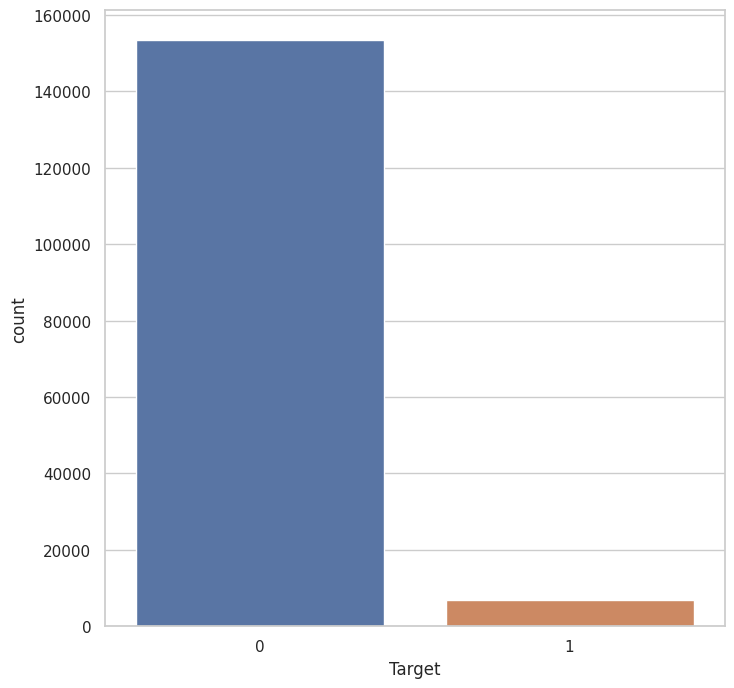

In [171]:
plt.figure(figsize=(8,8))
sns.countplot(x="Target", data=train)

**Existen 153566 entidades clasificadas en la clase 0, y 6830 entidades clasificadas en la clase 1. Vemos evidente un desbalanceo de clases.**

**Teniendo en cuenta que este dataset está bastante desbalanceado y su clase mayoritaria es significativamente mayor, la moda seria un buen predictor**

## Missing values

In [172]:
# Numero de missing values por columna
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
missing = train.isna().sum()
print(missing)

GENERO                                             0
ESTADO_CIVIL                                       0
EDAD                                               0
GRUPO_ETAREO                                       0
TipoAfiliado                                       4
Estrato                                            0
TSISTOLICA                                     25025
TDIASTOLICA                                    25090
ANTIHIPERTENSIVOS                                  0
AEI                                                0
CANCER_MAMA_FAMILIAR                               0
CANCER_OTRO_SITIO_FAMILIAR                         0
HIPERTENSION_FAMILIAR                              0
DIABETES_FAMILIAR                                  0
CORONARIOS_FAMILIAR                                0
CEREBRAL_FAMILIAR                                  0
ENFERMEDAD_RENAL_FAMILIAR                          0
EXFUMADOR                                      50095
FUMADOR                                       

In [173]:
#Porcentaje de missing values por variable
train.isna().sum()/train.shape[0]

GENERO                                        0.000000
ESTADO_CIVIL                                  0.000000
EDAD                                          0.000000
GRUPO_ETAREO                                  0.000000
TipoAfiliado                                  0.000025
Estrato                                       0.000000
TSISTOLICA                                    0.156020
TDIASTOLICA                                   0.156425
ANTIHIPERTENSIVOS                             0.000000
AEI                                           0.000000
CANCER_MAMA_FAMILIAR                          0.000000
CANCER_OTRO_SITIO_FAMILIAR                    0.000000
HIPERTENSION_FAMILIAR                         0.000000
DIABETES_FAMILIAR                             0.000000
CORONARIOS_FAMILIAR                           0.000000
CEREBRAL_FAMILIAR                             0.000000
ENFERMEDAD_RENAL_FAMILIAR                     0.000000
EXFUMADOR                                     0.312321
FUMADOR   

**Vamos a analizar cada variable para determinar su naturaleza y tomar decisiones frente a los valores faltantes**

In [174]:
categoricas=train.select_dtypes(include=['object']).columns
categoricas

Index(['GENERO', 'ESTADO_CIVIL', 'GRUPO_ETAREO', 'TipoAfiliado', 'Estrato',
       'TSISTOLICA', 'TDIASTOLICA', 'ANTIHIPERTENSIVOS', 'AEI',
       'CANCER_MAMA_FAMILIAR', 'CANCER_OTRO_SITIO_FAMILIAR',
       'HIPERTENSION_FAMILIAR', 'DIABETES_FAMILIAR', 'CORONARIOS_FAMILIAR',
       'CEREBRAL_FAMILIAR', 'ENFERMEDAD_RENAL_FAMILIAR', 'EXFUMADOR',
       'FUMADOR', 'FECHA_ULTIMA_CITA', 'ALBUMINA', 'FECHA_ALBUMINA_LAB',
       'ALBUMINURIA', 'FECHA_ALBUMINURIA_LAB', 'ALBUMINURIA24',
       'FECHA_ALBUMINURIA24_LAB', 'COLESTEROL_TOTAL',
       'FECHA_COLESTEROL_TOTAL_LAB', 'CREATININA_24',
       'FECHA_CREATININA_24_LAB', 'CREATININA_DEPURACION',
       'FECHA_CREATININA_DEPURACION_LAB', 'CREATININA_EN_SUERO_ORINA_OTROS',
       'FECHA_CREATININA_EN_SUERO_ORINA_OTROS_LAB', 'FOSFORO',
       'FECHA_FOSFORO_LAB', 'HDL', 'FECHA_HDL_LAB', 'HEMOGLOBINA',
       'FECHA_HEMOGLOBINA_LAB', 'HEMOGLOBINA_GLICOSILADA',
       'FECHA_HEMOGLOBINA_GLICOSILADA_LAB', 'LDL', 'FECHA_LDL_LAB',
       'PROTEIN

In [175]:
train[categoricas].describe()

GENERO ESTADO_CIVIL   GRUPO_ETAREO TipoAfiliado Estrato TSISTOLICA  \
count   160396       160396         160396       160392  160396     135371   
unique       2            5             11            3       5        191   
top          F           CA  75 años y más    Cotizante       1        120   
freq     96258        65405          37779       104573  123898      45278   

       TDIASTOLICA ANTIHIPERTENSIVOS     AEI CANCER_MAMA_FAMILIAR  \
count       135306            160396  160396               160396   
unique         157                 2       2                    2   
top             80                NO      NO                    0   
freq         51952            105283   84321               156602   

       CANCER_OTRO_SITIO_FAMILIAR HIPERTENSION_FAMILIAR DIABETES_FAMILIAR  \
count                      160396                160396            160396   
unique                          2                     2                 2   
top                             0                     0                 0   
freq                       141116                122468            139698   

       CORONARIOS_FAMILIAR CEREBRAL_FAMILIAR ENFERMEDAD_RENAL_FAMILIAR  \
count               160396            160396                    160396   
unique                   2                 2                         2   
top                      0                 0                         0   
freq                149881            157291                    159036   

       EXFUMADOR FUMADOR FECHA_ULTIMA_CITA ALBUMINA FECHA_ALBUMINA_LAB  \
count     110301  110301            107467    23918              23918   
unique         1       1               654        1               1849   
top            0       0          20220208        1           20221215   
freq      110301  110301              1447    23918                 98   

       ALBUMINURIA FECHA_ALBUMINURIA_LAB ALBUMINURIA24  \
count       125831                125831          5989   
unique           1                  1824             1   
top              1              20220616             1   
freq        125831                   637          5989   

       FECHA_ALBUMINURIA24_LAB COLESTEROL_TOTAL FECHA_COLESTEROL_TOTAL_LAB  \
count                     5989           144484                     144484   
unique                    1185                1                       1849   
top                   20221215                1                   20220817   
freq                        46           144484                        511   

       CREATININA_24 FECHA_CREATININA_24_LAB CREATININA_DEPURACION  \
count           9998                    9998                 16336   
unique             1                    1680                     1   
top                1                20200122                     1   
freq            9998                      26                 16336   

       FECHA_CREATININA_DEPURACION_LAB CREATININA_EN_SUERO_ORINA_OTROS  \
count                            16336                          145293   
unique                            1662                               1   
top                           20211111                               1   
freq                                47                          145293   

       FECHA_CREATININA_EN_SUERO_ORINA_OTROS_LAB FOSFORO FECHA_FOSFORO_LAB  \
count                                     145293   19468             19468   
unique                                      1891       1              1666   
top                                     20221109       1          20221115   
freq                                         572   19468                72   

           HDL FECHA_HDL_LAB HEMOGLOBINA FECHA_HEMOGLOBINA_LAB  \
count   143975        143975      138675                138675   
unique       1          1858           1                  1945   
top          1      20220817           1              20221109   
freq    143975           504      138675                   436   

       HEMOGLOBIN

In [176]:
train[categoricas].isna().sum()

GENERO                                             0
ESTADO_CIVIL                                       0
GRUPO_ETAREO                                       0
TipoAfiliado                                       4
Estrato                                            0
TSISTOLICA                                     25025
TDIASTOLICA                                    25090
ANTIHIPERTENSIVOS                                  0
AEI                                                0
CANCER_MAMA_FAMILIAR                               0
CANCER_OTRO_SITIO_FAMILIAR                         0
HIPERTENSION_FAMILIAR                              0
DIABETES_FAMILIAR                                  0
CORONARIOS_FAMILIAR                                0
CEREBRAL_FAMILIAR                                  0
ENFERMEDAD_RENAL_FAMILIAR                          0
EXFUMADOR                                      50095
FUMADOR                                        50095
FECHA_ULTIMA_CITA                             

In [177]:
for var in train.select_dtypes(include=['object']).columns:
    cantidad = train[train[var] == 'None'][var].count()
    print(f"Existen {cantidad} valores en {var} con el valor None")

Existen 0 valores en GENERO con el valor None
Existen 0 valores en ESTADO_CIVIL con el valor None
Existen 0 valores en GRUPO_ETAREO con el valor None
Existen 0 valores en TipoAfiliado con el valor None
Existen 0 valores en Estrato con el valor None
Existen 0 valores en TSISTOLICA con el valor None
Existen 0 valores en TDIASTOLICA con el valor None
Existen 0 valores en ANTIHIPERTENSIVOS con el valor None
Existen 0 valores en AEI con el valor None
Existen 0 valores en CANCER_MAMA_FAMILIAR con el valor None
Existen 0 valores en CANCER_OTRO_SITIO_FAMILIAR con el valor None
Existen 0 valores en HIPERTENSION_FAMILIAR con el valor None
Existen 0 valores en DIABETES_FAMILIAR con el valor None
Existen 0 valores en CORONARIOS_FAMILIAR con el valor None
Existen 0 valores en CEREBRAL_FAMILIAR con el valor None
Existen 0 valores en ENFERMEDAD_RENAL_FAMILIAR con el valor None
Existen 0 valores en EXFUMADOR con el valor None
Existen 0 valores en FUMADOR con el valor None
Existen 0 valores en FECHA_UL

Eliminamos estas variables que consideramos no significativas para el modelo por falta de informacion

In [178]:
train.shape

(160396, 83)

## Analisis de Outliers e imputacion de valores

## Variables Numericas


In [179]:
columnas_numericas = train.select_dtypes(include=['int', 'float']).columns
columnas_numericas

Index(['EDAD', 'CMes_6', 'CMes_5', 'CMes_4', 'CMes_3', 'CMes_2', 'CMes_1',
       'SMes_6', 'SMes_5', 'SMes_4', 'SMes_3', 'SMes_2', 'SMes_1', 'MMes_6',
       'MMes_5', 'MMes_4', 'MMes_3', 'MMes_2', 'MMes_1', 'RIESGOS', 'IV_NIVEL',
       'HOSPI_NO_QUIRURGICA', 'CANTIDAD_URGENCIAS', 'HOSPITALIZACION',
       'SERVICIOS', 'MEDICAMENTOS', 'Antiguedad_paciente',
       'Tiempo_Ultima_cita'],
      dtype='object')

#### HOSPITALIZACION

Total de missing values en 'HOSPITALIZACION': 0
Porcentaje de missing values en 'HOSPITALIZACION': 0.00%
Descripción de 'HOSPITALIZACION':
count    160396.000000
mean          0.014707
std           0.241960
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          14.000000
Name: HOSPITALIZACION, dtype: float64


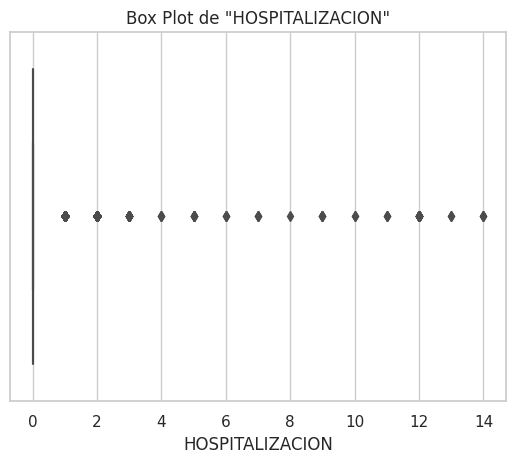

Considerando como límites el percentil 0.001 y percentil 0.9999, el total de outliers en 'HOSPITALIZACION' es: 5
'158900' valores son iguales a 0


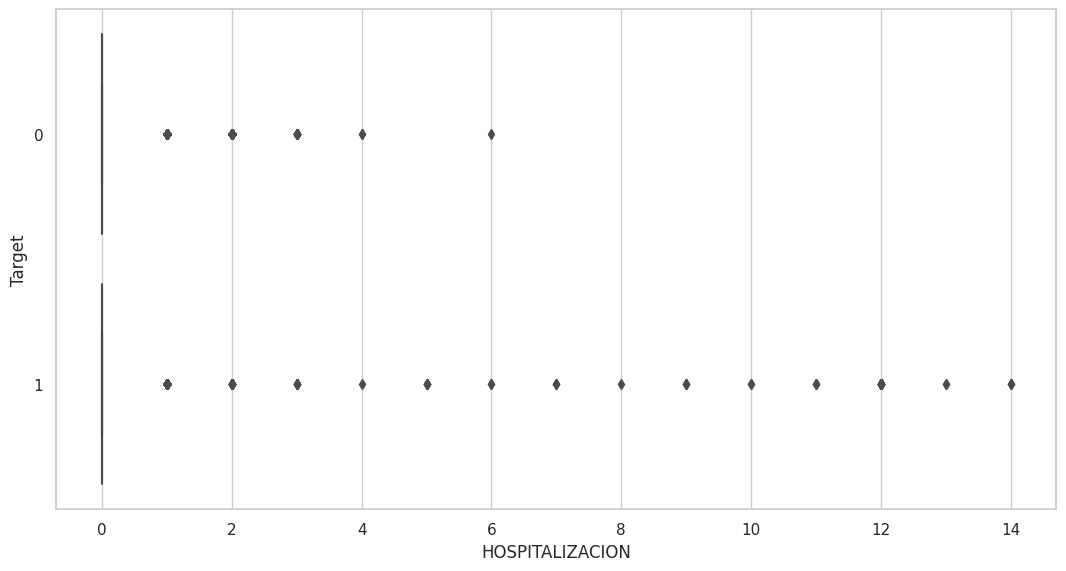

In [180]:
analyze_column(train, 'HOSPITALIZACION', 0.001, 0.9999)

#### CANTIDAD_URGENCIAS

Total de missing values en 'CANTIDAD_URGENCIAS': 0
Porcentaje de missing values en 'CANTIDAD_URGENCIAS': 0.00%
Descripción de 'CANTIDAD_URGENCIAS':
count    160396.000000
mean          0.032538
std           0.197070
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           6.000000
Name: CANTIDAD_URGENCIAS, dtype: float64


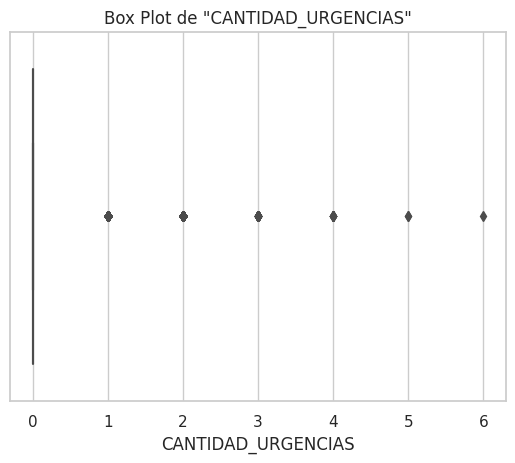

Considerando como límites el percentil 0.001 y percentil 0.9999, el total de outliers en 'CANTIDAD_URGENCIAS' es: 12
'155668' valores son iguales a 0


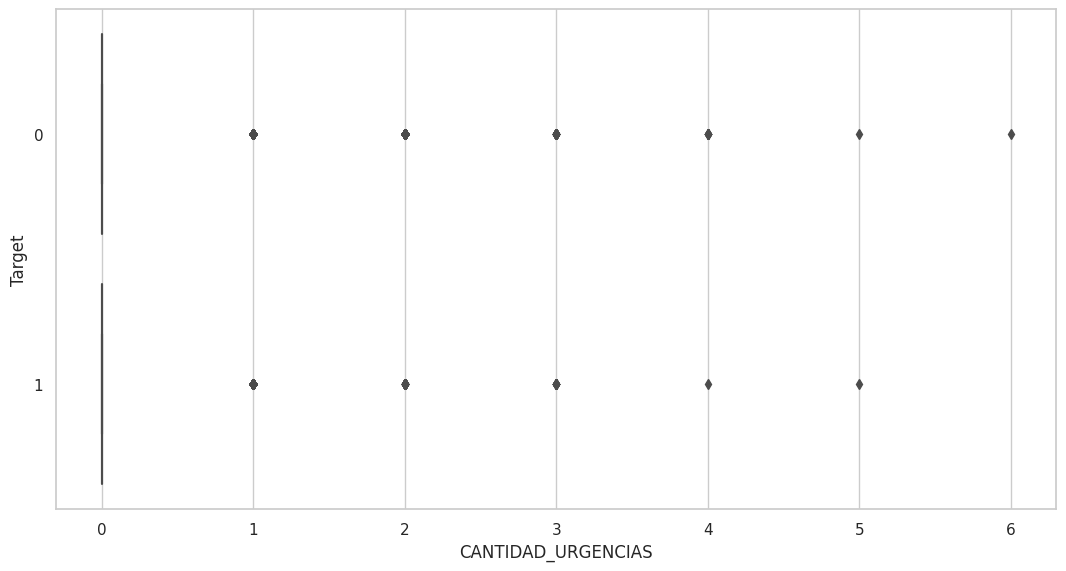

In [181]:
analyze_column(train, 'CANTIDAD_URGENCIAS', 0.001, 0.9999)

#### HOSPI_NO_QUIRURGICA

Total de missing values en 'HOSPI_NO_QUIRURGICA': 0
Porcentaje de missing values en 'HOSPI_NO_QUIRURGICA': 0.00%
Descripción de 'HOSPI_NO_QUIRURGICA':
count    160396.000000
mean          0.009813
std           0.114982
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           6.000000
Name: HOSPI_NO_QUIRURGICA, dtype: float64


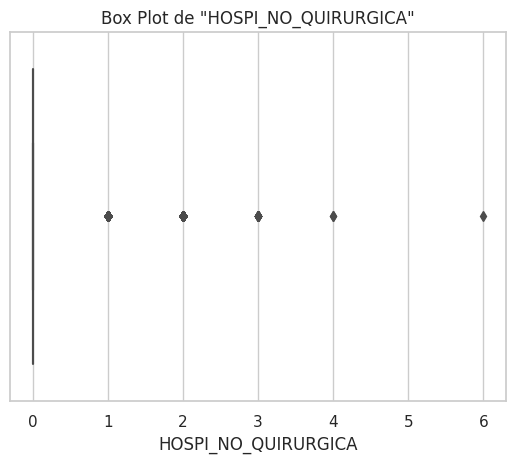

Considerando como límites el percentil 0.001 y percentil 0.9999, el total de outliers en 'HOSPI_NO_QUIRURGICA' es: 3
'159069' valores son iguales a 0


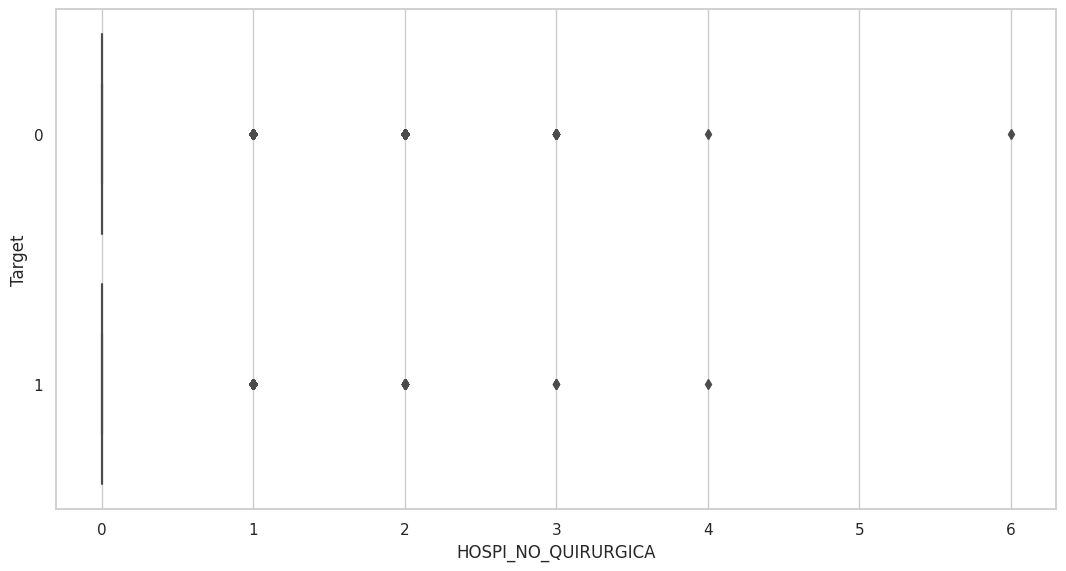

In [182]:
analyze_column(train, 'HOSPI_NO_QUIRURGICA', 0.001, 0.9999)

#### IV_NIVEL

Total de missing values en 'IV_NIVEL': 0
Porcentaje de missing values en 'IV_NIVEL': 0.00%
Descripción de 'IV_NIVEL':
count    160396.000000
mean          0.004670
std           0.211687
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          14.000000
Name: IV_NIVEL, dtype: float64


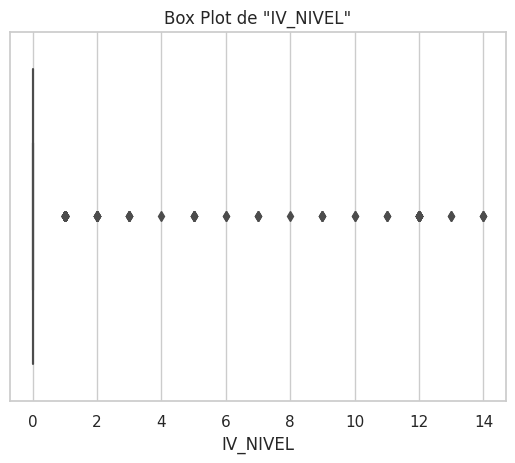

Considerando como límites el percentil 0.001 y percentil 0.9999, el total de outliers en 'IV_NIVEL' es: 5
'160237' valores son iguales a 0


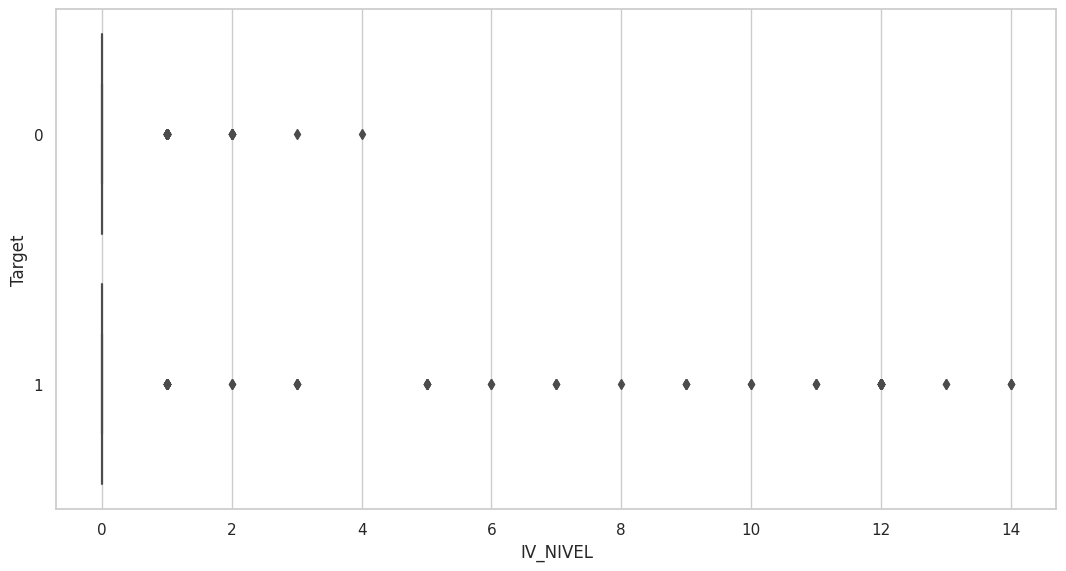

In [183]:
analyze_column(train, 'IV_NIVEL', 0.001, 0.9999)

#### EDAD

Total de missing values en 'EDAD': 0
Porcentaje de missing values en 'EDAD': 0.00%
Descripción de 'EDAD':
count    160396.000000
mean         64.633638
std          13.722636
min           2.000000
25%          56.000000
50%          65.000000
75%          74.000000
max         107.000000
Name: EDAD, dtype: float64


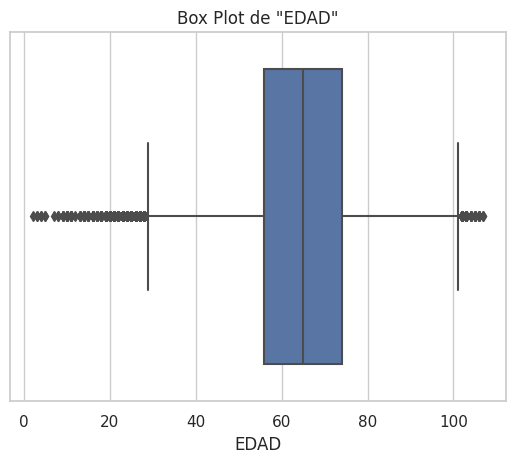

Considerando como límites el percentil 0.001 y percentil 0.9999, el total de outliers en 'EDAD' es: 175
'0' valores son iguales a 0


In [184]:
analyze_column1(train, 'EDAD', 0.001, 0.9999)

#### SERVICIOS

Total de missing values en 'SERVICIOS': 0
Porcentaje de missing values en 'SERVICIOS': 0.00%
Descripción de 'SERVICIOS':
count    160396.000000
mean          0.425896
std           3.060843
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         194.000000
Name: SERVICIOS, dtype: float64


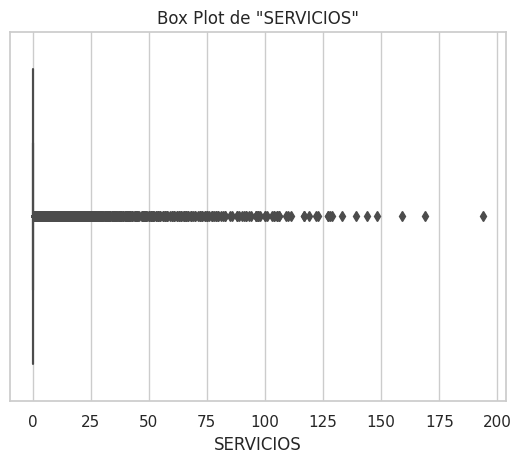

Considerando como límites el percentil 0.001 y percentil 0.999, el total de outliers en 'SERVICIOS' es: 161
'138791' valores son iguales a 0


In [185]:
analyze_column1(train, 'SERVICIOS', 0.001, 0.999)

#### MEDICAMENTOS  

Total de missing values en 'MEDICAMENTOS': 0
Porcentaje de missing values en 'MEDICAMENTOS': 0.00%
Descripción de 'MEDICAMENTOS':
count    160396.000000
mean          4.961620
std           4.693764
min           0.000000
25%           1.000000
50%           4.000000
75%           7.000000
max          59.000000
Name: MEDICAMENTOS, dtype: float64


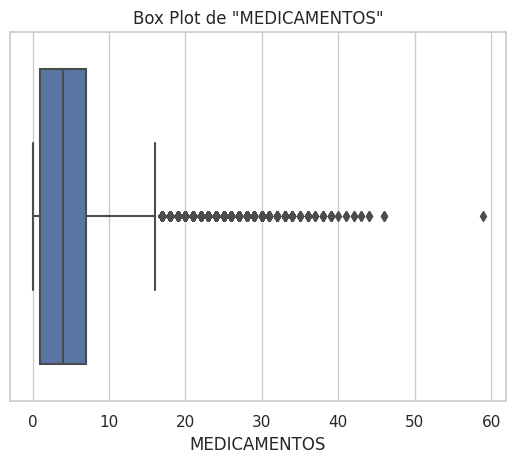

Considerando como límites el percentil 0.001 y percentil 0.9999, el total de outliers en 'MEDICAMENTOS' es: 12
'39448' valores son iguales a 0


In [186]:
analyze_column1(train, 'MEDICAMENTOS', 0.001, 0.9999)

#### Antiguedad_paciente

Total de missing values en 'Antiguedad_paciente': 0
Porcentaje de missing values en 'Antiguedad_paciente': 0.00%
Descripción de 'Antiguedad_paciente':
count    160396.000000
mean         10.846517
std           7.816486
min          -1.834360
25%           3.915127
50%           8.914442
75%          17.768652
max          27.586585
Name: Antiguedad_paciente, dtype: float64


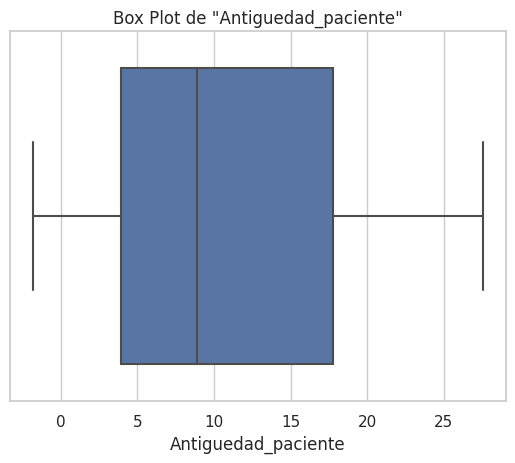

Considerando como límites el percentil 0.001 y percentil 0.9999, el total de outliers en 'Antiguedad_paciente' es: 108
'284' valores son iguales a 0


In [187]:
analyze_column1(train, 'Antiguedad_paciente', 0.001, 0.9999)

In [188]:
 #### existen valores negativos de antiguedad de paciente,  se realiza imputacion
q1 = train['Antiguedad_paciente'].quantile(0.01)
train['Antiguedad_paciente'] = np.where(train['Antiguedad_paciente'] < q1, q1, train['Antiguedad_paciente'])

#### Tiempo_Ultima_cita

Total de missing values en 'Tiempo_Ultima_cita': 0
Porcentaje de missing values en 'Tiempo_Ultima_cita': 0.00%
Descripción de 'Tiempo_Ultima_cita':
count    160396.000000
mean         18.155484
std          24.372321
min          -0.082136
25%           0.887064
50%           1.215606
75%          52.914442
max          52.914442
Name: Tiempo_Ultima_cita, dtype: float64


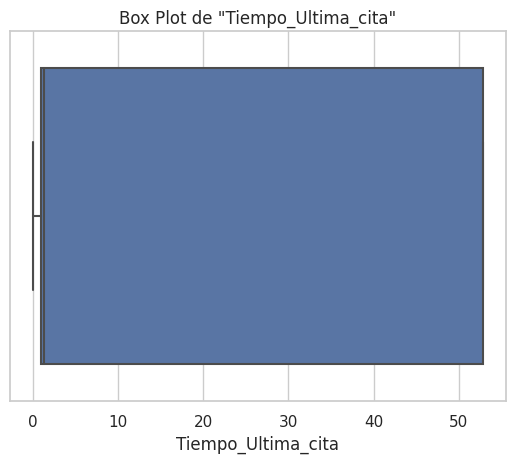

Considerando como límites el percentil 0.001 y percentil 0.999, el total de outliers en 'Tiempo_Ultima_cita' es: 119
'36' valores son iguales a 0


In [189]:
analyze_column1(train, 'Tiempo_Ultima_cita', 0.001, 0.999)

### Variables MMes

Analyzing column: MMes_6
Total de missing values en 'MMes_6': 0
Porcentaje de missing values en 'MMes_6': 0.00%
Descripción de 'MMes_6':
count    160396.000000
mean          0.778392
std           0.974963
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max          11.000000
Name: MMes_6, dtype: float64


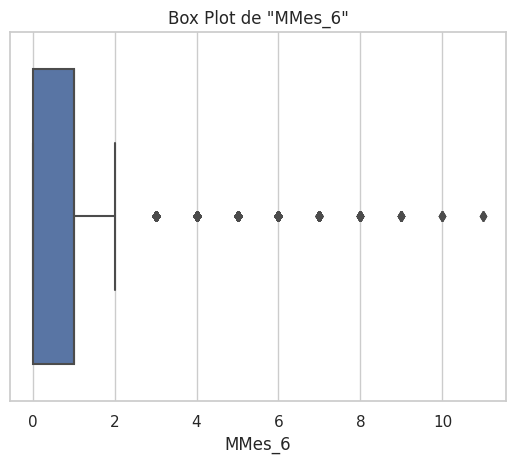

Considerando como límites el percentil 0.001 y percentil 0.9999, el total de outliers en 'MMes_6' es: 8
'76538' valores son iguales a 0


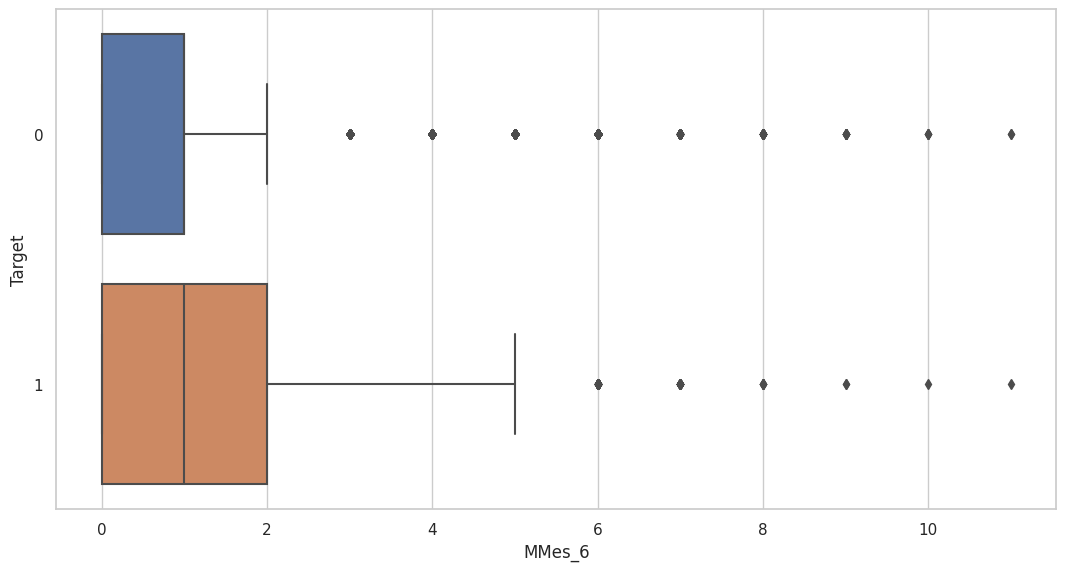



Analyzing column: MMes_5
Total de missing values en 'MMes_5': 0
Porcentaje de missing values en 'MMes_5': 0.00%
Descripción de 'MMes_5':
count    160396.000000
mean          0.783791
std           0.963032
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max          13.000000
Name: MMes_5, dtype: float64


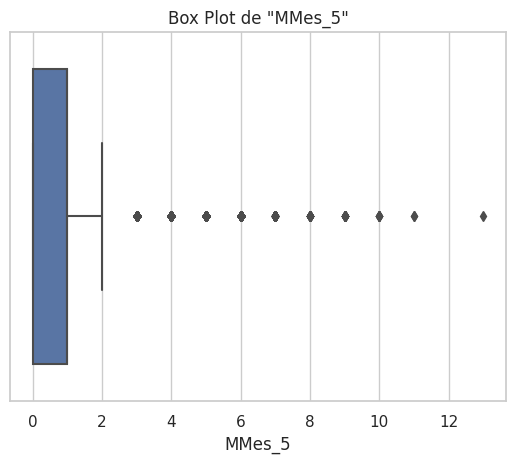

Considerando como límites el percentil 0.001 y percentil 0.9999, el total de outliers en 'MMes_5' es: 9
'75165' valores son iguales a 0


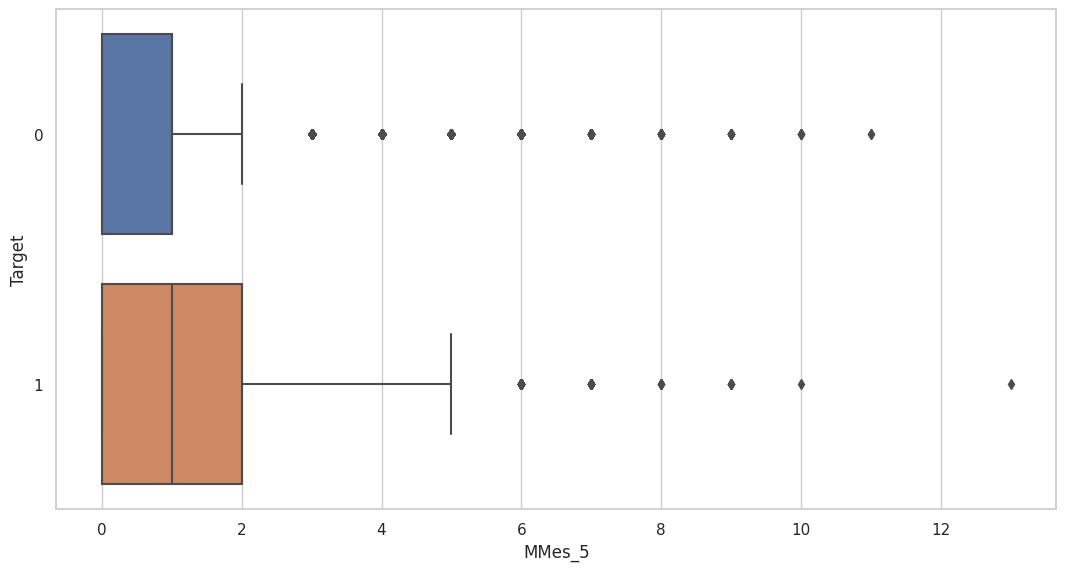



Analyzing column: MMes_4
Total de missing values en 'MMes_4': 0
Porcentaje de missing values en 'MMes_4': 0.00%
Descripción de 'MMes_4':
count    160396.000000
mean          0.786927
std           0.950182
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max          12.000000
Name: MMes_4, dtype: float64


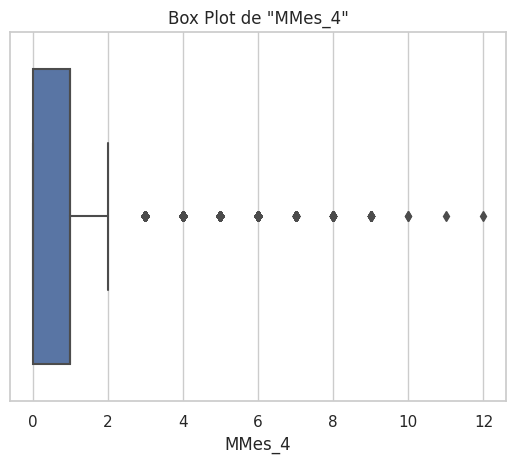

Considerando como límites el percentil 0.001 y percentil 0.9999, el total de outliers en 'MMes_4' es: 4
'73842' valores son iguales a 0


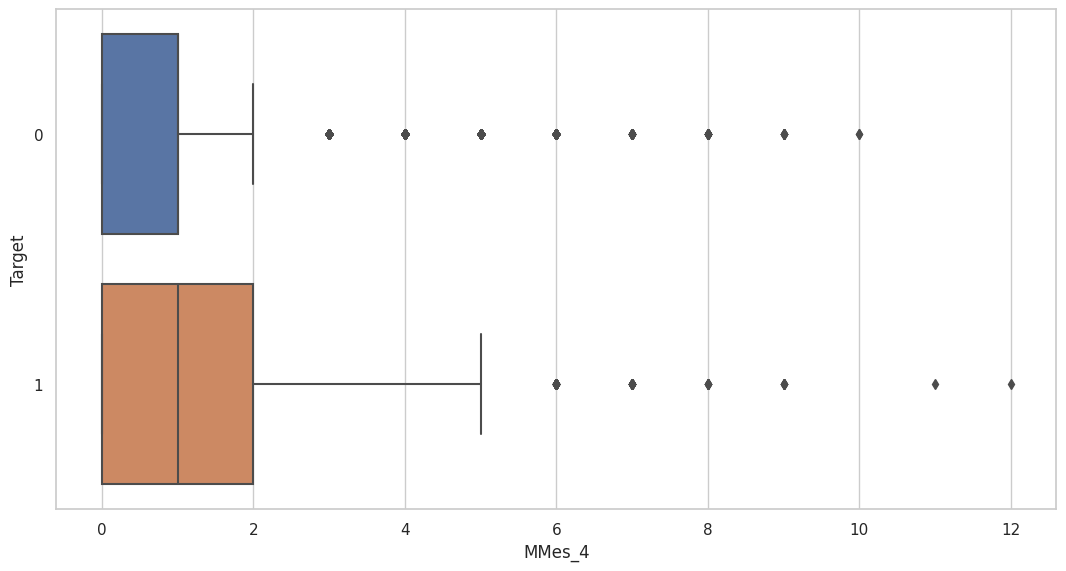



Analyzing column: MMes_3
Total de missing values en 'MMes_3': 0
Porcentaje de missing values en 'MMes_3': 0.00%
Descripción de 'MMes_3':
count    160396.000000
mean          0.880932
std           1.034726
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max          11.000000
Name: MMes_3, dtype: float64


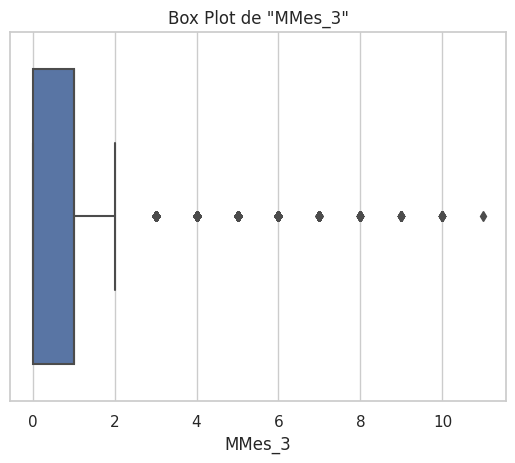

Considerando como límites el percentil 0.001 y percentil 0.9999, el total de outliers en 'MMes_3' es: 14
'69347' valores son iguales a 0


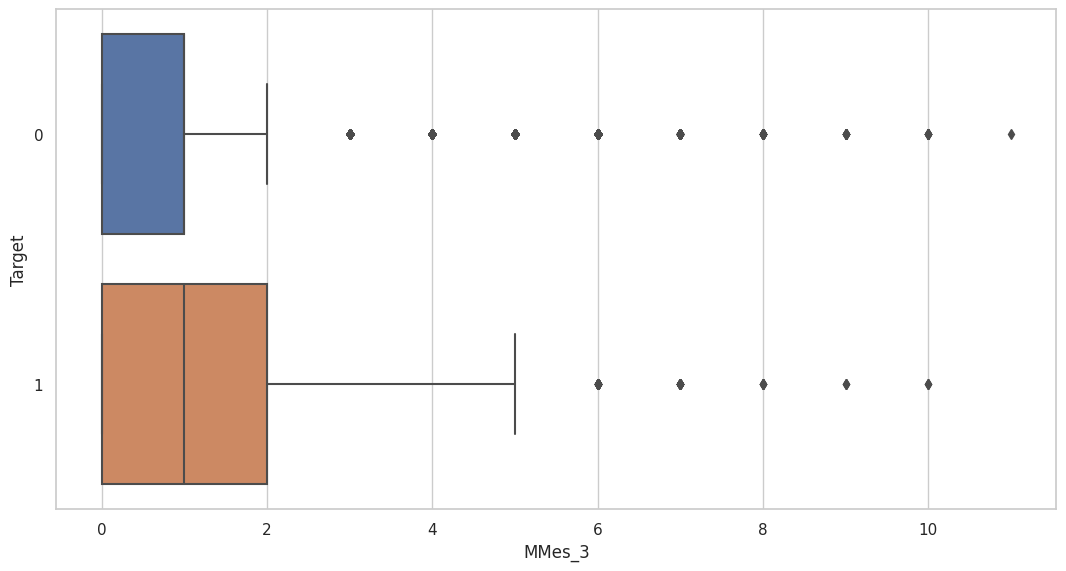



Analyzing column: MMes_2
Total de missing values en 'MMes_2': 0
Porcentaje de missing values en 'MMes_2': 0.00%
Descripción de 'MMes_2':
count    160396.000000
mean          0.860464
std           0.991771
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max          11.000000
Name: MMes_2, dtype: float64


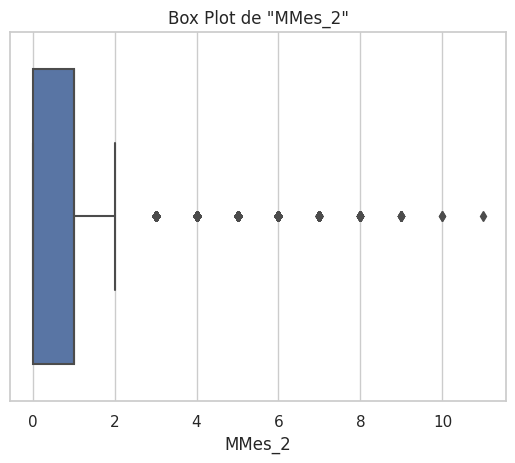

Considerando como límites el percentil 0.001 y percentil 0.9999, el total de outliers en 'MMes_2' es: 12
'68979' valores son iguales a 0


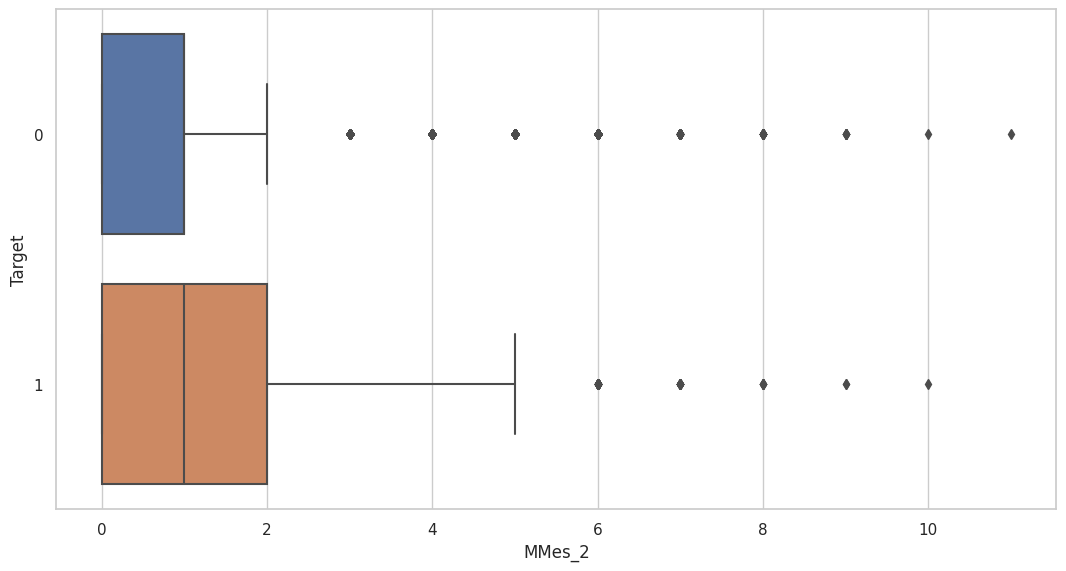



Analyzing column: MMes_1
Total de missing values en 'MMes_1': 0
Porcentaje de missing values en 'MMes_1': 0.00%
Descripción de 'MMes_1':
count    160396.000000
mean          0.871113
std           1.024506
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max          17.000000
Name: MMes_1, dtype: float64


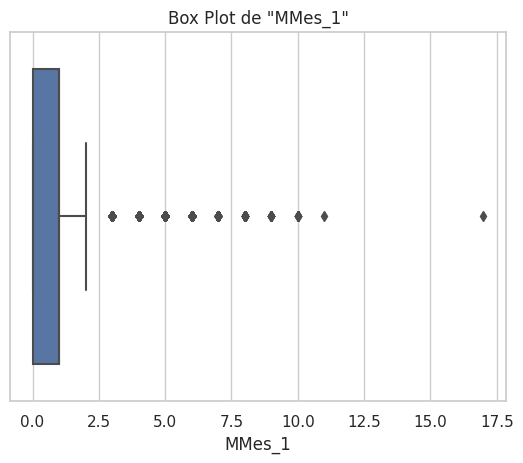

Considerando como límites el percentil 0.001 y percentil 0.9999, el total de outliers en 'MMes_1' es: 10
'69649' valores son iguales a 0


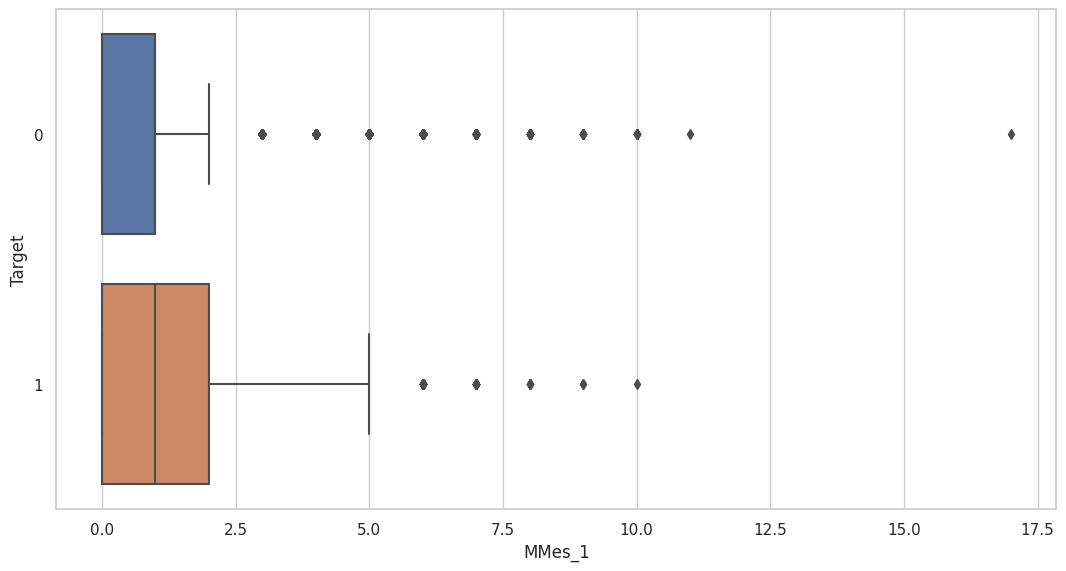

In [190]:
columns_to_analyze = ['MMes_6', 'MMes_5', 'MMes_4', 'MMes_3', 'MMes_2','MMes_1']
q1_value = 0.001
q3_value = 0.9999

for column_name in columns_to_analyze:
    print(f"Analyzing column: {column_name}")
    analyze_column(train, column_name, q1_value, q3_value)
    print("\n")

### Variables SMes

Analyzing column: SMes_6
Total de missing values en 'SMes_6': 0
Porcentaje de missing values en 'SMes_6': 0.00%
Descripción de 'SMes_6':
count    160396.000000
mean          0.062389
std           0.779170
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         123.000000
Name: SMes_6, dtype: float64


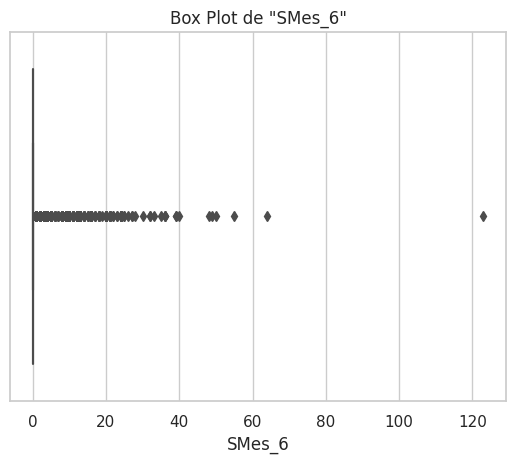

Considerando como límites el percentil 0.001 y percentil 0.999, el total de outliers en 'SMes_6' es: 159
'155156' valores son iguales a 0


Analyzing column: SMes_5
Total de missing values en 'SMes_5': 0
Porcentaje de missing values en 'SMes_5': 0.00%
Descripción de 'SMes_5':
count    160396.000000
mean          0.063293
std           0.647437
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          40.000000
Name: SMes_5, dtype: float64


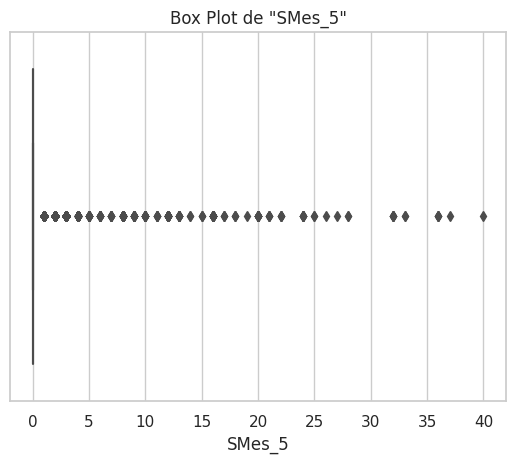

Considerando como límites el percentil 0.001 y percentil 0.999, el total de outliers en 'SMes_5' es: 156
'154794' valores son iguales a 0


Analyzing column: SMes_4
Total de missing values en 'SMes_4': 0
Porcentaje de missing values en 'SMes_4': 0.00%
Descripción de 'SMes_4':
count    160396.000000
mean          0.069615
std           0.758565
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          48.000000
Name: SMes_4, dtype: float64


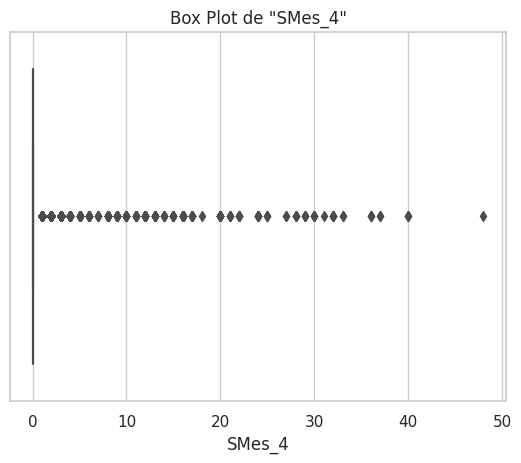

Considerando como límites el percentil 0.001 y percentil 0.999, el total de outliers en 'SMes_4' es: 138
'154818' valores son iguales a 0


Analyzing column: SMes_3
Total de missing values en 'SMes_3': 0
Porcentaje de missing values en 'SMes_3': 0.00%
Descripción de 'SMes_3':
count    160396.000000
mean          0.073393
std           0.789580
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          64.000000
Name: SMes_3, dtype: float64


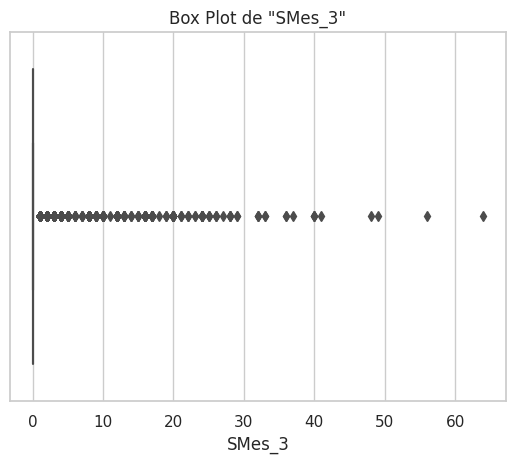

Considerando como límites el percentil 0.001 y percentil 0.999, el total de outliers en 'SMes_3' es: 139
'154502' valores son iguales a 0


Analyzing column: SMes_2
Total de missing values en 'SMes_2': 0
Porcentaje de missing values en 'SMes_2': 0.00%
Descripción de 'SMes_2':
count    160396.000000
mean          0.075158
std           0.805058
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          49.000000
Name: SMes_2, dtype: float64


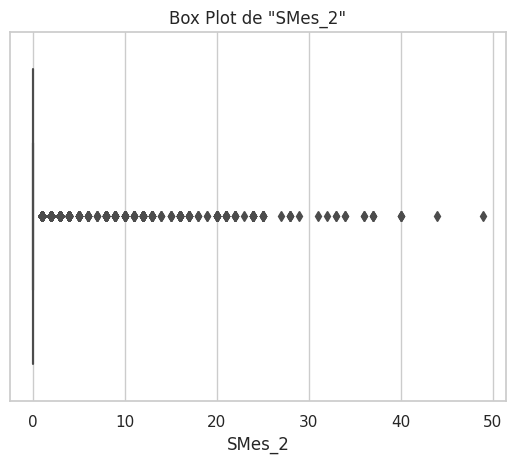

Considerando como límites el percentil 0.001 y percentil 0.999, el total de outliers en 'SMes_2' es: 149
'154601' valores son iguales a 0


Analyzing column: SMes_1
Total de missing values en 'SMes_1': 0
Porcentaje de missing values en 'SMes_1': 0.00%
Descripción de 'SMes_1':
count    160396.000000
mean          0.082047
std           0.908379
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          76.000000
Name: SMes_1, dtype: float64


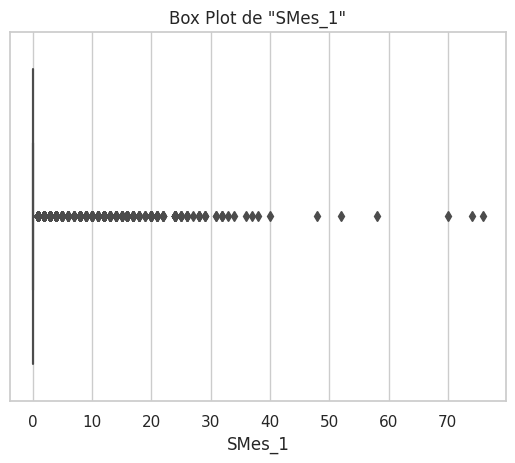

Considerando como límites el percentil 0.001 y percentil 0.999, el total de outliers en 'SMes_1' es: 154
'154519' valores son iguales a 0




In [191]:
columns_to_analyze = ['SMes_6', 'SMes_5', 'SMes_4', 'SMes_3', 'SMes_2','SMes_1']
q1_value = 0.001
q3_value = 0.999

for column_name in columns_to_analyze:
    print(f"Analyzing column: {column_name}")
    analyze_column1(train, column_name, q1_value, q3_value)
    print("\n")

Observamos que la variable SMes_6 presenta un valor mayor a 120, se considera un registro mas calculado y se realizara un truncamiento por el percentil 0.9999

#### Variables CMes

Analyzing column: CMes_6
Total de missing values en 'CMes_6': 0
Porcentaje de missing values en 'CMes_6': 0.00%
Descripción de 'CMes_6':
count    1.603960e+05
mean     3.676481e+04
std      1.703080e+05
min      0.000000e+00
25%      0.000000e+00
50%      1.320000e+03
75%      1.017000e+04
max      5.822942e+06
Name: CMes_6, dtype: float64


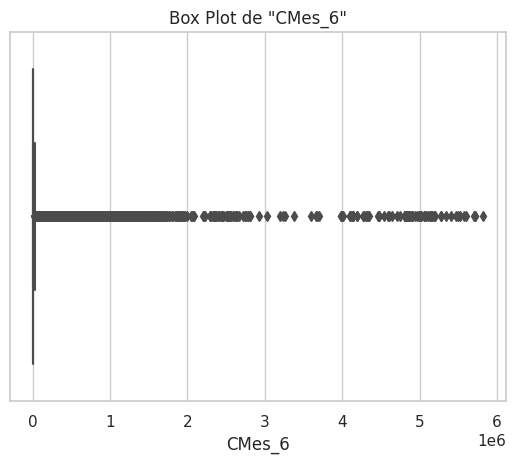

Considerando como límites el percentil 0.001 y percentil 0.999, el total de outliers en 'CMes_6' es: 161
'75452' valores son iguales a 0


Analyzing column: CMes_5
Total de missing values en 'CMes_5': 0
Porcentaje de missing values en 'CMes_5': 0.00%
Descripción de 'CMes_5':
count    1.603960e+05
mean     3.675277e+04
std      1.744866e+05
min      0.000000e+00
25%      0.000000e+00
50%      1.440000e+03
75%      1.035000e+04
max      5.735720e+06
Name: CMes_5, dtype: float64


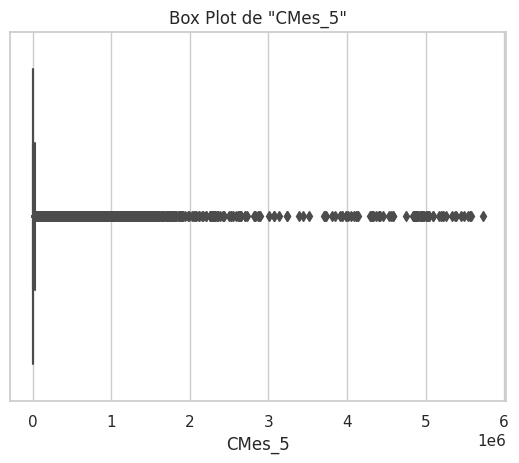

Considerando como límites el percentil 0.001 y percentil 0.999, el total de outliers en 'CMes_5' es: 161
'74042' valores son iguales a 0


Analyzing column: CMes_4
Total de missing values en 'CMes_4': 0
Porcentaje de missing values en 'CMes_4': 0.00%
Descripción de 'CMes_4':
count    1.603960e+05
mean     3.538102e+04
std      1.664544e+05
min      0.000000e+00
25%      0.000000e+00
50%      1.710000e+03
75%      1.045500e+04
max      5.874878e+06
Name: CMes_4, dtype: float64


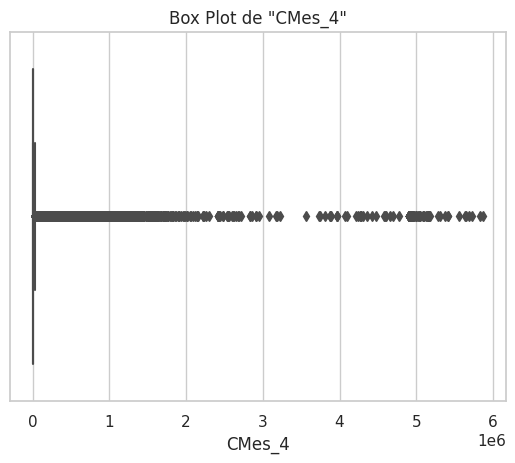

Considerando como límites el percentil 0.001 y percentil 0.999, el total de outliers en 'CMes_4' es: 161
'72761' valores son iguales a 0


Analyzing column: CMes_3
Total de missing values en 'CMes_3': 0
Porcentaje de missing values en 'CMes_3': 0.00%
Descripción de 'CMes_3':
count    1.603960e+05
mean     3.952722e+04
std      1.699679e+05
min      0.000000e+00
25%      0.000000e+00
50%      2.430000e+03
75%      1.311000e+04
max      5.815378e+06
Name: CMes_3, dtype: float64


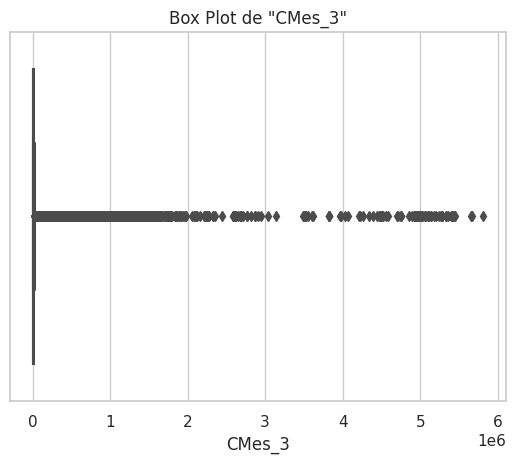

Considerando como límites el percentil 0.001 y percentil 0.999, el total de outliers en 'CMes_3' es: 161
'68294' valores son iguales a 0


Analyzing column: CMes_2
Total de missing values en 'CMes_2': 0
Porcentaje de missing values en 'CMes_2': 0.00%
Descripción de 'CMes_2':
count    1.603960e+05
mean     4.239327e+04
std      1.821380e+05
min      0.000000e+00
25%      0.000000e+00
50%      2.460000e+03
75%      1.422000e+04
max      5.744101e+06
Name: CMes_2, dtype: float64


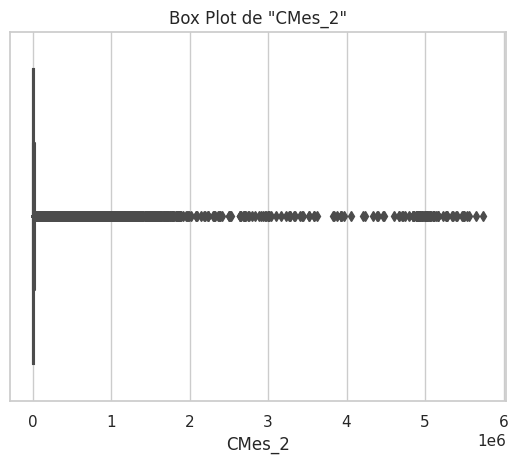

Considerando como límites el percentil 0.001 y percentil 0.999, el total de outliers en 'CMes_2' es: 161
'67979' valores son iguales a 0


Analyzing column: CMes_1
Total de missing values en 'CMes_1': 0
Porcentaje de missing values en 'CMes_1': 0.00%
Descripción de 'CMes_1':
count    1.603960e+05
mean     4.501093e+04
std      1.937191e+05
min      0.000000e+00
25%      0.000000e+00
50%      2.430000e+03
75%      1.458000e+04
max      5.949703e+06
Name: CMes_1, dtype: float64


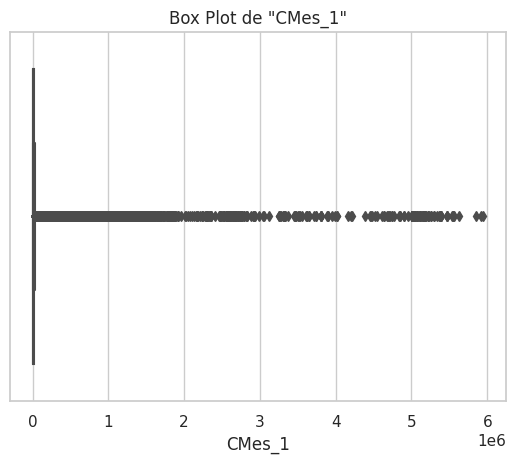

Considerando como límites el percentil 0.001 y percentil 0.999, el total de outliers en 'CMes_1' es: 161
'68636' valores son iguales a 0




In [192]:
columns_to_analyze = ['CMes_6', 'CMes_5', 'CMes_4', 'CMes_3', 'CMes_2','CMes_1']
q1_value = 0.001  # Adjust as needed
q3_value = 0.999  # Adjust as needed

for column_name in columns_to_analyze:
    print(f"Analyzing column: {column_name}")
    analyze_column1(train, column_name, q1_value, q3_value)
    print("\n")

### TSISTOLICA

La presión arterial normal, en el caso de la mayoría de los adultos, se define como una presión sistólica de menos de 120.
Existen valores muy altos para TSISTOLICA, los valores maximos registrados rondan los 210

fuente: https://www.elsevier.es/es-revista-medicina-integral-63-articulo-manejo-crisis-hipertensivas-13045397#:~:text=Crisis%20hipertensiva.,Emergencia%20hipertensiva.

In [193]:
train['TSISTOLICA'] = train['TSISTOLICA'].astype(float)

Total de missing values en 'TSISTOLICA': 25025
Porcentaje de missing values en 'TSISTOLICA': 15.60%
Descripción de 'TSISTOLICA':
count    135371.000000
mean        130.330189
std         765.407998
min           0.000000
25%         120.000000
50%         120.000000
75%         130.000000
max      191100.000000
Name: TSISTOLICA, dtype: float64


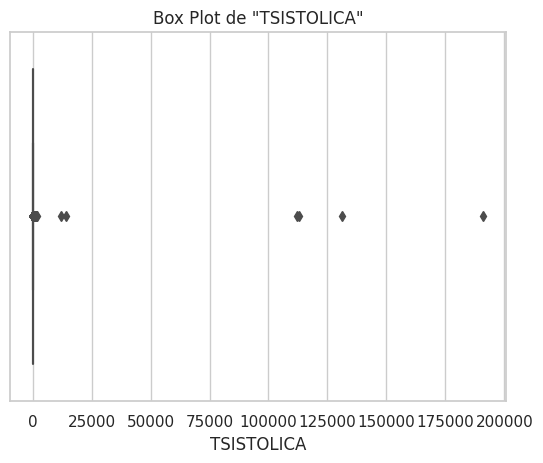

Considerando como límites el percentil 0.001 y percentil 0.9995, el total de outliers en 'TSISTOLICA' es: 203
'6' valores son iguales a 0


In [194]:
analyze_column1(train, 'TSISTOLICA', 0.001, 0.9995)

#### Atipicos e imputación

Para los datos atipicos de las varaibles numericas vamos a remplazar los valores menos al q1 definido por el valor del q1, y los valores superior al q3 definido por el valor del q3.

In [195]:
train=imputer_quantile(train, 'TSISTOLICA', 0.001, 0.9995)

Y ahora imputaremos con la media los missing values


In [196]:
## Cabe resaltar que se imputara con la media para efectos de realizar el pca, pero al momento de realizar los modelos
## el pipeline se encargara de escoger el mejor metodo de imputacion
train=impute_mean(train, "TSISTOLICA")

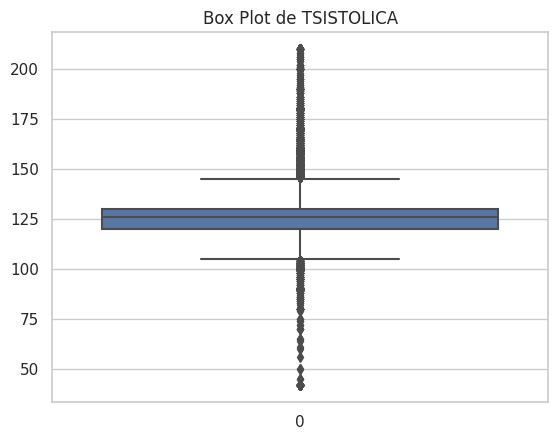

In [197]:
sns.boxplot(train.TSISTOLICA)
plt.title(f'Box Plot de TSISTOLICA')
plt.show()

In [198]:
train.TSISTOLICA.describe()

count    160396.000000
mean        126.010184
std          12.746785
min          41.850000
25%         120.000000
50%         126.000000
75%         130.000000
max         210.000000
Name: TSISTOLICA, dtype: float64

### TDIASTOLICA

La presión arterial normal es cuando la presión arterial diastólica está por debajo de 80

In [199]:
train['TDIASTOLICA'] = train['TDIASTOLICA'].astype(float)

Total de missing values en 'TDIASTOLICA': 25090
Porcentaje de missing values en 'TDIASTOLICA': 15.64%
Descripción de 'TDIASTOLICA':
count    135306.000000
mean         78.261481
std          35.803540
min           0.000000
25%          70.000000
50%          80.000000
75%          80.000000
max        8080.000000
Name: TDIASTOLICA, dtype: float64


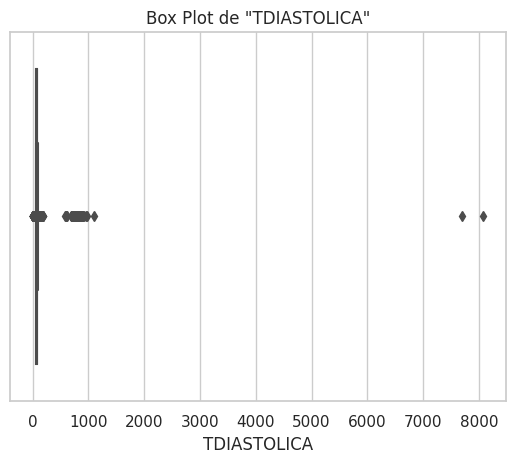

Considerando como límites el percentil 0.001 y percentil 0.9992, el total de outliers en 'TDIASTOLICA' es: 220
'6' valores son iguales a 0


In [200]:
analyze_column1(train, "TDIASTOLICA", 0.001, 0.9992)

##### Atipicos e imputación

In [201]:
train=imputer_quantile(train, "TDIASTOLICA", 0.001, 0.9992)

Y ahora imputaremos con la media los missing values, para esto utilizaremos la siguiente funcion


In [202]:
train=impute_mean(train, "TDIASTOLICA")

## Variables de tipo fecha

In [203]:
train['FECHA_ULTIMA_CITA'] = pd.to_datetime(train['FECHA_ULTIMA_CITA'], errors='coerce')
train['FECHA_ALBUMINA_LAB'] = pd.to_datetime(train['FECHA_ALBUMINA_LAB'], errors='coerce')
train['FECHA_ALBUMINURIA_LAB'] = pd.to_datetime(train['FECHA_ALBUMINURIA_LAB'], errors='coerce')
train['FECHA_ALBUMINURIA24_LAB'] = pd.to_datetime(train['FECHA_ALBUMINURIA24_LAB'], errors='coerce')
train['FECHA_CREATININA_24_LAB'] = pd.to_datetime(train['FECHA_CREATININA_24_LAB'], errors='coerce')
train['FECHA_CREATININA_DEPURACION_LAB'] = pd.to_datetime(train['FECHA_CREATININA_DEPURACION_LAB'], errors='coerce')
train['FECHA_CREATININA_EN_SUERO_ORINA_OTROS_LAB'] = pd.to_datetime(train['FECHA_CREATININA_EN_SUERO_ORINA_OTROS_LAB'], errors='coerce')
train['FECHA_FOSFORO_LAB'] = pd.to_datetime(train['FECHA_FOSFORO_LAB'], errors='coerce')
train['FECHA_HDL_LAB'] = pd.to_datetime(train['FECHA_HDL_LAB'], errors='coerce')
train['FECHA_COLESTEROL_TOTAL_LAB'] = pd.to_datetime(train['FECHA_COLESTEROL_TOTAL_LAB'], errors='coerce')
train['FECHA_HEMOGLOBINA_LAB'] = pd.to_datetime(train['FECHA_HEMOGLOBINA_LAB'], errors='coerce')
train['FECHA_HEMOGLOBINA_GLICOSILADA_LAB'] = pd.to_datetime(train['FECHA_HEMOGLOBINA_GLICOSILADA_LAB'], errors='coerce')
train['FECHA_LDL_LAB'] = pd.to_datetime(train['FECHA_LDL_LAB'], errors='coerce')
train['FECHA_PROTEINURIA_LAB'] = pd.to_datetime(train['FECHA_PROTEINURIA_LAB'], errors='coerce')
train['FECHA_PTH_LAB'] = pd.to_datetime(train['FECHA_PTH_LAB'], errors='coerce')
train['FECHA_RELACION_ALBUMINURIA_CREATINURIA_LAB'] = pd.to_datetime(train['FECHA_RELACION_ALBUMINURIA_CREATINURIA_LAB'], errors='coerce')
train['FECHA_TRIGLICERIDOS_LAB'] = pd.to_datetime(train['FECHA_TRIGLICERIDOS_LAB'], errors='coerce')
train['FECHA_UROANALISIS_LAB'] = pd.to_datetime(train['FECHA_UROANALISIS_LAB'], errors='coerce')
train['FECHA_CERO'] = pd.to_datetime(train['FECHA_CERO'], errors='coerce')

In [204]:
##  Porcentaje de valores nulos
columnas_de_fecha = train.select_dtypes(include=['datetime64']).columns
train[columnas_de_fecha].isna().sum()/train.shape[0]

FECHA_ULTIMA_CITA                             0.329990
FECHA_ALBUMINA_LAB                            0.850882
FECHA_ALBUMINURIA_LAB                         0.215498
FECHA_ALBUMINURIA24_LAB                       0.962661
FECHA_COLESTEROL_TOTAL_LAB                    0.099204
FECHA_CREATININA_24_LAB                       0.937667
FECHA_CREATININA_DEPURACION_LAB               0.898152
FECHA_CREATININA_EN_SUERO_ORINA_OTROS_LAB     0.094161
FECHA_FOSFORO_LAB                             0.878625
FECHA_HDL_LAB                                 0.102378
FECHA_HEMOGLOBINA_LAB                         0.135421
FECHA_HEMOGLOBINA_GLICOSILADA_LAB             0.436245
FECHA_LDL_LAB                                 0.479731
FECHA_PROTEINURIA_LAB                         0.905353
FECHA_PTH_LAB                                 0.885440
FECHA_RELACION_ALBUMINURIA_CREATINURIA_LAB    0.280630
FECHA_TRIGLICERIDOS_LAB                       0.099360
FECHA_UROANALISIS_LAB                         0.131157
FECHA_CERO

Existen columnas que mas del 80% de los registros son nulos

In [205]:
missing = train[columnas_de_fecha].isna().sum() / train.shape[0]
selected_columns = columnas_de_fecha[missing > 0.8]
selected_columns

Index(['FECHA_ALBUMINA_LAB', 'FECHA_ALBUMINURIA24_LAB',
       'FECHA_CREATININA_24_LAB', 'FECHA_CREATININA_DEPURACION_LAB',
       'FECHA_FOSFORO_LAB', 'FECHA_PROTEINURIA_LAB', 'FECHA_PTH_LAB'],
      dtype='object')

**Crearemos nuevas variables donde calcularemos los dias transcurridos desde la fecha cero hasta cada una de las fechas de los examenes**

In [206]:
columnas_de_fecha = train.select_dtypes(include=['datetime64']).columns
for columna_fecha in columnas_de_fecha:
    nombre_nueva_columna = f'DIAS_{columna_fecha}'
    train[nombre_nueva_columna] = (train['FECHA_CERO'] - train[columna_fecha]).dt.days
train = train.drop(columnas_de_fecha, axis=1)

In [207]:
train.shape

(160396, 83)

In [208]:
train.isna().sum()

GENERO                                                  0
ESTADO_CIVIL                                            0
EDAD                                                    0
GRUPO_ETAREO                                            0
TipoAfiliado                                            4
Estrato                                                 0
TSISTOLICA                                              0
TDIASTOLICA                                             0
ANTIHIPERTENSIVOS                                       0
AEI                                                     0
CANCER_MAMA_FAMILIAR                                    0
CANCER_OTRO_SITIO_FAMILIAR                              0
HIPERTENSION_FAMILIAR                                   0
DIABETES_FAMILIAR                                       0
CORONARIOS_FAMILIAR                                     0
CEREBRAL_FAMILIAR                                       0
ENFERMEDAD_RENAL_FAMILIAR                               0
EXFUMADOR     

In [209]:
train.select_dtypes(include=['int64','float64']).columns

Index(['EDAD', 'TSISTOLICA', 'TDIASTOLICA', 'CMes_6', 'CMes_5', 'CMes_4',
       'CMes_3', 'CMes_2', 'CMes_1', 'SMes_6', 'SMes_5', 'SMes_4', 'SMes_3',
       'SMes_2', 'SMes_1', 'MMes_6', 'MMes_5', 'MMes_4', 'MMes_3', 'MMes_2',
       'MMes_1', 'RIESGOS', 'IV_NIVEL', 'HOSPI_NO_QUIRURGICA',
       'CANTIDAD_URGENCIAS', 'HOSPITALIZACION', 'SERVICIOS', 'MEDICAMENTOS',
       'Antiguedad_paciente', 'Tiempo_Ultima_cita', 'DIAS_FECHA_ULTIMA_CITA',
       'DIAS_FECHA_ALBUMINA_LAB', 'DIAS_FECHA_ALBUMINURIA_LAB',
       'DIAS_FECHA_ALBUMINURIA24_LAB', 'DIAS_FECHA_COLESTEROL_TOTAL_LAB',
       'DIAS_FECHA_CREATININA_24_LAB', 'DIAS_FECHA_CREATININA_DEPURACION_LAB',
       'DIAS_FECHA_CREATININA_EN_SUERO_ORINA_OTROS_LAB',
       'DIAS_FECHA_FOSFORO_LAB', 'DIAS_FECHA_HDL_LAB',
       'DIAS_FECHA_HEMOGLOBINA_LAB', 'DIAS_FECHA_HEMOGLOBINA_GLICOSILADA_LAB',
       'DIAS_FECHA_LDL_LAB', 'DIAS_FECHA_PROTEINURIA_LAB',
       'DIAS_FECHA_PTH_LAB', 'DIAS_FECHA_RELACION_ALBUMINURIA_CREATINURIA_LAB',
       

In [210]:
columnas_interes = ['DIAS_FECHA_ULTIMA_CITA',
                    'DIAS_FECHA_ALBUMINURIA_LAB',
                    'DIAS_FECHA_COLESTEROL_TOTAL_LAB',
                    'DIAS_FECHA_CREATININA_EN_SUERO_ORINA_OTROS_LAB',
                    'DIAS_FECHA_HDL_LAB',
                    'DIAS_FECHA_HEMOGLOBINA_LAB', 'DIAS_FECHA_HEMOGLOBINA_GLICOSILADA_LAB',
                    'DIAS_FECHA_LDL_LAB',
                    'DIAS_FECHA_RELACION_ALBUMINURIA_CREATINURIA_LAB',
                    'DIAS_FECHA_TRIGLICERIDOS_LAB', 'DIAS_FECHA_UROANALISIS_LAB']

In [211]:
train[columnas_interes].describe()

DIAS_FECHA_ULTIMA_CITA  DIAS_FECHA_ALBUMINURIA_LAB  \
count           107467.000000               125831.000000   
mean               384.508165                  327.211093   
std                136.113410                  359.733004   
min                -30.000000                  -30.000000   
25%                304.000000                   89.000000   
50%                355.000000                  213.000000   
75%                447.000000                  419.000000   
max                791.000000                 2522.000000   

       DIAS_FECHA_COLESTEROL_TOTAL_LAB  \
count                    144484.000000   
mean                        291.235549   
std                         335.712294   
min                         -30.000000   
25%                          77.000000   
50%                         192.000000   
75%                         356.000000   
max                        2522.000000   

       DIAS_FECHA_CREATININA_EN_SUERO_ORINA_OTROS_LAB  DIAS_FECHA_HDL_LAB  \
count                                   145293.000000       143975.000000   
mean                                       266.634236          294.370085   
std                                        327.864650          337.957002   
min                                        -30.000000          -30.000000   
25%                                         58.000000           78.000000   
50%                                        168.000000          194.000000   
75%                                        321.000000          363.000000   
max                                       2522.000000         2522.000000   

       DIAS_FECHA_HEMOGLOBINA_LAB  DIAS_FECHA_HEMOGLOBINA_GLICOSILADA_LAB  \
count               138675.000000                            90424.000000   
mean                   341.142715                              393.798936   
std                    382.083222                              494.516595   
min                    -30.000000                              -30.000000   
25%                     75.500000                               60.000000   
50%                    213.000000                              188.000000   
75%                    457.000000                              528.000000   
max                   2522.000000                             2521.000000   

       DIAS_FECHA_LDL_LAB  DIAS_FECHA_RELACION_ALBUMINURIA_CREATINURIA_LAB  \
count        83449.000000                                    115384.000000   
mean           644.160146                                       349.403565   
std            587.380342                                       376.620328   
min            -30.000000                                       -30.000000   
25%            131.000000                                        94.000000   
50%            435.000000                                       223.000000   
75%           1178.000000                                       453.000000   
max           2527.000000                                      1736.000000   

       DIAS_FECHA_TRIGLICERIDOS_LAB  DIAS_FECHA_UROANALISIS_LAB  
count                 144459.000000               139359.000000  
mean                     291.977571                  352.517333  
std                      336.464660                  372.489069  
min                      -30.000000                  -30.000000  
25%                       77.000000                   92.000000  
50%                      192.000000                  216.000000  
75%                      359.000000                  483.000000  
max                     2522.000000                 2522.000000

In [212]:
train[columnas_interes].isna().sum()

DIAS_FECHA_ULTIMA_CITA                             52929
DIAS_FECHA_ALBUMINURIA_LAB                         34565
DIAS_FECHA_COLESTEROL_TOTAL_LAB                    15912
DIAS_FECHA_CREATININA_EN_SUERO_ORINA_OTROS_LAB     15103
DIAS_FECHA_HDL_LAB                                 16421
DIAS_FECHA_HEMOGLOBINA_LAB                         21721
DIAS_FECHA_HEMOGLOBINA_GLICOSILADA_LAB             69972
DIAS_FECHA_LDL_LAB                                 76947
DIAS_FECHA_RELACION_ALBUMINURIA_CREATINURIA_LAB    45012
DIAS_FECHA_TRIGLICERIDOS_LAB                       15937
DIAS_FECHA_UROANALISIS_LAB                         21037
dtype: int64

In [213]:
train[columnas_interes].head()

DIAS_FECHA_ULTIMA_CITA  DIAS_FECHA_ALBUMINURIA_LAB  \
ID                                                           
126581                     NaN                        28.0   
155815                     NaN                      1371.0   
108357                   287.0                        64.0   
74673                    292.0                       617.0   
217037                   314.0                         NaN   

        DIAS_FECHA_COLESTEROL_TOTAL_LAB  \
ID                                        
126581                             28.0   
155815                           1371.0   
108357                             65.0   
74673                             269.0   
217037                             92.0   

        DIAS_FECHA_CREATININA_EN_SUERO_ORINA_OTROS_LAB  DIAS_FECHA_HDL_LAB  \
ID                                                                           
126581                                            28.0                28.0   
155815                                          1371.0              1371.0   
108357                                            20.0                65.0   
74673                                            269.0               269.0   
217037                                            92.0                92.0   

        DIAS_FECHA_HEMOGLOBINA_LAB  DIAS_FECHA_HEMOGLOBINA_GLICOSILADA_LAB  \
ID                                                                           
126581                        28.0                                     7.0   
155815                       874.0                                     NaN   
108357                        20.0                                    64.0   
74673                        269.0                                     NaN   
217037                      1484.0                                     NaN   

        DIAS_FECHA_LDL_LAB  DIAS_FECHA_RELACION_ALBUMINURIA_CREATINURIA_LAB  \
ID                                                                            
126581                28.0                                             28.0   
155815              1371.0                                           1371.0   
108357                 NaN                                             64.0   
74673                  NaN                                            617.0   
217037               916.0                                              NaN   

        DIAS_FECHA_TRIGLICERIDOS_LAB  DIAS_FECHA_UROANALISIS_LAB  
ID                                                                
126581                          28.0                        28.0  
155815                        1371.0                      1371.0  
108357                          65.0                        20.0  
74673                          269.0                       617.0  
217037                          92.0                      1288.0

**Imputaremos los nan values por la antiguedad del paciente**

In [214]:
columnas_interes = ['DIAS_FECHA_ULTIMA_CITA', 'DIAS_FECHA_ALBUMINA_LAB',
                'DIAS_FECHA_ALBUMINURIA_LAB', 'DIAS_FECHA_ALBUMINURIA24_LAB',
                'DIAS_FECHA_COLESTEROL_TOTAL_LAB', 'DIAS_FECHA_CREATININA_24_LAB',
                'DIAS_FECHA_CREATININA_DEPURACION_LAB', 'DIAS_FECHA_CREATININA_EN_SUERO_ORINA_OTROS_LAB',
                'DIAS_FECHA_FOSFORO_LAB', 'DIAS_FECHA_HDL_LAB',
                'DIAS_FECHA_HEMOGLOBINA_LAB', 'DIAS_FECHA_HEMOGLOBINA_GLICOSILADA_LAB',
                'DIAS_FECHA_LDL_LAB', 'DIAS_FECHA_PROTEINURIA_LAB',
                'DIAS_FECHA_PTH_LAB', 'DIAS_FECHA_RELACION_ALBUMINURIA_CREATINURIA_LAB',
                'DIAS_FECHA_TRIGLICERIDOS_LAB', 'DIAS_FECHA_UROANALISIS_LAB']

## Se transforma la variable a dias
train['Antiguedad_paciente'] = train['Antiguedad_paciente'] * 365

for columna in columnas_interes:
  train[columna].fillna(train['Antiguedad_paciente'], inplace=True)
  #train[columna] = np.where(train[columna] < 0, train['Antiguedad_paciente'], train[columna])

## Eliminamos datalekage en los datos, corresponde al 10% de los datos
train = train[~(train[columnas_interes] < 0).any(axis=1)]

In [215]:
train[columnas_interes].describe()

DIAS_FECHA_ULTIMA_CITA  DIAS_FECHA_ALBUMINA_LAB  \
count           143038.000000            143038.000000   
mean              1399.107398              3353.178116   
std               2194.841052              2862.412626   
min                  0.000000                 0.000000   
25%                315.000000              1048.000000   
50%                414.000000              2280.438056   
75%               1033.292266              5881.971253   
max              10069.103354             10069.103354   

       DIAS_FECHA_ALBUMINURIA_LAB  DIAS_FECHA_ALBUMINURIA24_LAB  \
count               143038.000000                 143038.000000   
mean                  1081.963868                   3794.024724   
std                   1976.566034                   2872.778962   
min                      0.000000                      0.000000   
25%                    138.000000                   1248.145106   
50%                    292.000000                   3010.937714   
75%                    870.000000                   6347.652293   
max                  10069.103354                  10069.103354   

       DIAS_FECHA_COLESTEROL_TOTAL_LAB  DIAS_FECHA_CREATININA_24_LAB  \
count                    143038.000000                 143038.000000   
mean                        580.993662                   3707.005184   
std                        1245.807441                   2857.080576   
min                           0.000000                      0.000000   
25%                         106.000000                   1217.166324   
50%                         237.000000                   2829.062286   
75%                         467.000000                   6257.464066   
max                       10069.103354                  10069.103354   

       DIAS_FECHA_CREATININA_DEPURACION_LAB  \
count                         143038.000000   
mean                            3632.068189   
std                             2876.325434   
min                                0.000000   
25%                             1156.208077   
50%                             2708.145106   
75%                             6184.763860   
max                            10069.103354   

       DIAS_FECHA_CREATININA_EN_SUERO_ORINA_OTROS_LAB  DIAS_FECHA_FOSFORO_LAB  \
count                                   143038.000000           143038.000000   
mean                                       541.635625             3465.712619   
std                                       1198.372496             2872.515875   
min                                          0.000000                0.000000   
25%                                         90.000000             1125.229295   
50%                                        213.853525             2403.353867   
75%                                        436.000000             6000.889802   
max                                      10069.103354            10069.103354   

       DIAS_FECHA_HDL_LAB  DIAS_FECHA_HEMOGLOBINA_LAB  \
count       143038.000000               143038.000000   
mean           594.926329                  722.731814   
std           1268.153144                 1423.768510   
min              0.000000                    0.000000   
25%            110.000000                  119.000000   
50%            239.000000                  276.000000   
75%            477.672827                  643.000000   
max          10069.103354                10069.103354   

       DIAS_FECHA_HEMOGLOBINA_GLICOSILADA_LAB  DIAS_FECHA_LDL_LAB  \
count                           143038.000000       143038.000000   
mean                              1818.914223         2127.401339   
std                               2462.238398         2507.557534   
min                                  0.000000            0.000000   
25%                                170.000000          318.000000   
50%                                667.542779         1186.187543   
75%                               2189.500342         2616.208077   
max        

**Ahora verficaremos y eliminaremos cualquier data leakage**

In [216]:
filas_filtradas = train[(train[columnas_interes] < 0).any(axis=1)]

In [217]:
## Eliminamos datalekage en los datos, corresponde al 10% de los datos
train = train[~(train[columnas_interes] < 0).any(axis=1)]

In [218]:
#Eliminamos esta columna ya que es la diferencia de la fecha cero con ella misma
nombre_columna_a_eliminar = 'DIAS_FECHA_CERO'
train = train.drop(columns=[nombre_columna_a_eliminar])

In [219]:
len(train.select_dtypes(include=['int64','float64']).columns)

48

In [220]:
len(train.select_dtypes(include=['object']).columns)

34

# Feature Engineering

## Tratamiento de Variables categoricas

In [221]:
categoricas=train.select_dtypes(include=['object']).columns

### ENFERMEDAD_RENAL_FAMILIAR'

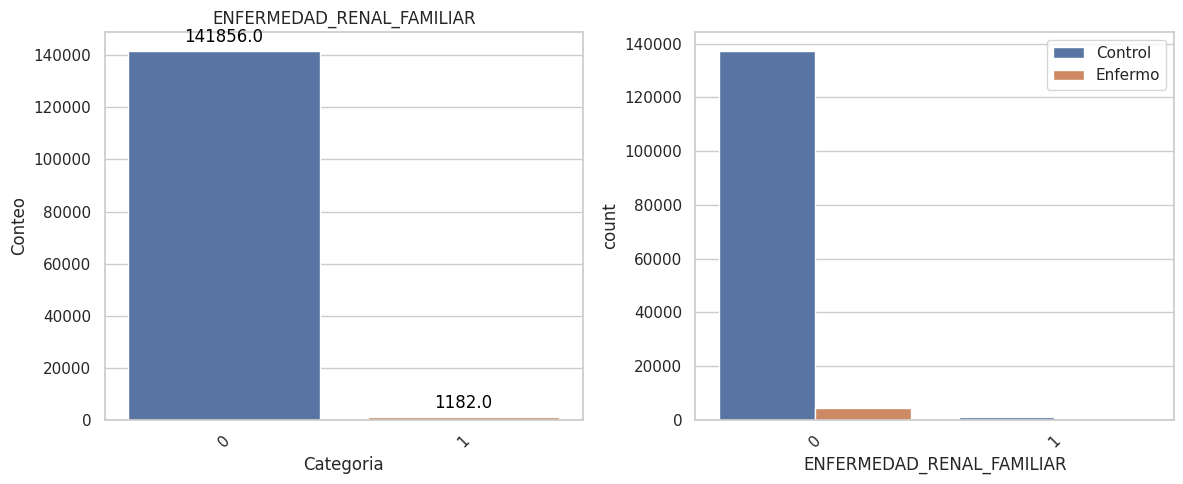

In [222]:
count_plot(train, 'ENFERMEDAD_RENAL_FAMILIAR')

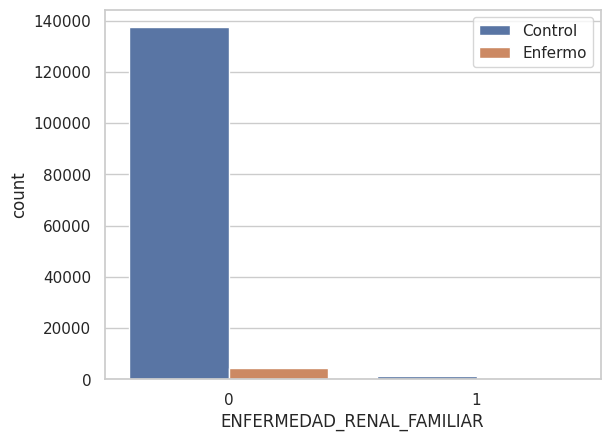

In [223]:
sns.countplot(x=train.ENFERMEDAD_RENAL_FAMILIAR, hue="Target", data=train)
plt.legend(['Control', 'Enfermo'])

### Riesgos

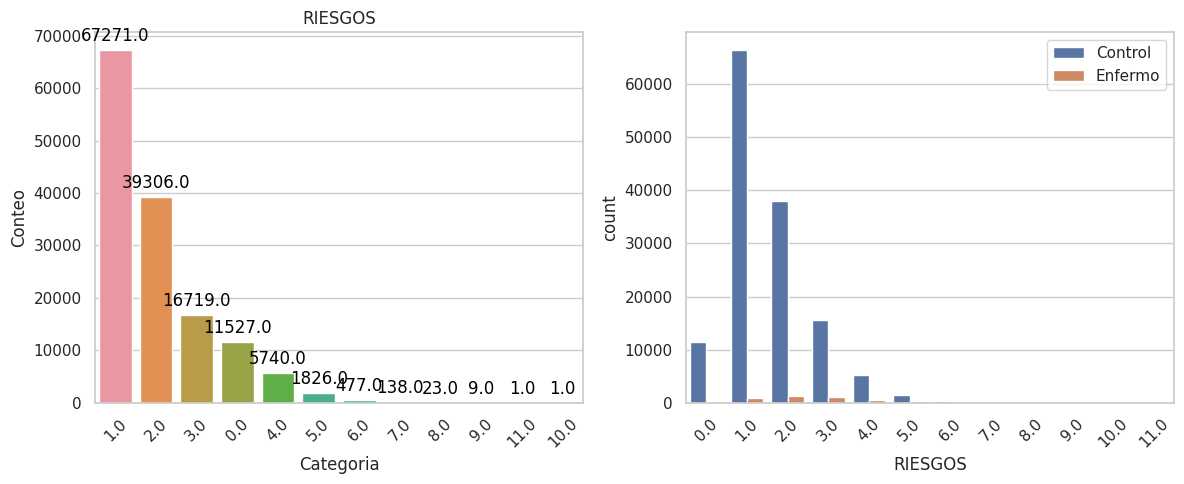

In [224]:
count_plot(train, 'RIESGOS')

In [225]:
train['grupo_riesgos'] = train['RIESGOS'].apply(agrupar_riesgos)
train = train.drop(columns=['RIESGOS'])

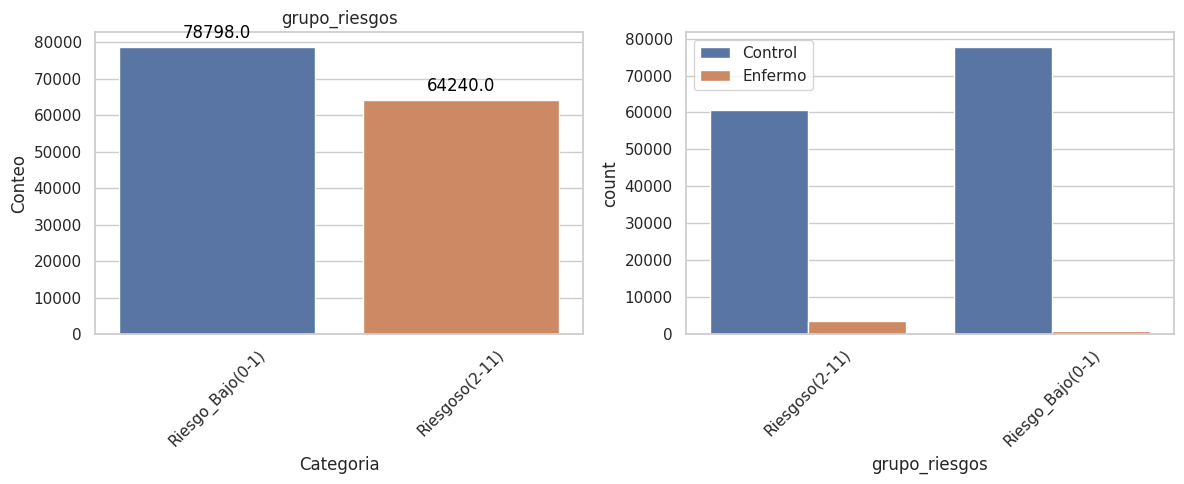

In [226]:
count_plot(train, 'grupo_riesgos')

### CEREBRAL_FAMILIAR

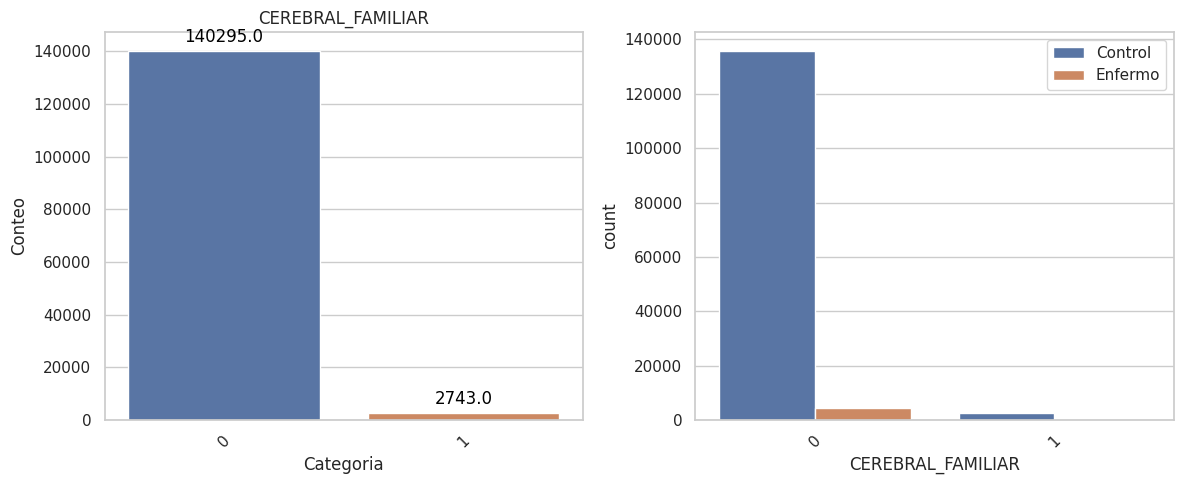

In [227]:
count_plot(train, 'CEREBRAL_FAMILIAR')

### CORONARIOS_FAMILIAR

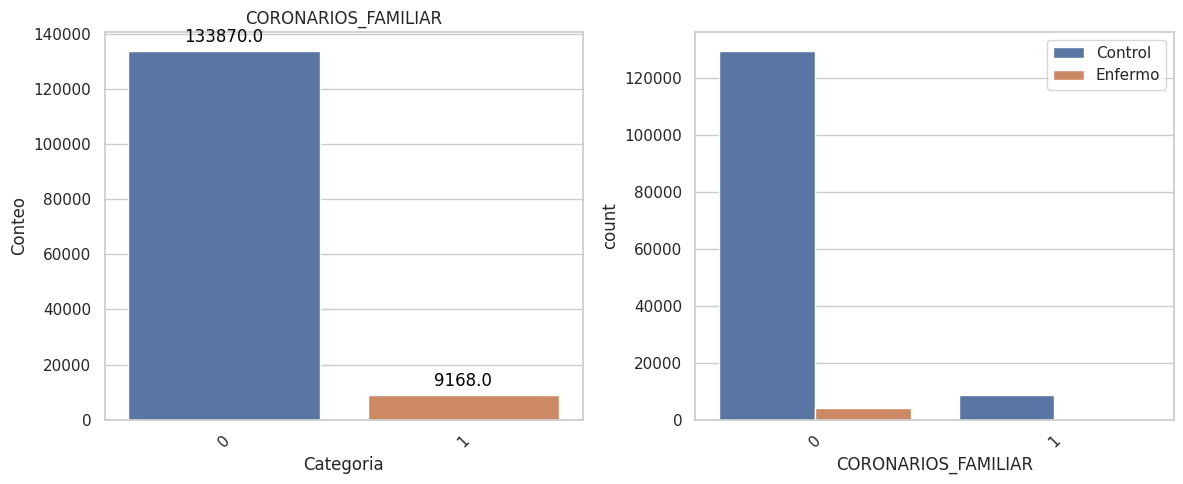

In [228]:
count_plot(train, 'CORONARIOS_FAMILIAR')

### DIABETES_FAMILIAR

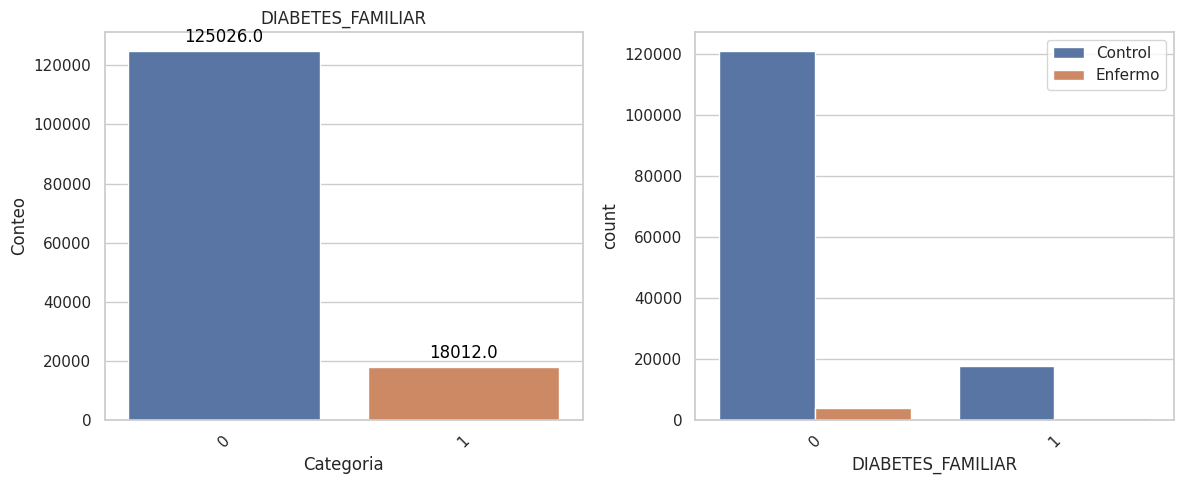

In [229]:
count_plot(train, 'DIABETES_FAMILIAR')

### HIPERTENSION_FAMILIAR

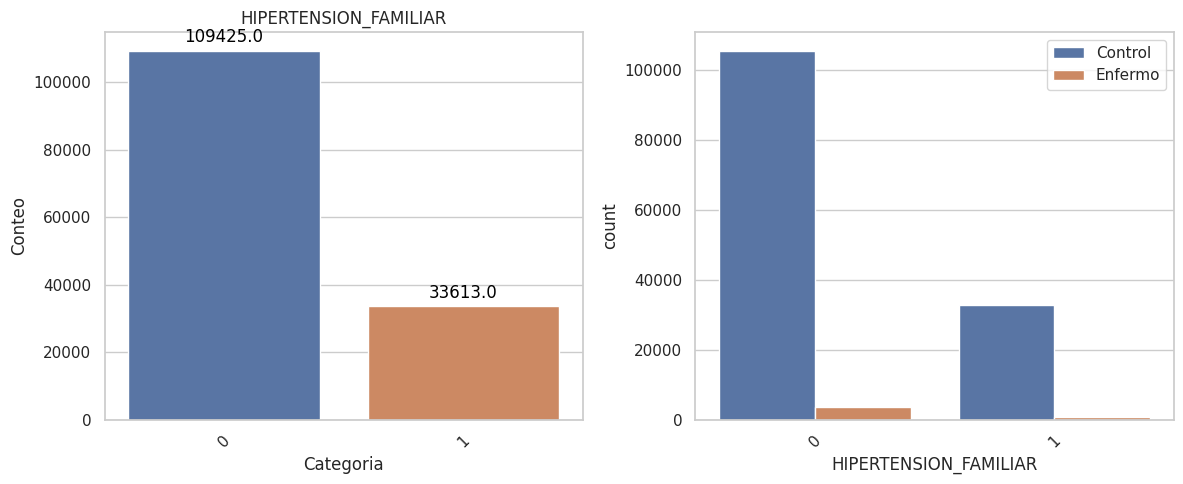

In [230]:
count_plot(train, 'HIPERTENSION_FAMILIAR')

### CANCER_OTRO_SITIO_FAMILIAR

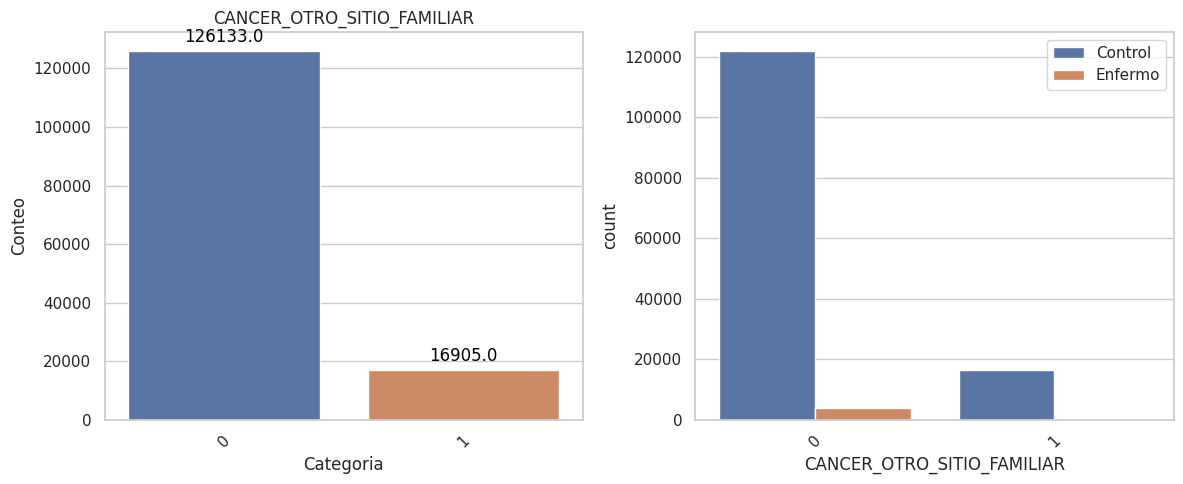

In [231]:
count_plot(train, 'CANCER_OTRO_SITIO_FAMILIAR')

### CANCER_MAMA_FAMILIAR

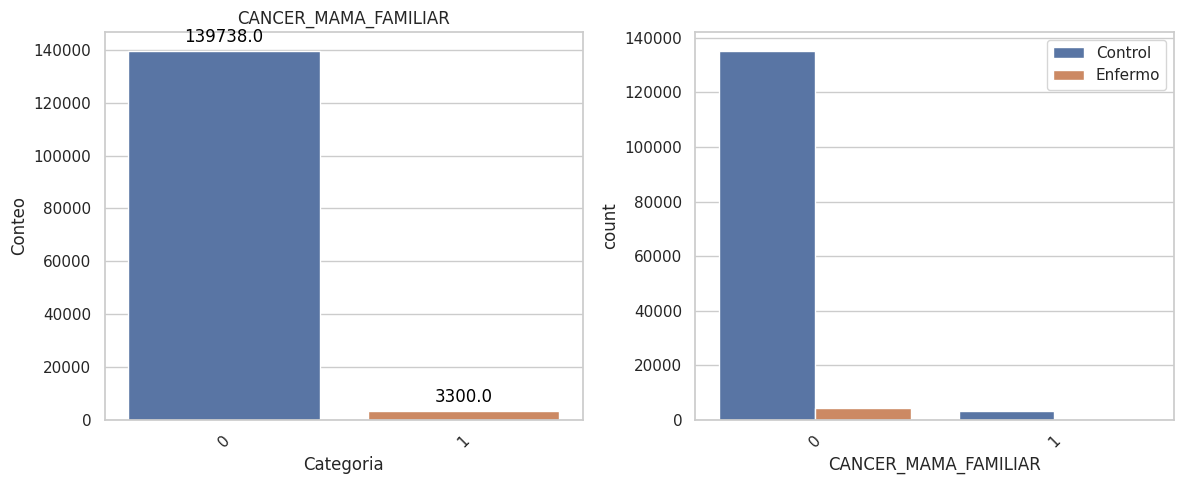

In [232]:
count_plot(train, 'CANCER_MAMA_FAMILIAR')

### AEI

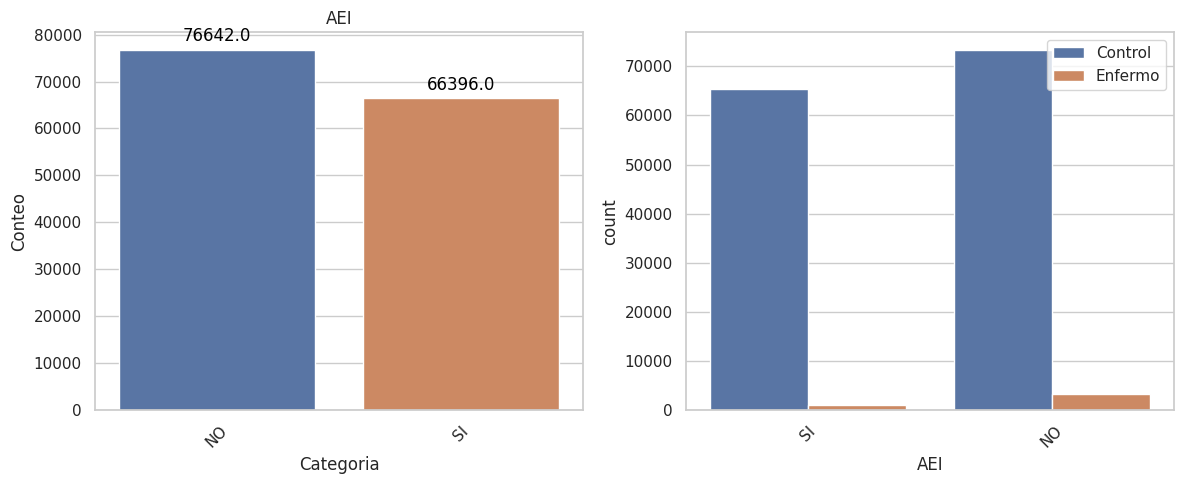

In [233]:
count_plot(train, 'AEI')

### ANTIHIPERTENSIVOS

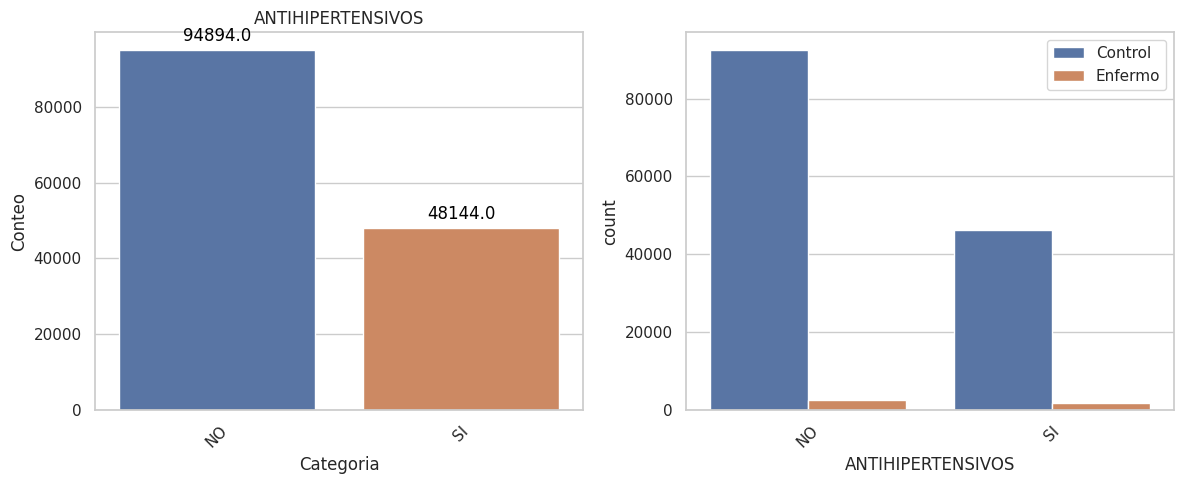

In [234]:
count_plot(train, 'ANTIHIPERTENSIVOS')

### Estrato

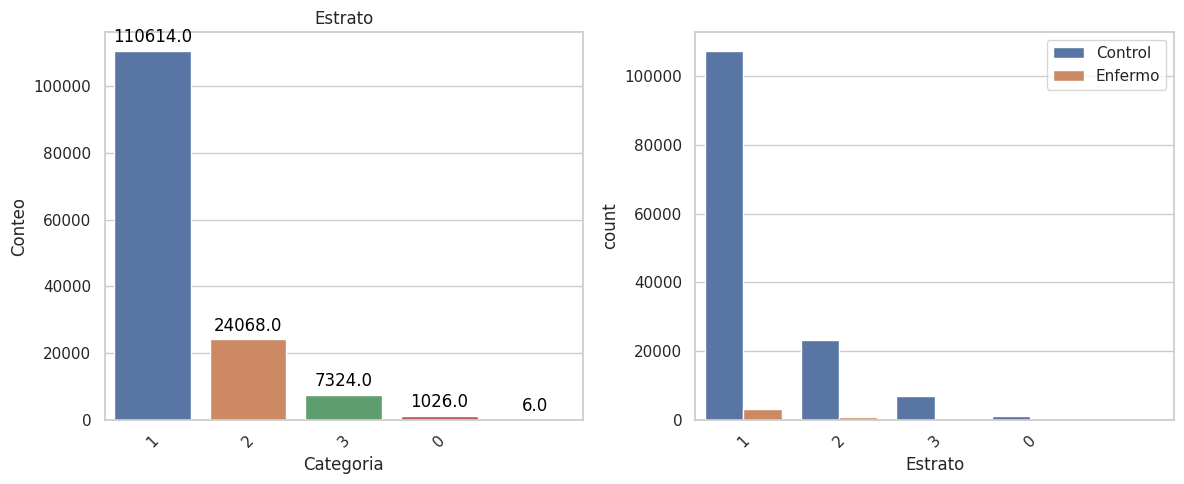

In [235]:
count_plot(train, 'Estrato')

In [236]:
train.Estrato.unique()

array(['1', '2', '3', '0', ''], dtype=object)

Existe valores vacios, se debe de tomar una decision frente a este cam

### Tipo afiliado

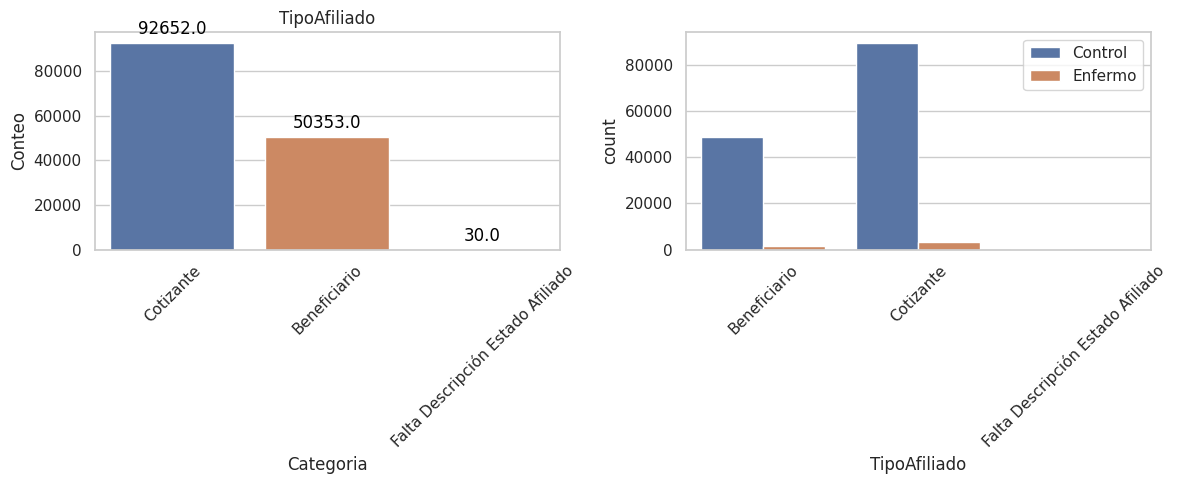

In [237]:
count_plot(train, 'TipoAfiliado')

In [238]:
train[train['Target']=='1']["TipoAfiliado"].value_counts()

Cotizante       3040
Beneficiario    1405
Name: TipoAfiliado, dtype: int64

La variable 'Falta Descripción Estado Afiliado' no esta generando valor para el analisis, se opta por eliminar estos registros

### GRUPO_ETAREO

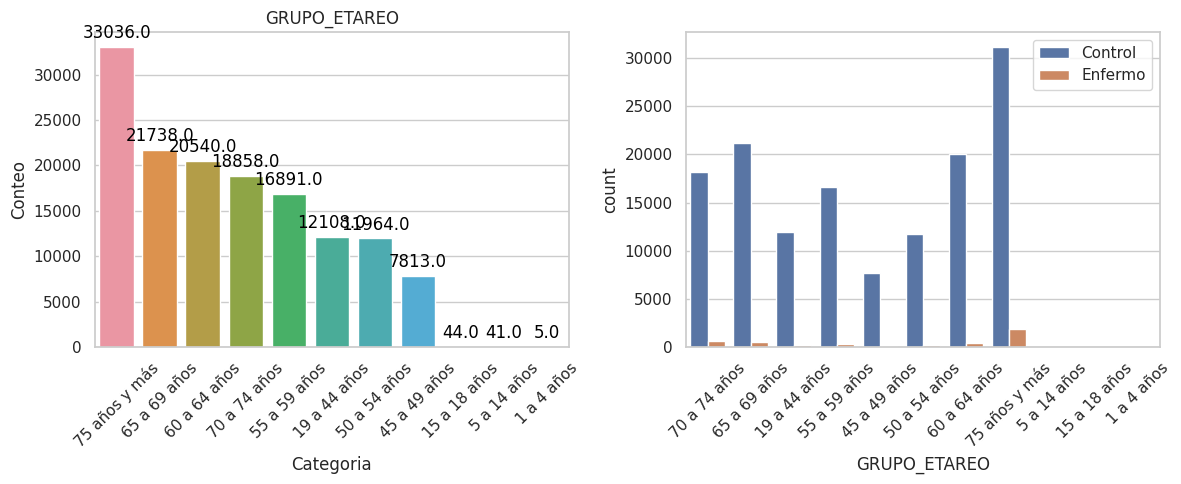

In [239]:
count_plot(train, 'GRUPO_ETAREO')

In [240]:
train["GRUPO_ETAREO"].value_counts()

75 años y más    33036
65 a 69 años     21738
60 a 64 años     20540
70 a 74 años     18858
55 a 59 años     16891
19 a 44 años     12108
50 a 54 años     11964
45 a 49 años      7813
15 a 18 años        44
5 a 14 años         41
1 a 4 años           5
Name: GRUPO_ETAREO, dtype: int64

### ESTADO_CIVIL

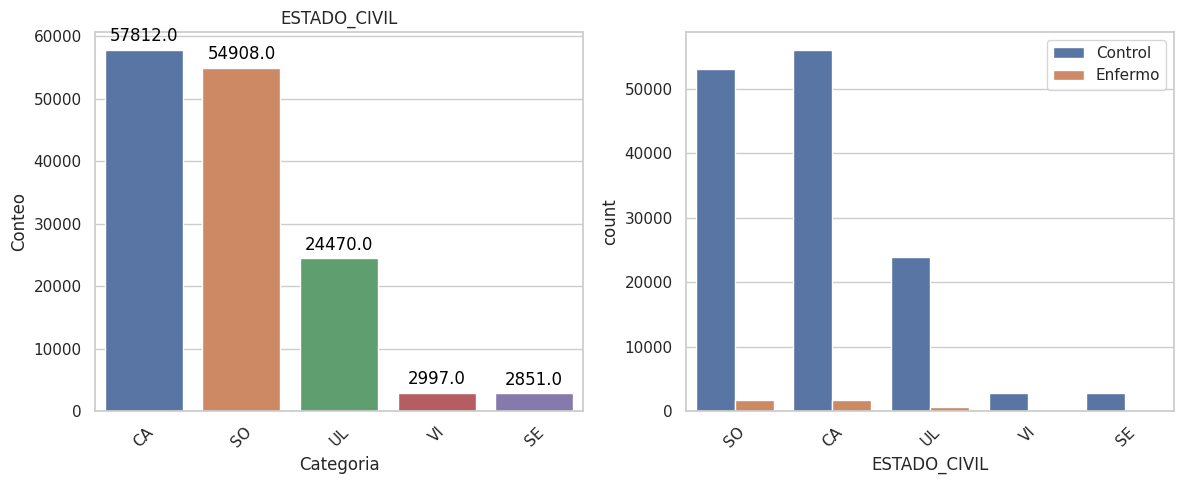

In [241]:
count_plot(train, 'ESTADO_CIVIL')

In [242]:
train["ESTADO_CIVIL"].value_counts(True)

CA    0.404172
SO    0.383870
UL    0.171073
VI    0.020952
SE    0.019932
Name: ESTADO_CIVIL, dtype: float64

### GENERO

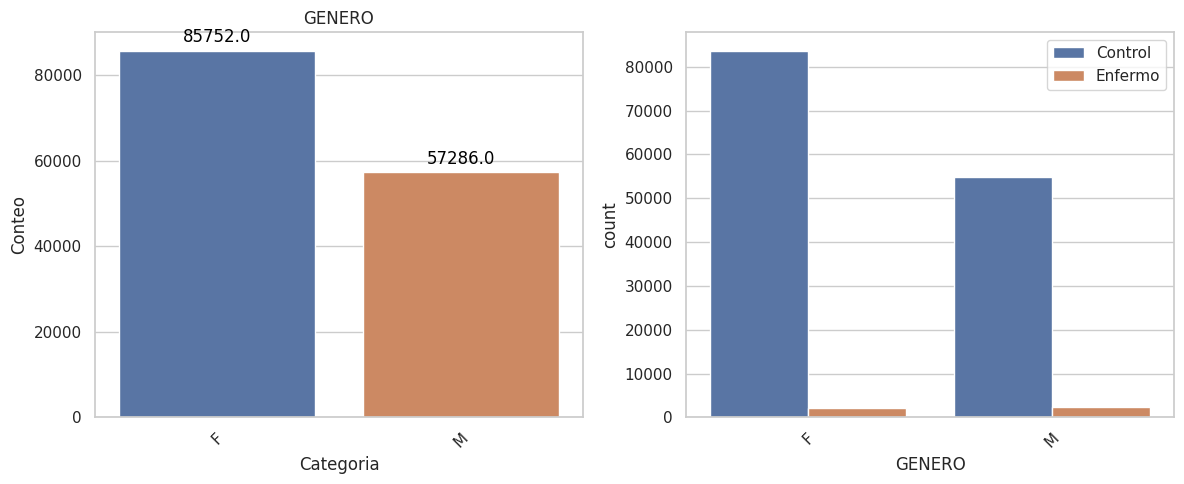

In [243]:
count_plot(train, 'GENERO')

### Exfumador

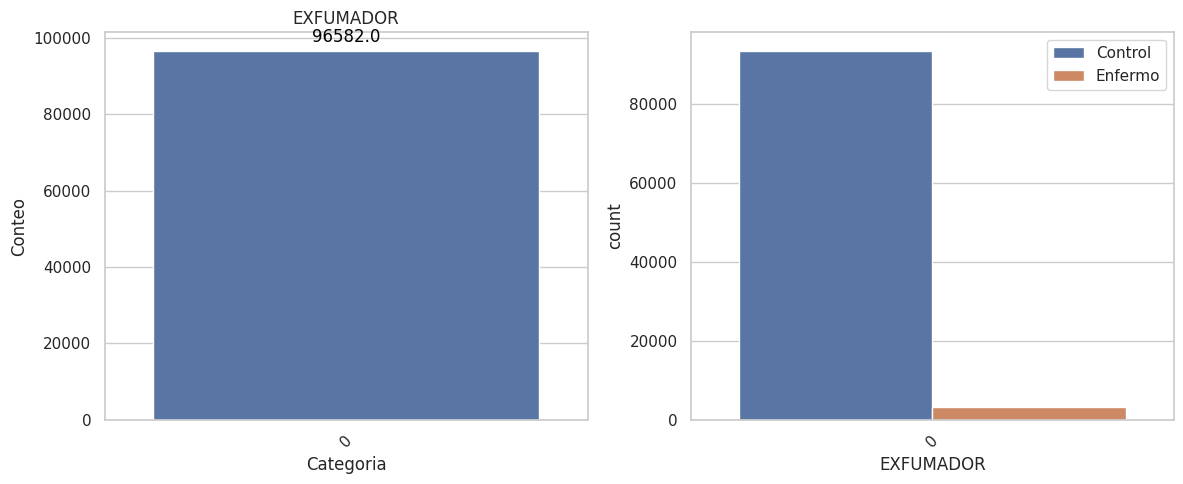

In [244]:
count_plot(train, 'EXFUMADOR')

In [245]:
train.EXFUMADOR.describe()

count     96582
unique        1
top           0
freq      96582
Name: EXFUMADOR, dtype: object

### FUMADOR

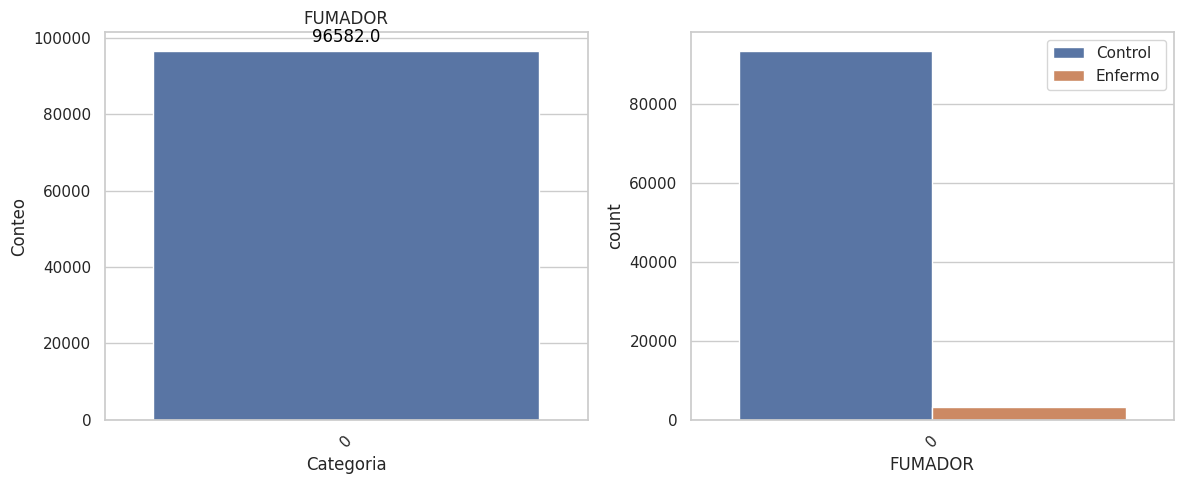

In [246]:
count_plot(train, 'FUMADOR')

In [247]:
train.FUMADOR.describe()

count     96582
unique        1
top           0
freq      96582
Name: FUMADOR, dtype: object

Debido a que las variables FUMADOR y EXFUMADOR solo contiene valores iguales a 0 y none, no las consideraremos en nuestro modelo

### ALBUMINA

La albúmina es una proteína producida por el hígado. La albúmina ingresa al torrente sanguíneo y ayuda a mantener el líquido sin que se filtre de los vasos sanguíneos a otros tejidos.

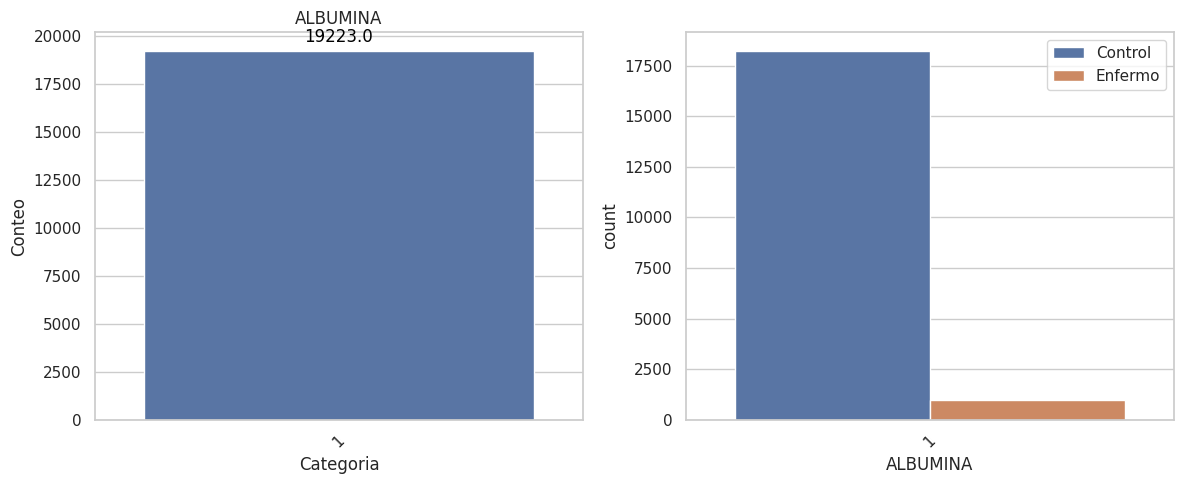

In [248]:
count_plot(train, 'ALBUMINA')

Imputaremos los valores iguales a None con 0, suponiendo que no tienen el examen

In [249]:
train['ALBUMINA'] = train['ALBUMINA'].replace('None', '0')

### ALBUMINURIA

La albuminuria es un signo de enfermedad renal y significa que el paciente tiene exceso de albúmina en la orina

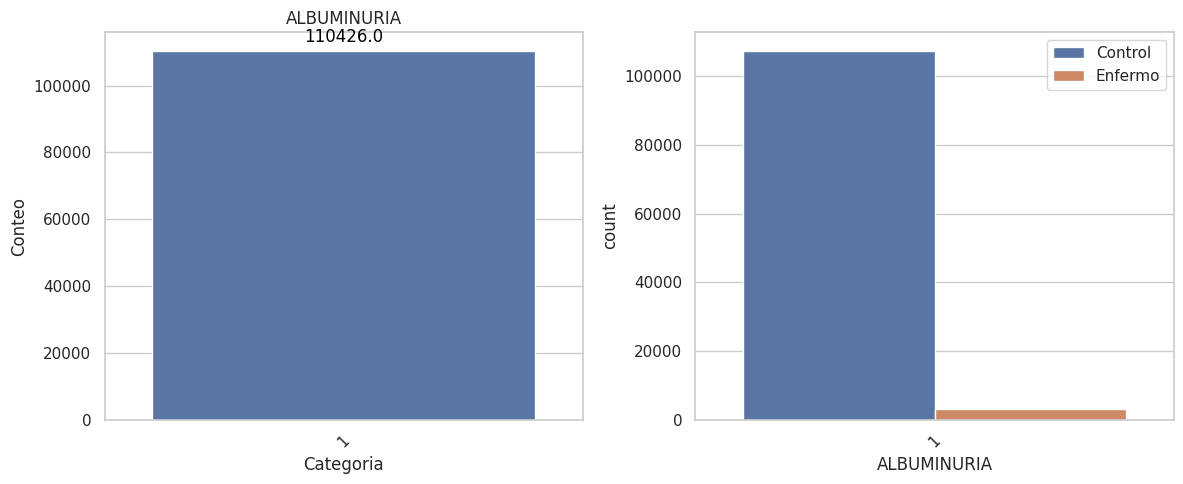

In [250]:
count_plot(train, 'ALBUMINURIA')

Imputaremos los valores iguales a None con 0, suponiendo que no tienen el examen

In [251]:
train['ALBUMINURIA'] = train['ALBUMINURIA'].replace('None', '0')

### ALBUMINURIA24

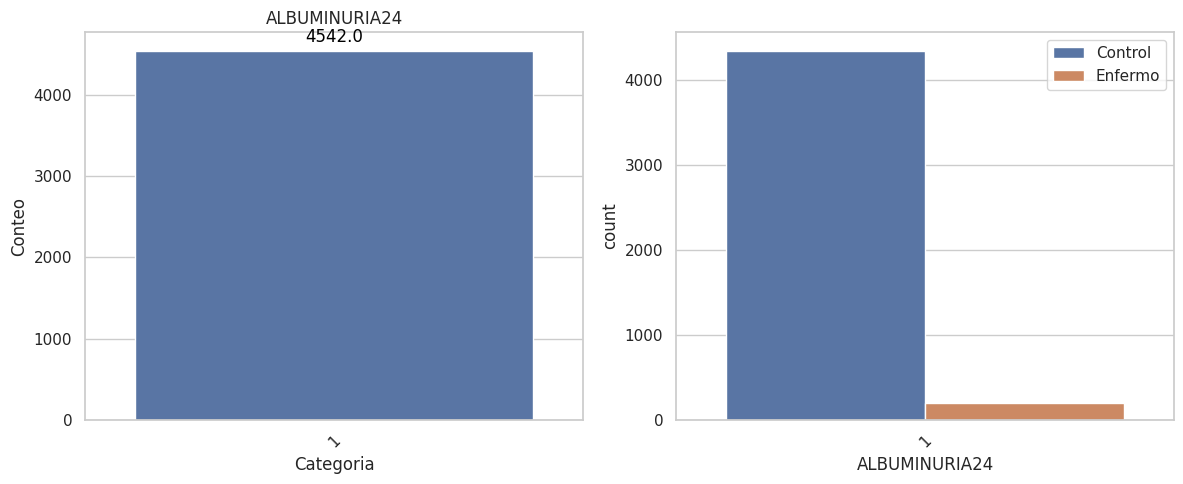

In [252]:
count_plot(train, 'ALBUMINURIA24')

Imputaremos los valores iguales a None con 0, suponiendo que no tienen el examen

In [253]:
train['ALBUMINURIA24'] = train['ALBUMINURIA24'].replace('None', '0')

### COLESTEROL_TOTAL

Cantidad total de colesterol en la sangre. Incluye ambos tipos: El colesterol de lipoproteína de baja densidad (LDL, por su sigla en inglés) y el colesterol de lipoproteína de alta densidad (HDL, por su sigla en inglés)

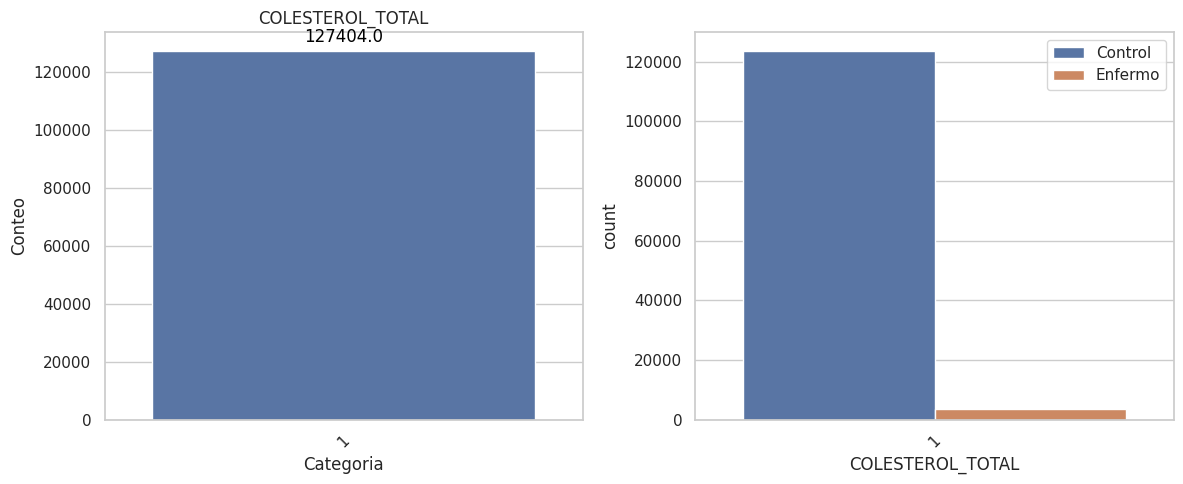

In [254]:
count_plot(train, 'COLESTEROL_TOTAL')

Imputaremos los valores iguales a None con 0, suponiendo que no tienen el examen

In [255]:
train['COLESTEROL_TOTAL'] = train['COLESTEROL_TOTAL'].replace('None', '0')

### CREATININA_24

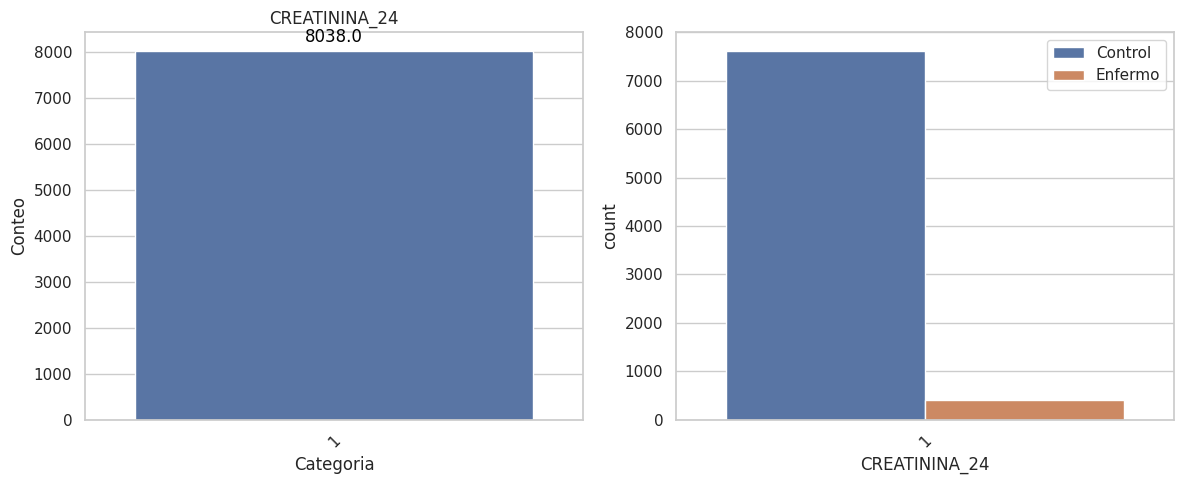

In [256]:
count_plot(train, 'CREATININA_24')

Imputaremos los valores iguales a None con 0, suponiendo que no tienen el examen

In [257]:
train['CREATININA_24'] = train['CREATININA_24'].replace('None', '0')

### CREATININA_DEPURACION

El examen de depuración de la creatinina compara el nivel de creatinina en la orina con el nivel de creatinina en la sangre

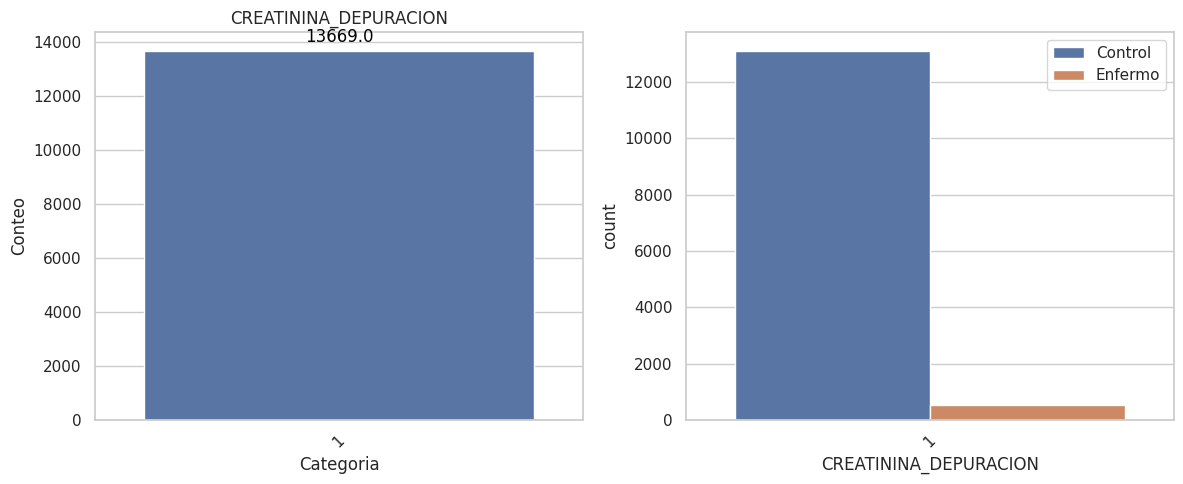

In [258]:
count_plot(train, 'CREATININA_DEPURACION')

Imputaremos los valores iguales a None con 0, suponiendo que no tienen el examen

In [259]:
train['CREATININA_DEPURACION'] = train['CREATININA_DEPURACION'].replace('None', '0')

### FOSFORO

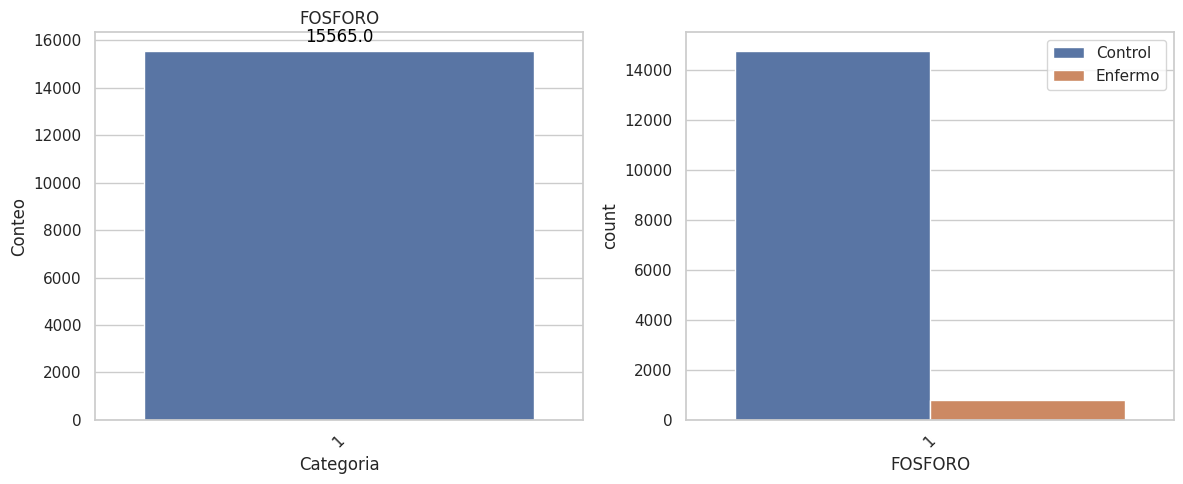

In [260]:
count_plot(train, 'FOSFORO')

Imputaremos los valores iguales a None con 0, suponiendo que no tienen el examen

In [261]:
train['FOSFORO'] = train['FOSFORO'].replace('None', '0')

### HDL

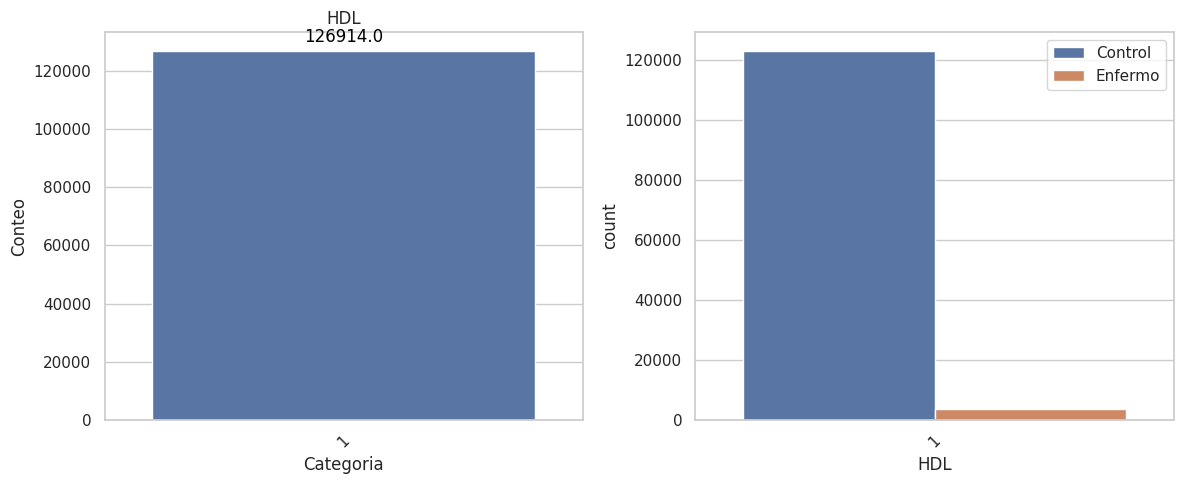

In [262]:
count_plot(train, 'HDL')

Imputaremos los valores iguales a None con 0, suponiendo que no tienen el examen

In [263]:
train['HDL'] = train['HDL'].replace('None', '0')

### HEMOGLOBINA

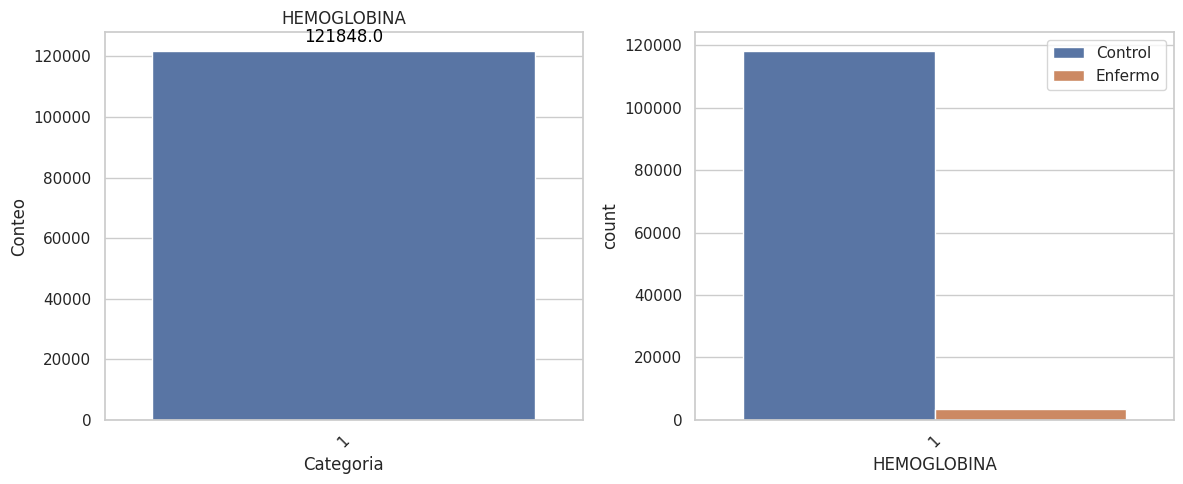

In [264]:
count_plot(train, 'HEMOGLOBINA')

Imputaremos los valores iguales a None con 0, suponiendo que no tienen el examen

In [265]:
train['HEMOGLOBINA'] = train['HEMOGLOBINA'].replace('None', '0')

### HEMOGLOBINA_GLICOSILADA

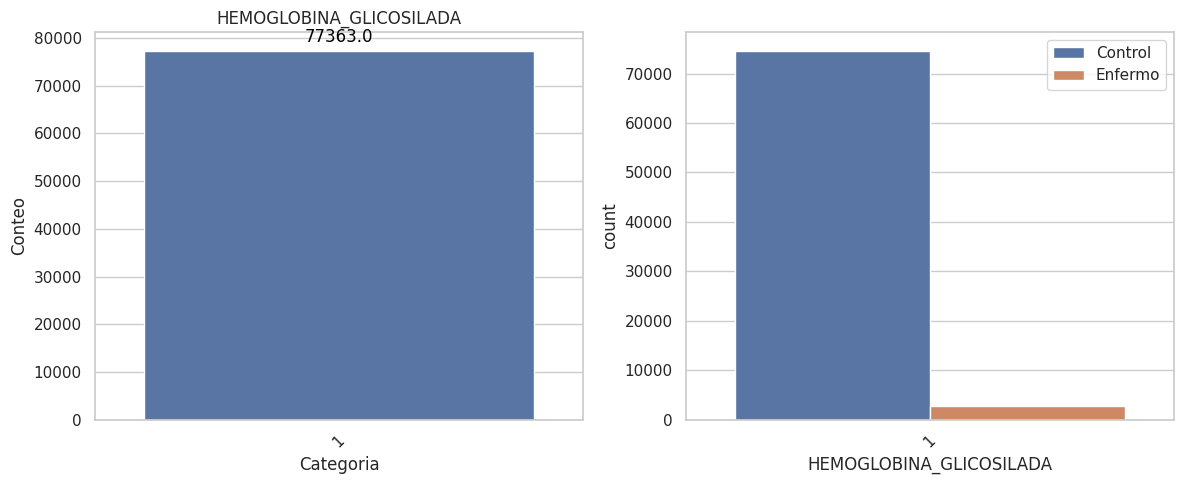

In [266]:
count_plot(train, 'HEMOGLOBINA_GLICOSILADA')

Imputaremos los valores iguales a None con 0, suponiendo que no tienen el examen

In [267]:
train['HEMOGLOBINA_GLICOSILADA'] = train['HEMOGLOBINA_GLICOSILADA'].replace('None', '0')

### LDL

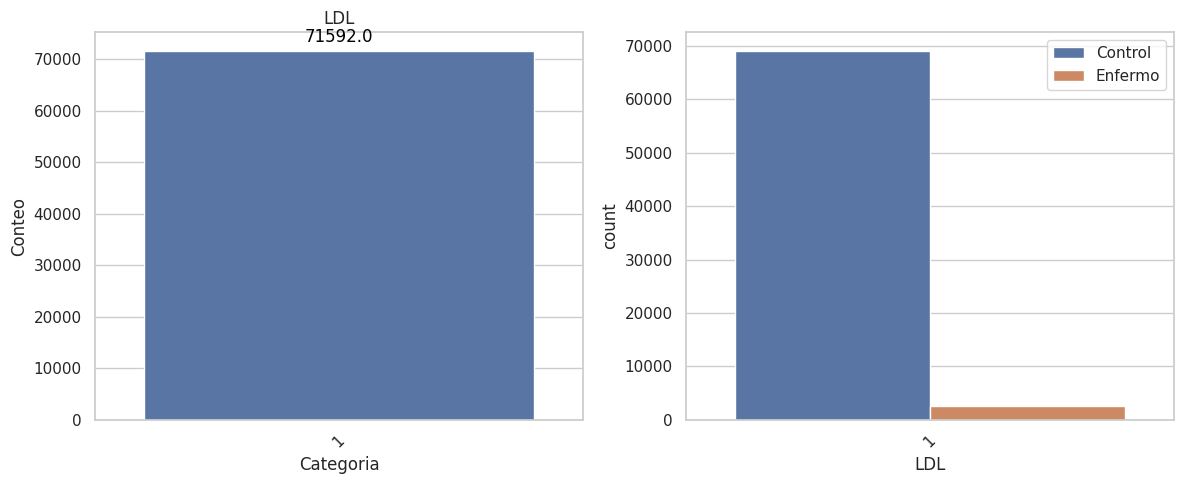

In [268]:
count_plot(train, 'LDL')

Imputaremos los valores iguales a None con 0, suponiendo que no tienen el examen

In [269]:
train['LDL'] = train['LDL'].replace('None', '0')

### PROTEINURIA

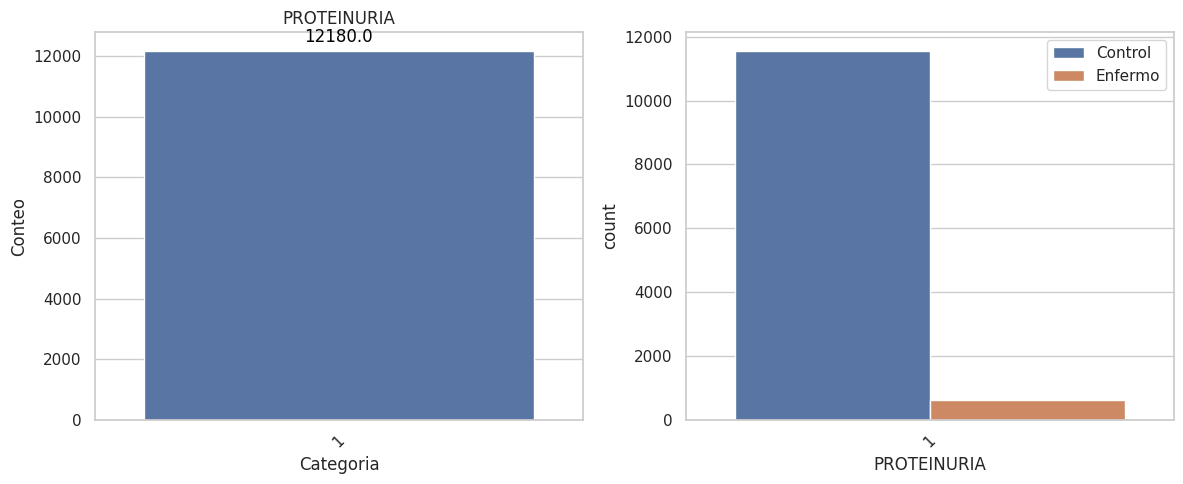

In [270]:
count_plot(train, 'PROTEINURIA')

Imputaremos los valores iguales a None con 0, suponiendo que no tienen el examen

In [271]:
train['PROTEINURIA'] = train['PROTEINURIA'].replace('None', '0')

### PTH

PTH o paratirina, es una hormona peptídica secretada por la glándula paratiroides que interviene en la regulación del metabolismo del calcio y del fósforo

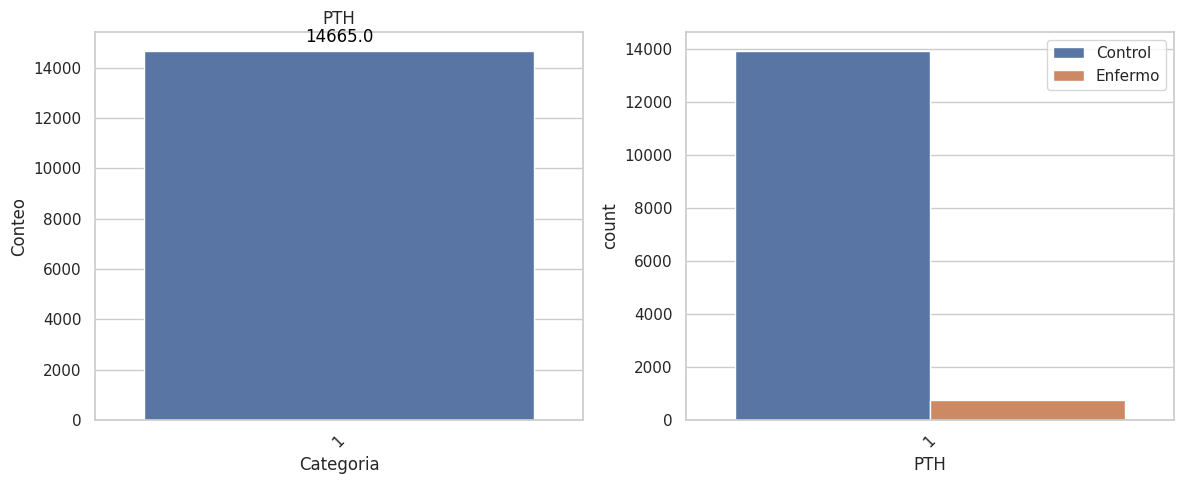

In [272]:
count_plot(train, 'PTH')

Imputaremos los valores iguales a None con 0, suponiendo que no tienen el examen

In [273]:
train['PTH'] = train['PTH'].replace('None', '0')

### RELACION_ALBUMINURIA_CREATINURIA

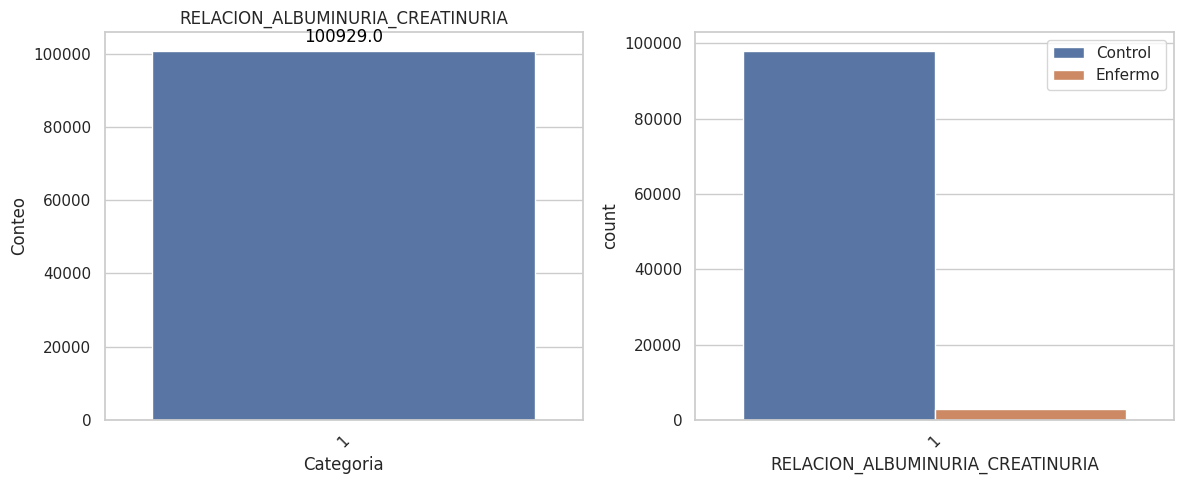

In [274]:
count_plot(train, 'RELACION_ALBUMINURIA_CREATINURIA')

Imputaremos los valores iguales a None con 0, suponiendo que no tienen el examen

In [275]:
train['RELACION_ALBUMINURIA_CREATINURIA'] = train['RELACION_ALBUMINURIA_CREATINURIA'].replace('None', '0')

### TRIGLICERIDOS

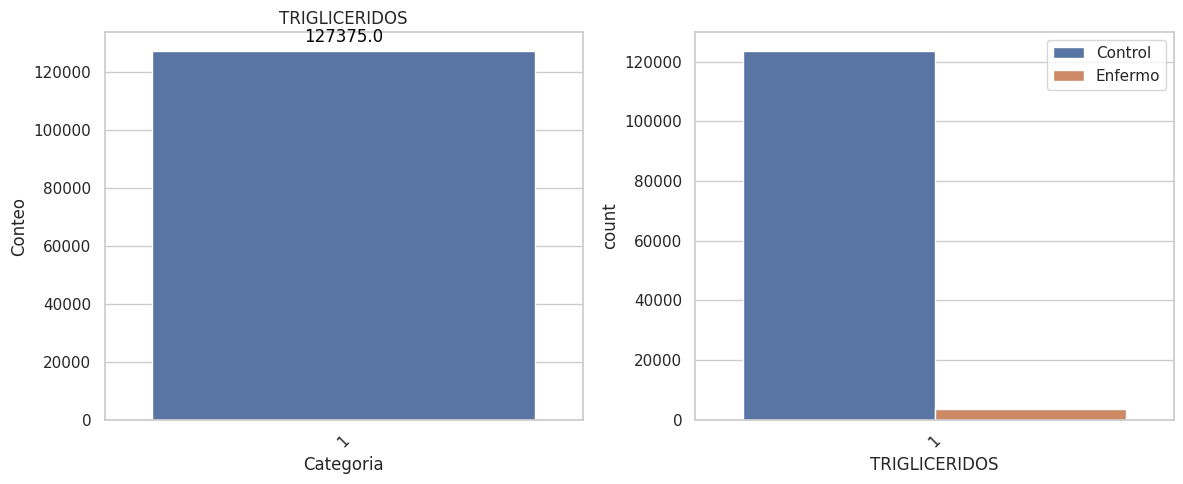

In [276]:
count_plot(train, 'TRIGLICERIDOS')

Imputaremos los valores iguales a None con 0, suponiendo que no tienen el examen

In [277]:
train['TRIGLICERIDOS'] = train['TRIGLICERIDOS'].replace('None', '0')

### UROANALISIS

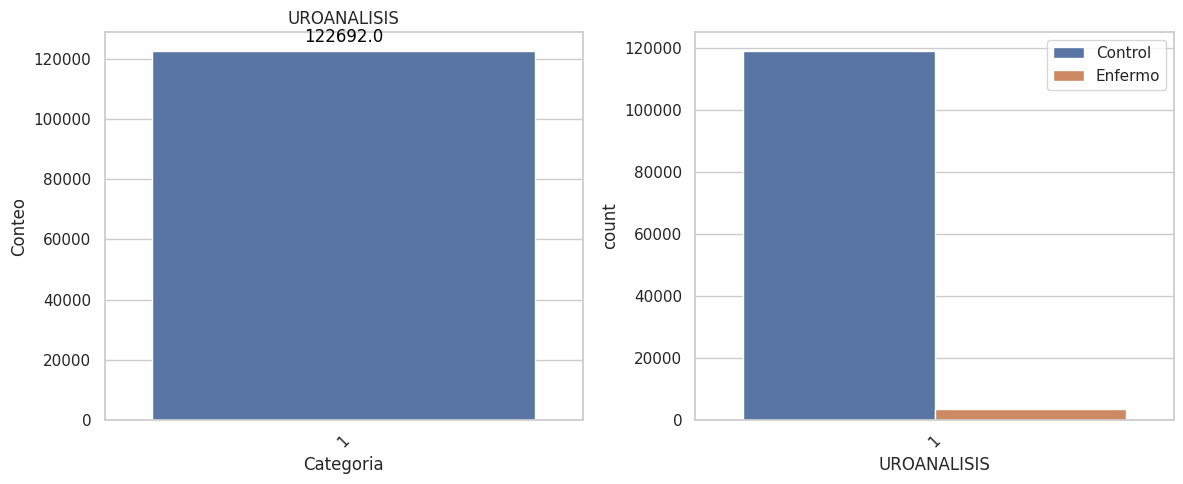

In [278]:
count_plot(train, 'UROANALISIS')

Imputaremos los valores iguales a None con 0, suponiendo que no tienen el examen

In [279]:
train['UROANALISIS'] = train['UROANALISIS'].replace('None', '0')

In [280]:
train.UROANALISIS.describe(())

count     122692
unique         1
top            1
freq      122692
Name: UROANALISIS, dtype: object

In [281]:
## como se van a trabajar con variables medidas en dias, vamos a eliminar estas variables
columnas_a_eliminar = [
    'PROTEINURIA',
    'ALBUMINA',
    'ALBUMINURIA',
    'ALBUMINURIA24',
    'COLESTEROL_TOTAL',
    'CREATININA_24',
    'CREATININA_DEPURACION',
    'CREATININA_EN_SUERO_ORINA_OTROS',
    'FOSFORO',
    'HDL',
    'HEMOGLOBINA',
    'HEMOGLOBINA_GLICOSILADA',
    'LDL',
    'PTH',
    'RELACION_ALBUMINURIA_CREATINURIA',
    'TRIGLICERIDOS',
    'UROANALISIS']

# Elimina las columnas redundantes del DataFrame
train = train.drop(columns=columnas_a_eliminar)

## Diagrama de densidad

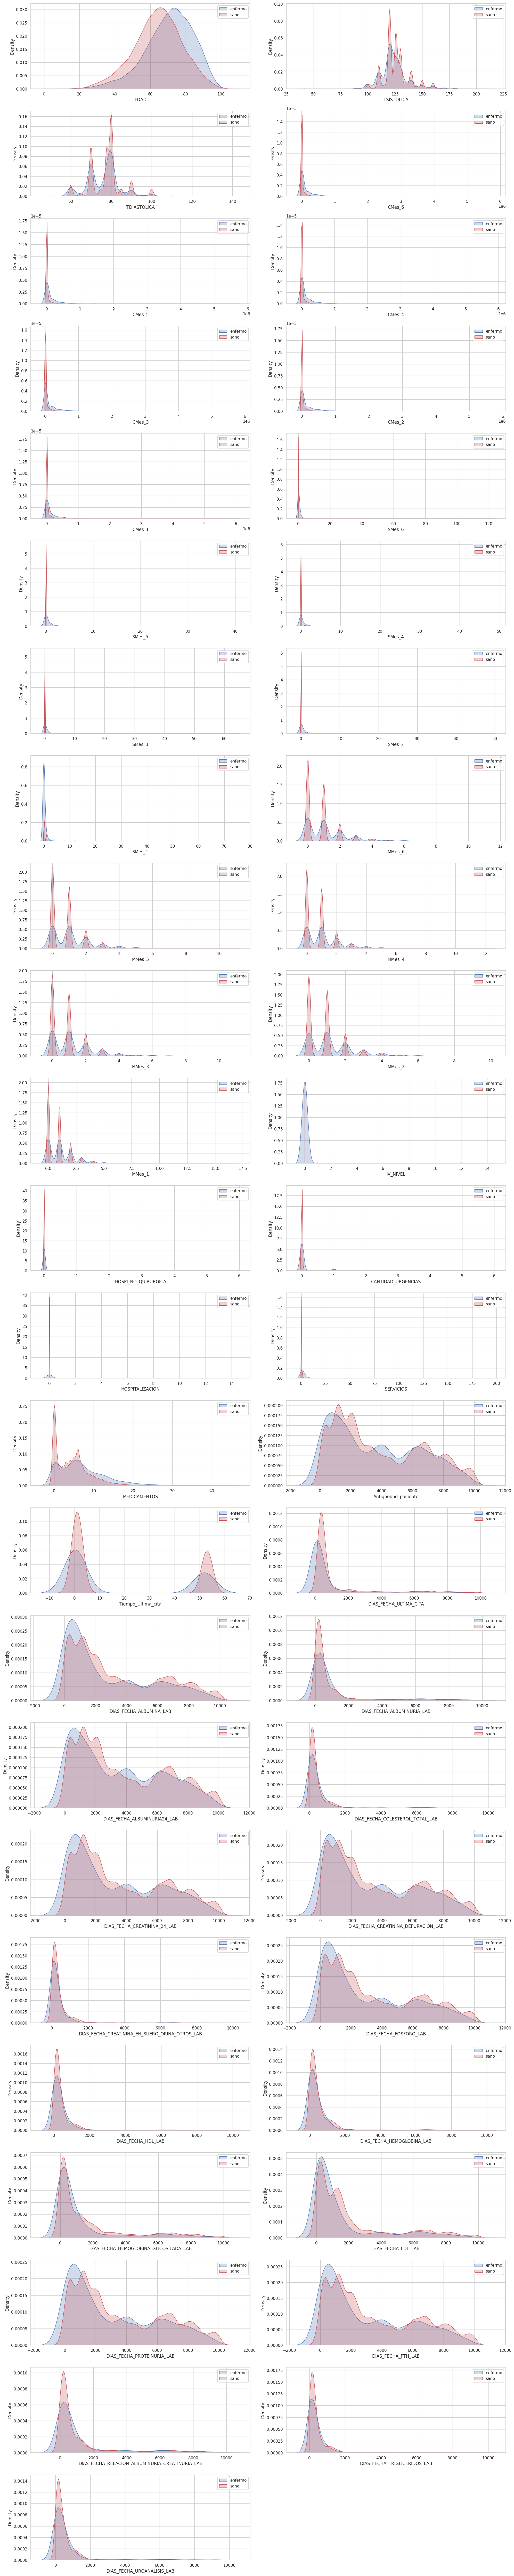

In [282]:
# Con el diagrama de densidad se puede observar aquellas variables independientes que mejor
# discriminan las clases de la variable objetivo

enfermo = train.loc[train.Target == '1']
sano = train.loc[train.Target == '0']

i = 1
fig = plt.figure(figsize=[20, 100])
columnas_numericas = train.select_dtypes(include=['int64', 'float64']).columns

for var_num in columnas_numericas:
    ax = fig.add_subplot(24, 2, i)
    sns.kdeplot(enfermo[var_num], shade=True, color="b", label="enfermo")
    sns.kdeplot(sano[var_num], shade=True, color="r", label="sano")
    plt.legend()
    i += 1

fig.tight_layout()

**Observamos que la variable que mejor distingue a ambos grupos es DIAS FECHA ULTIMA CITA, junto con la antiguedad del paciente y la edad. Estas variables son claves para definir si un paciente esta sano o enfermo**

## ANALISIS DE COMPONENTES PRINCIPALES

In [283]:
columnas_a_eliminar = ["EXFUMADOR", "FUMADOR"]

# Eliminar columnas que no generan valor
train = train.drop(columnas_a_eliminar, axis=1)

In [284]:
# Encuentra la categoría mayoritaria (la más común)
categoria_mayoritaria = train['TipoAfiliado'].mode()[0]

# Imputa los valores NaN con la categoría mayoritaria
train['TipoAfiliado'].fillna(categoria_mayoritaria, inplace=True)

In [285]:
var_numericas = train.select_dtypes('number').columns
var_numericas

Index(['EDAD', 'TSISTOLICA', 'TDIASTOLICA', 'CMes_6', 'CMes_5', 'CMes_4',
       'CMes_3', 'CMes_2', 'CMes_1', 'SMes_6', 'SMes_5', 'SMes_4', 'SMes_3',
       'SMes_2', 'SMes_1', 'MMes_6', 'MMes_5', 'MMes_4', 'MMes_3', 'MMes_2',
       'MMes_1', 'IV_NIVEL', 'HOSPI_NO_QUIRURGICA', 'CANTIDAD_URGENCIAS',
       'HOSPITALIZACION', 'SERVICIOS', 'MEDICAMENTOS', 'Antiguedad_paciente',
       'Tiempo_Ultima_cita', 'DIAS_FECHA_ULTIMA_CITA',
       'DIAS_FECHA_ALBUMINA_LAB', 'DIAS_FECHA_ALBUMINURIA_LAB',
       'DIAS_FECHA_ALBUMINURIA24_LAB', 'DIAS_FECHA_COLESTEROL_TOTAL_LAB',
       'DIAS_FECHA_CREATININA_24_LAB', 'DIAS_FECHA_CREATININA_DEPURACION_LAB',
       'DIAS_FECHA_CREATININA_EN_SUERO_ORINA_OTROS_LAB',
       'DIAS_FECHA_FOSFORO_LAB', 'DIAS_FECHA_HDL_LAB',
       'DIAS_FECHA_HEMOGLOBINA_LAB', 'DIAS_FECHA_HEMOGLOBINA_GLICOSILADA_LAB',
       'DIAS_FECHA_LDL_LAB', 'DIAS_FECHA_PROTEINURIA_LAB',
       'DIAS_FECHA_PTH_LAB', 'DIAS_FECHA_RELACION_ALBUMINURIA_CREATINURIA_LAB',
       'DIAS_FECHA

In [286]:
missing_values = train.isna().sum()
missing_columns = missing_values[missing_values > 0]
print(missing_columns)

Series([], dtype: int64)


In [287]:
df1=train.copy()

In [288]:
var_numericas = df1.select_dtypes('number').columns

In [289]:
from sklearn import preprocessing
X_std = preprocessing.scale(df1[var_numericas])

In [290]:
i=0
for var in var_numericas:
    print("{}: {}, {}".format(var, np.mean(X_std[:,i]), np.std(X_std[:,i])))
    i+=1

EDAD: 1.3697909603451365e-16, 1.0
TSISTOLICA: 1.8284411847102005e-15, 0.9999999999999999
TDIASTOLICA: 2.4789863312806415e-15, 1.0
CMes_6: -1.5597982286432377e-17, 0.9999999999999999
CMes_5: -2.8861234740182204e-17, 0.9999999999999998
CMes_4: -4.9675102823033055e-18, 1.0
CMes_3: -9.835670358960544e-18, 1.0000000000000002
CMes_2: 1.5299931669494182e-17, 1.0
CMes_1: -1.351162796786499e-17, 0.9999999999999999
SMes_6: -4.768809871011173e-18, 1.0
SMes_5: -1.4207079407387454e-17, 1.0
SMes_4: 1.122657323800547e-17, 1.0
SMes_3: -6.755813983932495e-18, 0.9999999999999999
SMes_2: 8.742818096853818e-18, 0.9999999999999999
SMes_1: -2.0565492568735683e-17, 0.9999999999999998
MMes_6: 9.070673775485836e-17, 0.9999999999999999
MMes_5: 4.172708637134776e-18, 1.0
MMes_4: 4.7091997476235333e-17, 1.0000000000000002
MMes_3: 2.2850547298595205e-17, 0.9999999999999999
MMes_2: -5.007250364561732e-17, 0.9999999999999999
MMes_1: 4.13296855487635e-17, 1.0
IV_NIVEL: -1.680260352989093e-17, 1.0
HOSPI_NO_QUIRURGICA:

In [291]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_std)

PCA()

In [292]:
pca.components_

array([[-2.27414221e-03,  2.64280610e-03,  3.88138338e-03, ...,
         2.08477819e-01,  2.01156774e-01,  1.94895168e-01],
       [ 8.37728447e-02, -4.44788249e-02, -5.08719421e-02, ...,
        -8.94672668e-02, -1.55745172e-01, -1.31290275e-01],
       [ 6.82483227e-02, -3.89546352e-03, -1.81033382e-02, ...,
         1.05652715e-01,  2.07874908e-01,  1.72249613e-01],
       ...,
       [-7.79894258e-05,  5.35527318e-05, -3.32873296e-05, ...,
         5.42746221e-05, -4.99274655e-05,  8.62794068e-05],
       [-1.65692996e-16,  5.83619133e-18, -1.94452806e-17, ...,
        -1.73472348e-16,  1.94289029e-16, -2.08166817e-17],
       [ 0.00000000e+00, -2.25514052e-17, -1.00908576e-16, ...,
        -1.94289029e-16, -8.32667268e-16,  1.11022302e-16]])

In [293]:
var_exp=pca.explained_variance_ratio_ # varianza explicada por cada PC
cum_var_exp = np.cumsum(var_exp) # varianza acumulada por los primeros n PCs
var_exp

array([2.01332691e-01, 1.37479559e-01, 8.84810242e-02, 6.78660383e-02,
       4.71233199e-02, 3.37944358e-02, 2.91731353e-02, 2.74277725e-02,
       2.68123101e-02, 2.22349631e-02, 2.10414543e-02, 2.07003300e-02,
       1.98713117e-02, 1.93131652e-02, 1.87861387e-02, 1.82925776e-02,
       1.73496356e-02, 1.46209119e-02, 1.35311338e-02, 1.28930978e-02,
       1.25654953e-02, 1.23933648e-02, 1.10340821e-02, 1.02737174e-02,
       9.75201409e-03, 9.59256627e-03, 9.36023597e-03, 8.50898008e-03,
       7.95780976e-03, 7.63329659e-03, 6.69222268e-03, 5.89803648e-03,
       5.40159511e-03, 4.87630364e-03, 4.54785409e-03, 3.61439901e-03,
       3.32823253e-03, 2.92546195e-03, 2.03567281e-03, 1.29739382e-03,
       7.84908993e-04, 6.77249459e-04, 5.53152524e-04, 1.37969725e-04,
       3.29788422e-05, 3.97058722e-32, 1.84571396e-33])

In [294]:
X_PCA = pca.transform(X_std)

In [295]:
X_PCA.shape

(143038, 47)

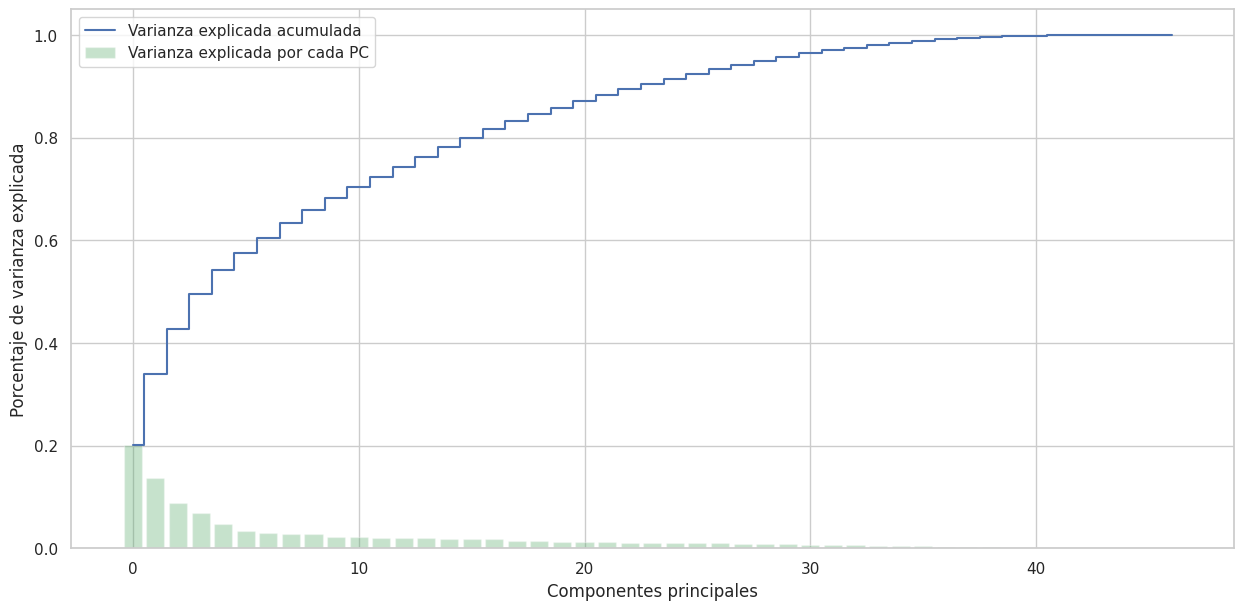

In [296]:
plt.figure(figsize=(15, 7))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3333, align='center', label='Varianza explicada por cada PC', color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='Varianza explicada acumulada')
plt.ylabel('Porcentaje de varianza explicada')
plt.xlabel('Componentes principales')
plt.legend(loc='best')
plt.show()

In [297]:
np.sum(pca.explained_variance_ratio_[0:2])

0.3388122500995385

In [298]:
np.sum(pca.explained_variance_ratio_[0:19])

0.8452319081842745

In [299]:
X_PCA.shape

(143038, 47)

In [300]:
df_pca1 = pd.concat([ pd.DataFrame(X_PCA[:,0:19]), df1['Target'].reset_index(drop=True)], axis = 1)
df_pca1.head()

0         1         2         3         4         5         6  \
0 -2.729293 -3.098958 -0.547993  1.146659  0.301217  3.196181 -0.687978   
1  4.287413  0.350454 -0.631704  0.280085  0.130941  1.061063 -1.127131   
2 -2.751276 -0.558630 -0.357656 -0.187406 -0.259273 -0.178863  0.524839   
3  0.156506 -0.284965 -1.057690  0.734873 -0.009197  0.716830  0.871763   
4  3.977146  0.666374 -0.987642  0.832868  0.121593  0.320490 -0.145865   

          7         8         9        10        11        12        13  \
0  0.718285 -0.079848  0.328013  0.775075 -1.353434  0.144118 -0.161429   
1  1.815372 -0.500109 -0.024154  0.253992 -0.320901 -0.481762  0.734764   
2 -0.367932 -0.010908  0.098988  0.100538 -0.105607  0.091117 -0.105124   
3 -0.699036  0.102339 -0.441318 -0.804039  0.842733 -0.282501  0.319958   
4 -0.047567 -0.139772 -0.412621 -1.119682  1.537343  0.867402 -2.282732   

         14        15        16        17        18 Target  
0  0.145879  0.239152  0.064983 -0.087173 -0.027855      0  
1 -0.430934 -0.577269 -0.115712  0.442770  0.360241      0  
2  0.051689  0.122164 -0.011000  0.091323 -0.119200      0  
3 -0.405614 -0.381934  0.417486  0.578599  0.103404      0  
4  1.452338  1.743167 -0.523122  1.599619  0.280521      0

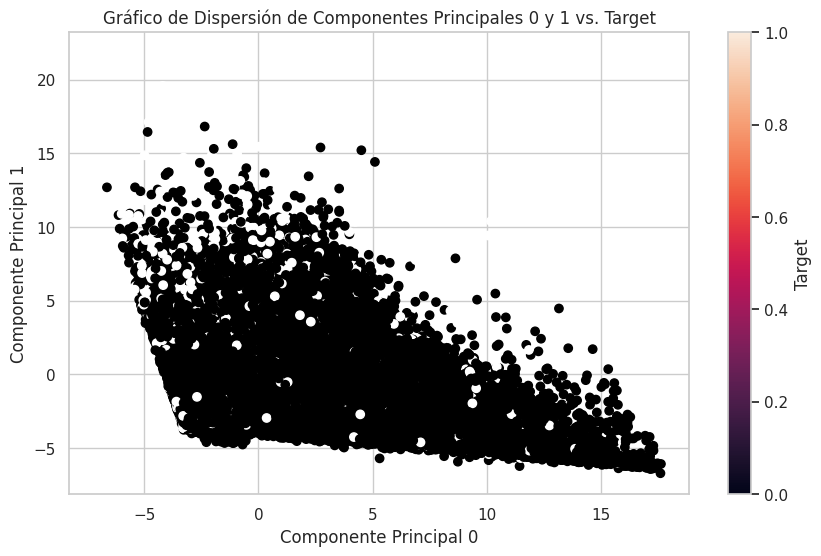

In [301]:
# Uso de la función para crear un gráfico de dispersión
scatter_plot_pca(df_pca1, 0, 1, 'Target')


Esta grafica nos permita observar que el componente 0 y el componente 1 no diferencias nuestars clases efectivamente.

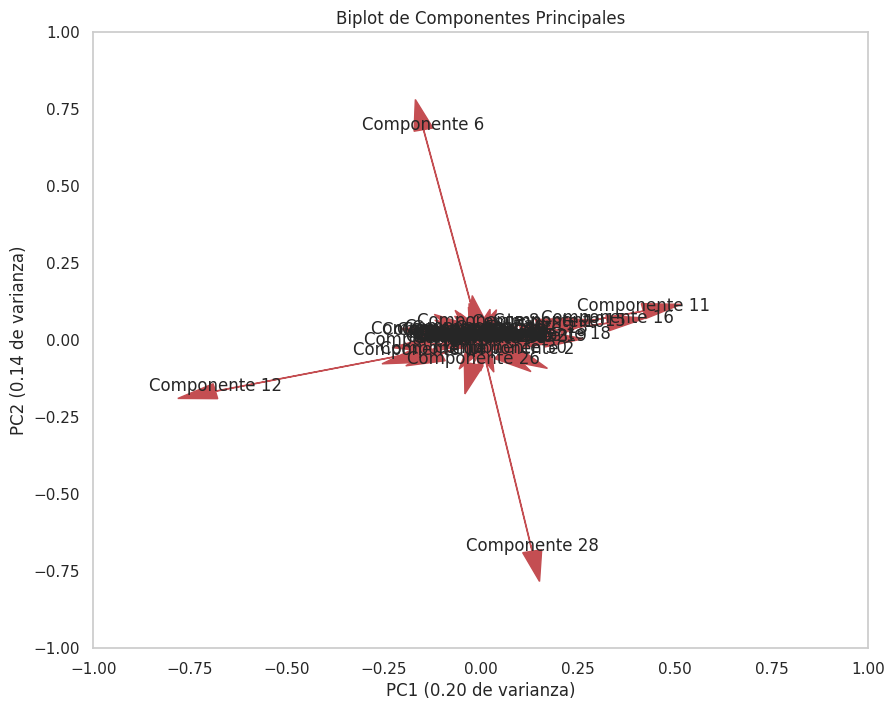

In [302]:
# Uso de la función para crear un Biplot
biplot_pca(pca, df1[var_numericas])  # Asume que las etiquetas son los nombres de las variables originales

In [303]:
print('Componente 6')
print(var_numericas[5])
print('componente 11')
print(var_numericas[10])
print('Componente 13')
print(var_numericas[12])
print('Componente 29')
print(var_numericas[28])

Componente 6
CMes_4
componente 11
SMes_5
Componente 13
SMes_3
Componente 29
Tiempo_Ultima_cita


Se evidencia que el componente 1 se ve mayoritariamente afectado por la antiguedad del paciente, CMes_4, SMes_5, Smes_3,

## Seleccion de variables

In [305]:
# Ruta al archivo df_train.parquet
ruta_df_train = '/content/df_train.parquet'

# Cargar el DataFrame desde el archivo
train = pd.read_parquet(ruta_df_train, engine='pyarrow')

In [306]:
# Llamamos a la funcion para realizar el procesamiento de datos
train = convertir_tipos_de_datos(train)

In [307]:
columnas_numericas=train.select_dtypes(include=['int64', 'float64']).columns

## Probamos seleccion de variables con Lasso

In [308]:
## DIVIDIMOS LA MUESTRA
X, X_test, y, y_test = train_test_split(train.drop(columns="Target"), train["Target"], test_size=0.3, random_state=42, stratify=train["Target"])

In [309]:
df2 = pd.concat([X,y], axis=1)
## Realizamos imputacion por la media para efectos de realizar una prueba con varios modelos y la seleccion de variables
df2=impute_mean(df2, 'TSISTOLICA')
df2=impute_mean(df2, 'TDIASTOLICA')

In [310]:
X_train, y_train = df2.drop(columns="Target"), df2["Target"]

In [311]:
X_train, X_test, y_train, y_test= train_test_split(df2.drop(columns="Target"), df2["Target"], test_size=0.3, random_state=42, stratify=df2["Target"])

In [312]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

best_alpha = None
best_rmse = float('inf')
alphas = np.linspace(0.01, 1.0, 100)
X_train_numeric = X_train.select_dtypes(include=['number'])
X_test_numeric=X_test.select_dtypes(include=['number'])
for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train_numeric, y_train)  # Ajusta el modelo con el valor de alpha actual
    y_pred = lasso_model.predict(X_test_numeric)  # Realiza predicciones en el conjunto de validación
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Calcula la métrica de rendimiento (por ejemplo, RMSE)

    # Si el rendimiento con el valor de alpha actual es mejor que el mejor rendimiento anterior, actualiza los valores "best"
    if rmse < best_rmse:
        best_alpha = alpha
        best_rmse = rmse

In [313]:
lasso_final = Lasso(alpha=best_alpha)
lasso_final.fit(X_train_numeric, y_train)

Lasso(alpha=0.01)

In [314]:
lasso_coefs = lasso_final.coef_
selected_features = X_train_numeric.columns[lasso_coefs != 0]

In [315]:
print("Características seleccionadas:")
print(selected_features)

Características seleccionadas:
Index(['EDAD', 'TSISTOLICA', 'TDIASTOLICA', 'CMes_6', 'CMes_5', 'CMes_4',
       'CMes_3', 'CMes_2', 'CMes_1', 'SERVICIOS', 'MEDICAMENTOS',
       'Antiguedad_paciente', 'Tiempo_Ultima_cita', 'DIAS_FECHA_ULTIMA_CITA',
       'DIAS_FECHA_ALBUMINA_LAB', 'DIAS_FECHA_ALBUMINURIA_LAB',
       'DIAS_FECHA_ALBUMINURIA24_LAB', 'DIAS_FECHA_COLESTEROL_TOTAL_LAB',
       'DIAS_FECHA_CREATININA_24_LAB', 'DIAS_FECHA_CREATININA_DEPURACION_LAB',
       'DIAS_FECHA_CREATININA_EN_SUERO_ORINA_OTROS_LAB',
       'DIAS_FECHA_FOSFORO_LAB', 'DIAS_FECHA_HDL_LAB',
       'DIAS_FECHA_HEMOGLOBINA_LAB', 'DIAS_FECHA_HEMOGLOBINA_GLICOSILADA_LAB',
       'DIAS_FECHA_LDL_LAB', 'DIAS_FECHA_PROTEINURIA_LAB',
       'DIAS_FECHA_PTH_LAB', 'DIAS_FECHA_RELACION_ALBUMINURIA_CREATINURIA_LAB',
       'DIAS_FECHA_TRIGLICERIDOS_LAB', 'DIAS_FECHA_UROANALISIS_LAB'],
      dtype='object')


## Prueba basica de varios modelos



In [316]:
## DIVIDIMOS LA MUESTRA
X, X_test, y, y_test = train_test_split(train.drop(columns="Target"), train["Target"], test_size=0.3, random_state=42, stratify=train["Target"])

In [317]:
df2 = pd.concat([X,y], axis=1)
## Realizamos imputacion por la media para efectos de realizar una prueba con varios modelos y la seleccion de variables
df2=impute_mean(df2, 'TSISTOLICA')
df2=impute_mean(df2, 'TDIASTOLICA')

In [318]:
X_train, y_train = df2.drop(columns="Target"), df2["Target"]

In [319]:
# Verificar si hay nombres de columnas duplicados
duplicated_columns = X_train.columns[X_train.columns.duplicated()]
if len(duplicated_columns) > 0:
    print("Columnas duplicadas encontradas:")
    print(duplicated_columns)
else:
    print("No se encontraron columnas duplicadas en X_train.")

No se encontraron columnas duplicadas en X_train.


In [320]:
X_train[selected_features].columns

Index(['EDAD', 'TSISTOLICA', 'TDIASTOLICA', 'CMes_6', 'CMes_5', 'CMes_4',
       'CMes_3', 'CMes_2', 'CMes_1', 'SERVICIOS', 'MEDICAMENTOS',
       'Antiguedad_paciente', 'Tiempo_Ultima_cita', 'DIAS_FECHA_ULTIMA_CITA',
       'DIAS_FECHA_ALBUMINA_LAB', 'DIAS_FECHA_ALBUMINURIA_LAB',
       'DIAS_FECHA_ALBUMINURIA24_LAB', 'DIAS_FECHA_COLESTEROL_TOTAL_LAB',
       'DIAS_FECHA_CREATININA_24_LAB', 'DIAS_FECHA_CREATININA_DEPURACION_LAB',
       'DIAS_FECHA_CREATININA_EN_SUERO_ORINA_OTROS_LAB',
       'DIAS_FECHA_FOSFORO_LAB', 'DIAS_FECHA_HDL_LAB',
       'DIAS_FECHA_HEMOGLOBINA_LAB', 'DIAS_FECHA_HEMOGLOBINA_GLICOSILADA_LAB',
       'DIAS_FECHA_LDL_LAB', 'DIAS_FECHA_PROTEINURIA_LAB',
       'DIAS_FECHA_PTH_LAB', 'DIAS_FECHA_RELACION_ALBUMINURIA_CREATINURIA_LAB',
       'DIAS_FECHA_TRIGLICERIDOS_LAB', 'DIAS_FECHA_UROANALISIS_LAB'],
      dtype='object')

In [321]:
# 1. seleccionar columnas categóricas
var_categoricas = ['ESTADO_CIVIL', 'GRUPO_ETAREO', 'TipoAfiliado','GENERO', 'Estrato', 'ANTIHIPERTENSIVOS',
       'AEI', 'CANCER_MAMA_FAMILIAR', 'CANCER_OTRO_SITIO_FAMILIAR',
       'HIPERTENSION_FAMILIAR', 'DIABETES_FAMILIAR', 'CORONARIOS_FAMILIAR',
       'CEREBRAL_FAMILIAR', 'ENFERMEDAD_RENAL_FAMILIAR', 'grupo_riesgos']

# 2. Dummificar las columnas categóricas
X_train_dummies = pd.get_dummies(X_train[var_categoricas], drop_first=True)

# 3. Eliminar las columnas originales
X_train = X_train.drop(var_categoricas, axis=1)

# 4. Concatenar las nuevas columnas dummificadas con X_train
X_train = pd.concat([X_train[selected_features], X_train_dummies], axis=1)

RF: 0.812711 (0.002665)
XGB: 0.917815 (0.006569)
GBM: 0.915998 (0.004421)
AdaBoost: 0.902742 (0.006192)
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2058, number of negative: 64692
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012832 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7060
[LightGBM] [Info] Number of data points in the train set: 66750, number of used features: 60
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.030831 -> initscore=-3.447903
[LightGBM] [Info] Start training from score -3.447903
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2091, number of negative: 64660
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012897 seconds.

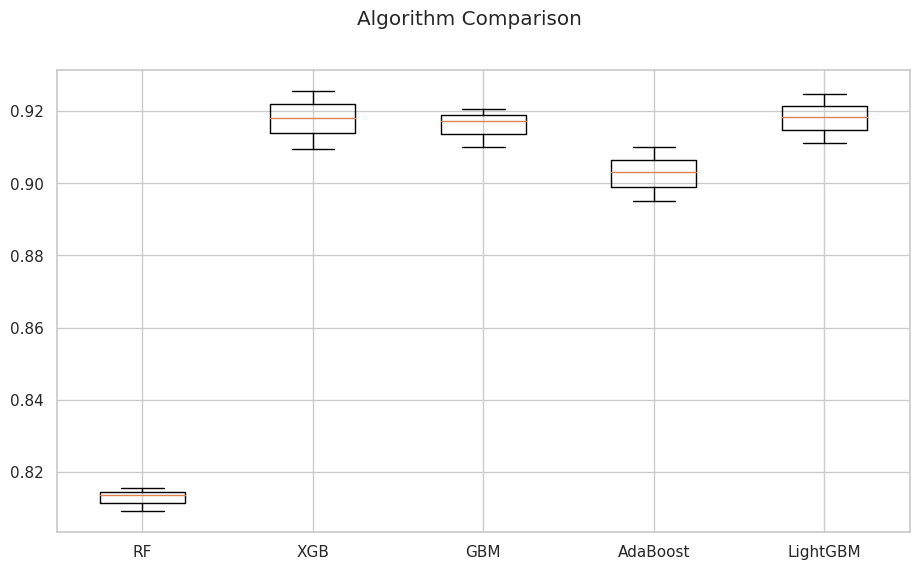

In [322]:
## probamos con varios modelos de emsamble para ver cuales dan mejores metricas
# to feed the random state
seed = 1234

# prepare models
models = []
models.append(('RF', RandomForestClassifier()))
models.append(('XGB', XGBClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('AdaBoost', AdaBoostClassifier()))
models.append(('LightGBM', lgb.LGBMClassifier()))

# evaluate each model in turn
results = []
names = []
scoring = make_scorer(cohen_kappa_score)


for name, model in models:
        kfold = KFold(n_splits=3, shuffle=True, random_state=seed)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

# boxplot algorithm comparison
fig = plt.figure(figsize=(11,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Vemos que los mejores modelos son XGB y GBM. Utilizando seleccion de variables

## Realizamos seleccion de variables  con Random_Forest

In [323]:
def feature_selection_random_forest(X_train, y_train, threshold, model_params, numeric_columns=None, categorical_columns=None):
    X_train_numeric = X_train[numeric_columns]
    X_train_categorical = pd.get_dummies(X_train[categorical_columns], drop_first=True)
    X = pd.concat([X_train_numeric, X_train_categorical], axis=1)

    # Inicializar el modelo Random Forest con los hiperparámetros
    rf_model = RandomForestClassifier(**model_params)

    # Utilizar SelectFromModel para seleccionar características importantes
    selector = SelectFromModel(estimator=rf_model, threshold=threshold)
    X_selected = selector.fit_transform(X, y_train)

    selected_feature_indices = np.where(selector.get_support())[0]
    best_features = X.columns[selected_feature_indices].tolist()

    return best_features


In [324]:
model_params = {
    'n_estimators': 100,
    'max_depth': None,  # Ajusta según tus necesidades
    'random_state': 1323,  # Define un valor específico para random_state
}

X_train, y_train = df2.drop(columns="Target"), df2["Target"]

var_categoricas = ['ESTADO_CIVIL', 'GRUPO_ETAREO', 'TipoAfiliado','GENERO', 'Estrato', 'ANTIHIPERTENSIVOS',
'AEI', 'CANCER_MAMA_FAMILIAR', 'CANCER_OTRO_SITIO_FAMILIAR',
'HIPERTENSION_FAMILIAR', 'DIABETES_FAMILIAR', 'CORONARIOS_FAMILIAR',
'CEREBRAL_FAMILIAR', 'ENFERMEDAD_RENAL_FAMILIAR', 'grupo_riesgos']
var_numericas = X_train.select_dtypes('number').columns

best_features= feature_selection_random_forest(
    X_train=X_train,
    y_train=y_train,
    threshold=0.001,
    model_params=model_params,
    numeric_columns=var_numericas,
    categorical_columns=var_categoricas
)
best_features

['EDAD',
 'TSISTOLICA',
 'TDIASTOLICA',
 'CMes_6',
 'CMes_5',
 'CMes_4',
 'CMes_3',
 'CMes_2',
 'CMes_1',
 'SMes_6',
 'SMes_5',
 'SMes_4',
 'SMes_3',
 'SMes_2',
 'SMes_1',
 'MMes_6',
 'MMes_5',
 'MMes_4',
 'MMes_3',
 'MMes_2',
 'MMes_1',
 'IV_NIVEL',
 'CANTIDAD_URGENCIAS',
 'HOSPITALIZACION',
 'SERVICIOS',
 'MEDICAMENTOS',
 'Antiguedad_paciente',
 'Tiempo_Ultima_cita',
 'DIAS_FECHA_ULTIMA_CITA',
 'DIAS_FECHA_ALBUMINA_LAB',
 'DIAS_FECHA_ALBUMINURIA_LAB',
 'DIAS_FECHA_ALBUMINURIA24_LAB',
 'DIAS_FECHA_COLESTEROL_TOTAL_LAB',
 'DIAS_FECHA_CREATININA_24_LAB',
 'DIAS_FECHA_CREATININA_DEPURACION_LAB',
 'DIAS_FECHA_CREATININA_EN_SUERO_ORINA_OTROS_LAB',
 'DIAS_FECHA_FOSFORO_LAB',
 'DIAS_FECHA_HDL_LAB',
 'DIAS_FECHA_HEMOGLOBINA_LAB',
 'DIAS_FECHA_HEMOGLOBINA_GLICOSILADA_LAB',
 'DIAS_FECHA_LDL_LAB',
 'DIAS_FECHA_PROTEINURIA_LAB',
 'DIAS_FECHA_PTH_LAB',
 'DIAS_FECHA_RELACION_ALBUMINURIA_CREATINURIA_LAB',
 'DIAS_FECHA_TRIGLICERIDOS_LAB',
 'DIAS_FECHA_UROANALISIS_LAB',
 'ESTADO_CIVIL_SO',
 'ESTADO_CI

In [325]:
len(best_features)

61

In [326]:
# 1. seleccionar columnas categóricas
X_train, y_train = df2.drop(columns="Target"), df2["Target"]
var_categoricas = ['ESTADO_CIVIL', 'GRUPO_ETAREO', 'TipoAfiliado','GENERO', 'Estrato', 'ANTIHIPERTENSIVOS',
       'AEI', 'CANCER_MAMA_FAMILIAR', 'CANCER_OTRO_SITIO_FAMILIAR',
       'HIPERTENSION_FAMILIAR', 'DIABETES_FAMILIAR', 'CORONARIOS_FAMILIAR',
       'CEREBRAL_FAMILIAR', 'ENFERMEDAD_RENAL_FAMILIAR', 'grupo_riesgos']

# 2. Dummificar las columnas categóricas
X_train_dummies = pd.get_dummies(X_train[var_categoricas], drop_first=True)

# 3. Eliminar las columnas originales
X_train = X_train.drop(var_categoricas, axis=1)

# 4. Concatenar las nuevas columnas dummificadas con X_train
X_train = pd.concat([X_train, X_train_dummies], axis=1)

X_train =X_train[best_features]

RF: 0.834545 (0.011678)
XGB: 0.915908 (0.005770)
GBM: 0.916921 (0.004315)
AdaBoost: 0.903308 (0.006018)
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2058, number of negative: 64692
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014869 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7247
[LightGBM] [Info] Number of data points in the train set: 66750, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.030831 -> initscore=-3.447903
[LightGBM] [Info] Start training from score -3.447903
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2091, number of negative: 64660
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017761 seconds.

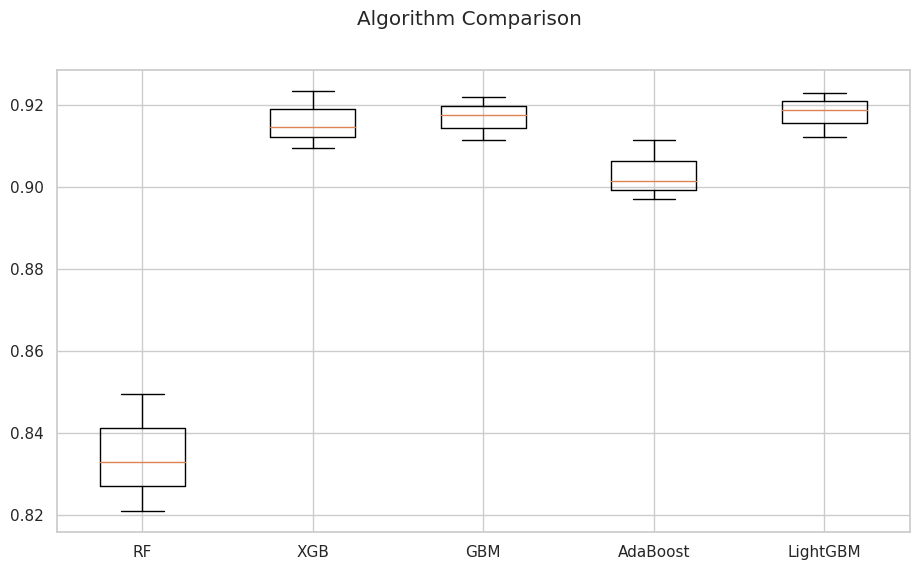

In [327]:
## probamos con varios modelos de ensamble para ver cuales dan mejores metricas
# to feed the random state
seed = 1234

# prepare models
models = []
models.append(('RF', RandomForestClassifier()))
models.append(('XGB', XGBClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('AdaBoost', AdaBoostClassifier()))
models.append(('LightGBM', lgb.LGBMClassifier()))

# evaluate each model in turn
results = []
names = []
scoring = make_scorer(cohen_kappa_score)


for name, model in models:
        kfold = KFold(n_splits=3, shuffle=True, random_state=seed)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

# boxplot algorithm comparison
fig = plt.figure(figsize=(11,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Vemos que con ambas formas de escoger caracteristicias tenemos resultados similares, se decide utilizar select model en el pipeline por que puede escoger variables categoricas y numericas

# Calibración y selección de modelo

#(No correr, tarda varias horas en ejecutar)

## SVM

In [328]:
# Ruta al archivo df_train.parquet
ruta_df_train = '/content/df_train.parquet'

# Cargar el DataFrame desde el archivo
train = pd.read_parquet(ruta_df_train, engine='pyarrow')

In [329]:
# Llamamos a la funcion para realizar el procesamiento de datos
train = convertir_tipos_de_datos(train)

In [330]:
## DIVIDIMOS LA MUESTRA
X, X_val, y, y_val = train_test_split(train.drop(columns="Target"), train["Target"], test_size=0.5, random_state=42, stratify=train["Target"])

In [331]:
df2 = pd.concat([X,y], axis=1)

In [332]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [333]:
# Imputa NaN por la media en las columnas numéricas
var_numericas = X_train.select_dtypes('number').columns
imputer = SimpleImputer(strategy='mean')
X_train[var_numericas] = imputer.fit_transform(X_train[var_numericas])

# Realiza la codificación one-hot de las columnas categóricas
var_categoricas = ['ESTADO_CIVIL', 'GRUPO_ETAREO', 'TipoAfiliado', 'GENERO', 'Estrato', 'ANTIHIPERTENSIVOS',
                   'AEI', 'CANCER_MAMA_FAMILIAR', 'CANCER_OTRO_SITIO_FAMILIAR',
                   'HIPERTENSION_FAMILIAR', 'DIABETES_FAMILIAR', 'CORONARIOS_FAMILIAR',
                   'CEREBRAL_FAMILIAR', 'ENFERMEDAD_RENAL_FAMILIAR', 'grupo_riesgos']
X_train_categorical = pd.get_dummies(X_train[var_categoricas], drop_first=True)

# Concatena las columnas numéricas imputadas y las columnas categóricas codificadas
X = pd.concat([X_train[var_numericas], X_train_categorical], axis=1)

# Inicializa el modelo Random Forest con los hiperparámetros
rf_model = RandomForestClassifier()

# Utiliza SelectFromModel para seleccionar características importantes
selector = SelectFromModel(estimator=rf_model, threshold=0.01)
X_selected = selector.fit_transform(X, y_train)

# Obtiene los índices de las características seleccionadas
selected_feature_indices = np.where(selector.get_support())[0]

# Obtiene las columnas seleccionadas
selected_features = X.columns[selected_feature_indices]


In [ ]:
# Define la función objetivo que deseas optimizar
def objetivo_svc(num_pca, svm_c, kernel_SVC, svm_rbf_gamma):
    num_pca = int(round(num_pca))
    if kernel_SVC <= 0.2:
        kernel = 'linear'
    elif kernel_SVC <= 0.4:
        kernel = 'poly'
    elif kernel_SVC <= 0.6:
        kernel = 'rbf'
    elif kernel_SVC <= 0.8:
        kernel = 'sigmoid'
    else:
        kernel = 'precomputed'
    steps = [('STD', StandardScaler()),
             ('PCA', PCA(n_components=num_pca)),
             ("SVM_rbf", SVC(kernel=kernel, probability=True, C=svm_c, gamma=svm_rbf_gamma))]
    pipeline = Pipeline(steps)
    pipeline.fit(X[selected_features], y_train)

    score = pipeline.score(X_test[selected_features], y_test)
    return score

In [ ]:
# Define los límites para los hiperparámetros
pbounds = {'num_pca': (1, 10),  # Límite para num_pca
           'svm_c': (0.01, 100),  # Límite para svm_c
           'kernel_SVC': (0, 1),  # Límite para kernel_SVC (0-1)
           'svm_rbf_gamma': (1e-6, 1e+1)  # Límite para svm_rbf_gamma
          }

# Configura la semilla aleatoria
np.random.seed(42)

# Crea una instancia del optimizador BayesianOptimization
optimizer = BayesianOptimization(
    f=objetivo_svc,
    pbounds=pbounds,
    random_state=1,  # Semilla aleatoria para reproducibilidad
    verbose=2  # Detalles de registro
)

# Realiza la optimización bayesiana
optimizer.maximize(init_points=5, n_iter=3)

# Obtiene los mejores hiperparámetros y el mejor puntaje
best_params = optimizer.max['params']
best_score = optimizer.max['target']

print("Mejores hiperparámetros encontrados:")
print(best_params)
print(f"Mejor puntaje encontrado: {best_score}")


|   iter    |  target   | kernel... |  num_pca  |   svm_c   | svm_rb... |
-------------------------------------------------------------------------
| 1         | 0.9699    | 0.417     | 7.483     | 0.02144   | 3.023     |


In [ ]:
score=objetivo_svc(num_pca=5, svm_c=0.02144, kernel_SVC=0.417 , svm_rbf_gamma=3.023)

0.9702181208053692

In [ ]:
%%time
optimizer.maximize(
    init_points=5,
    n_iter=10,
)

|   iter    |  target   |  kernels  |  num_pca  |   svm_c   | svm_rb... |
-------------------------------------------------------------------------
Evaluando (pca=8, solver=poly): 0.9704977628635347
| 1         | 0.9705    | 1.668     | 7.763     | 0.001114  | 0.03093   |
Evaluando (pca=3, solver=linear): 0.9702181208053692
| 2         | 0.9702    | 0.587     | 2.739     | 0.1871    | 0.03521   |


Este modelo nos entrega un muy buen score en la primera iteración. realizamos otras dos iteraciones que nos entregan resultados similares. aunque el modelo nos brinda un buen resultado, este tardo mucho tiempo en correr lo cual nos indica que el modelo requeire mucho poder de computo.

## NN

In [ ]:
# Ruta al archivo df_train.parquet
ruta_df_train = '/content/df_train.parquet'

# Cargar el DataFrame desde el archivo
train = pd.read_parquet(ruta_df_train, engine='pyarrow')

In [ ]:
# Llamamos a la funcion para realizar el procesamiento de datos
train = convertir_tipos_de_datos(train)

In [ ]:
X, X_test, y, y_test = train_test_split(train.drop(columns="Target"), train["Target"], test_size=0.3, random_state=42, stratify=train["Target"])

In [ ]:
df2 = pd.concat([X,y], axis=1)

In [ ]:
X_train, y_train = df2.drop(columns="Target"), df2["Target"]

In [ ]:
var_categoricas = ['ESTADO_CIVIL', 'GRUPO_ETAREO', 'TipoAfiliado','GENERO', 'Estrato', 'ANTIHIPERTENSIVOS',
       'AEI', 'CANCER_MAMA_FAMILIAR', 'CANCER_OTRO_SITIO_FAMILIAR',
       'HIPERTENSION_FAMILIAR', 'DIABETES_FAMILIAR', 'CORONARIOS_FAMILIAR',
       'CEREBRAL_FAMILIAR', 'ENFERMEDAD_RENAL_FAMILIAR', 'grupo_riesgos']
var_numericas = X_train.select_dtypes('number').columns

In [ ]:
data = collections.defaultdict(list)

def train_and_evaluate(
    # Muestreo
    alpha,

    # Data
    scaler_choice,
    imputer_strategy,

    #selector de variables
    pca_components,
    threshold,

    #Modelo NN
    model_solver,
    model_hidden_layer_size_exp, #controla el número de neuronas y de capas
    model_lr_init, #learning rate
    model_alpha,
    valor,
    model_batch_size,
    max_iter,
    verbose=0,

) -> float:
    ## EVALUA EL TIPO DE MUESTREO A UTILIZAR

    # Aplicar RandomUnderSampler
    if alpha <= 0.5:
      X_train, y_train = df2.drop(columns="Target"), df2["Target"]
      undersampler=RandomUnderSampler()
      X_train, y_train = undersampler.fit_resample(X_train, y_train)
      var_categoricas = ['ESTADO_CIVIL', 'GRUPO_ETAREO', 'TipoAfiliado','GENERO', 'Estrato', 'ANTIHIPERTENSIVOS',
      'AEI', 'CANCER_MAMA_FAMILIAR', 'CANCER_OTRO_SITIO_FAMILIAR',
      'HIPERTENSION_FAMILIAR', 'DIABETES_FAMILIAR', 'CORONARIOS_FAMILIAR',
      'CEREBRAL_FAMILIAR', 'ENFERMEDAD_RENAL_FAMILIAR', 'grupo_riesgos']
      var_numericas = X_train.select_dtypes('number').columns

    else:
      X_train, y_train = df2.drop(columns="Target"), df2["Target"]
      # Create a RandomOverSampler instance
      oversampler = RandomOverSampler(random_state=42)
      # Apply oversampling to balance the classes
      X_train, y_train = oversampler.fit_resample(X_train, y_train)
      var_categoricas = ['ESTADO_CIVIL', 'GRUPO_ETAREO', 'TipoAfiliado','GENERO', 'Estrato', 'ANTIHIPERTENSIVOS',
      'AEI', 'CANCER_MAMA_FAMILIAR', 'CANCER_OTRO_SITIO_FAMILIAR',
      'HIPERTENSION_FAMILIAR', 'DIABETES_FAMILIAR', 'CORONARIOS_FAMILIAR',
      'CEREBRAL_FAMILIAR', 'ENFERMEDAD_RENAL_FAMILIAR', 'grupo_riesgos']
      var_numericas = X_train.select_dtypes('number').columns


    ## Escalamiento e imputacion de valores
    scaler_cls = StandardScaler if scaler_choice > 0.5 else MinMaxScaler
    imputer_strategy = "mean" if imputer_strategy > 0.5 else "median"
    imputer = SimpleImputer(strategy=imputer_strategy)



    numeric_transformer = Pipeline(
        steps=[("imputer", imputer),
               ("scaler", scaler_cls()),
               ("pca", PCA(n_components=int(pca_components))),
               ('lda', LinearDiscriminantAnalysis(n_components=1)),
              ]
    )

    categorical_transformer = OneHotEncoder(handle_unknown="ignore")
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numeric_transformer, var_numericas),
            ("cat", categorical_transformer, var_categoricas),
        ]
    )

    model1 = RandomForestClassifier(n_estimators=100)

    # Crea el pipeline completo que conecta todas las transformaciones
    data_pipeline = Pipeline(
        steps=[
            ("preprocessor", preprocessor),
            ('feature_selection', SelectFromModel(model1, threshold=threshold)),

        ]
    )
     ## Model configuration

    max_exponent = int(model_hidden_layer_size_exp)
    if max_exponent<2:
        max_exponent=2


    if valor < 0.2:
        funcion_activacion = 'logistic'
    elif valor < 0.4:
        funcion_activacion = 'relu'
    else:
        funcion_activacion = 'tanh'

    model_kwargs = dict(
        hidden_layer_sizes = [2**(n) for n in reversed(range(2, max_exponent+1))], ### Arquitectura
        solver="adam" if model_solver > 0.5 else "sgd",
        activation = funcion_activacion,
        batch_size=2**int(model_batch_size), ## Back Propagation
        learning_rate_init=model_lr_init,## Back Propagation
        alpha=model_alpha,## Back Propagation
        max_iter=int(max_iter),
        early_stopping=True,
        random_state=42,
    )

    if verbose:
        print("MLP Classifier params: ")
        pprint(model_kwargs)

    model = MLPClassifier(**model_kwargs)

    pipeline = add_model(data_pipeline, model)
    show_live_plot=True

    ## Training protocol
    kf = KFold(n_splits=3, random_state=963, shuffle=True)

    train_fold_metrics = []
    val_fold_metrics = []

    # K-Fold cross val
    for i, (train_index, test_index) in enumerate(kf.split(X_train)):
        #print(f"Fold number: {i+1}")
        kX_train, kX_val = X_train.iloc[train_index], X_train.iloc[test_index]
        ky_train, ky_val = y_train.iloc[train_index], y_train.iloc[test_index]
        #print(f"Training with {kX_train.shape}")
        #print(f"Validating with {kX_val.shape}")
        pipeline.fit(kX_train, ky_train)

        val_preds = pipeline.predict_proba(kX_val)[:, 1]

        train_preds = pipeline.predict_proba(kX_train)[:, 1]

        ths = np.linspace(0, 1, 1000)
        best_th = ths[np.argmax([f1_score(ky_val, val_preds>th) for th in ths])]
        best_th

        val_f1 = f1_score(ky_val, val_preds>best_th)
        train_f1 = f1_score(ky_train, train_preds>best_th)

        train_fold_metrics.append(train_f1)
        val_fold_metrics.append(val_f1)

    f1_train = np.array(train_fold_metrics)
    f1_val = np.array(val_fold_metrics)

    adj_val_f1 = ( f1_val.mean() -  f1_val.std())
    adj_train_f1 = ( f1_train.mean() -  f1_train.std())
    objective = adj_val_f1 - abs(adj_val_f1 - adj_train_f1)

    print(f"Validation F1 adjusted score: {adj_val_f1}")
    print(f"Train F1 adjusted score: {adj_train_f1}")
    print()

    if show_live_plot:
        data['train_f1'].append(adj_train_f1)
        data['val_f1'].append(adj_val_f1)
        data["objective"].append(objective)
        live_plot(data)

    return pipeline, objective

def target_func(**kwargs):
    model, result = train_and_evaluate(**kwargs)
    return result

In [ ]:
pbounds = dict(
    # Data
    alpha=(0,1),
    scaler_choice=(0, 1),
    imputer_strategy=(0, 1),

    ## selector de variables
    pca_components=(15,X_train[var_numericas].shape[1]),
    threshold=(0.01,0.1),

    ## MODEL
    model_solver=(0, 1),
    model_hidden_layer_size_exp=(2, 10),
    model_lr_init=(0.005, 0.5),
    valor=(0,0.6),
    model_alpha=(0.001, 1),
    model_batch_size=(3, 7), # from 2**6=64 to 2**12=4096
    max_iter=(1, 2000),
)

optimizer = BayesianOptimization(
    f=target_func,
    pbounds=pbounds,
    random_state=963,
    verbose=2,
)

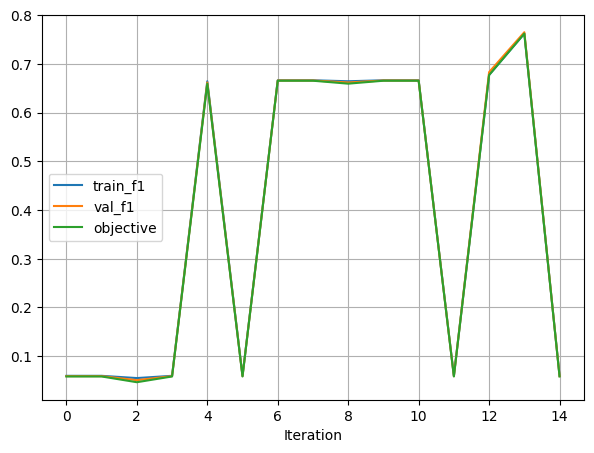

In [ ]:
logger = JSONLogger(path="./logs.json")
optimizer.subscribe(Events.OPTIMIZATION_STEP, logger)

optimizer.maximize(
    n_iter=30,
)

In [ ]:
optimizer.max

In [ ]:
params = {
    'alpha': 0.5678338818618014,
    'scaler_choice': 0.31671524528206507,
    'imputer_strategy': 0.4688235579140585,
    'pca_components': 40.646748802088155,
    'threshold': 0.025179161764133123,
    'model_solver': 0.9145808321368661,
    'model_hidden_layer_size_exp': 3.3680985606702576,
    'model_lr_init': 0.25736124739784993,
    'model_alpha': 0.016033063291066175,
    'valor': 0.299829346001159,
    'model_batch_size': 5.271589345366275,
    'max_iter': 1285.7096664165006,
}

best_model, best_result = train_and_evaluate(**params)


In [ ]:
test_preds = best_model.predict_proba(X_test)[:, 1]

In [ ]:
best_model.fit(X, y)

Pipeline(steps=[('data_pipeline',
                 Pipeline(steps=[('preprocessor',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('scaler',
                                                                                    StandardScaler()),
                                                                                   ('pca',
                                                                                    PCA(n_components=16)),
                                                                                   ('lda',
                                                                                    LinearDiscriminantAnalysis(n_components=1))]),
                                                                   Index(['TSISTOLICA', 'TDIASTOLICA', 'CMes_6', 'CMes_5', 'CMes_4', 'CMes_3',
       'CMes...
                                                                    'ENFERMEDAD_RENAL_FAMILIAR',
                                                                    'grupo_riesgos'])])),
                                 ('feature_selection',
                                  SelectFromModel(estimator=RandomForestClassifier(),
                                                  threshold=0.08399415021187095))])),
                ('model',
                 MLPClassifier(activation='logistic', alpha=0.9577067340333255,
                               batch_size=64, early_stopping=True,
                               hidden_layer_sizes=[4],
                               learning_rate_init=0.23986563604679215,
                               max_iter=1246, random_state=42, solver='sgd'))])

In [ ]:
test_preds = best_model.predict_proba(X_test)[:, 1]
train_preds = best_model.predict_proba(X_train)[:, 1]
ths = np.linspace(0, 1, 1000)
best_th = ths[np.argmax([f1_score(y_test, test_preds>th) for th in ths])]
best_th

0.0

In [ ]:
test_f1 = f1_score(y_test, test_preds>best_th)
train_f1 = f1_score(y_train, train_preds>best_th)
print(f"Train f1: {train_f1}")
print(f"Test f1: {test_f1}")

Train f1: 0.06026908957059969
Test f1: 0.060299236089138


In [ ]:
best_model, best_result = train_and_evaluate(**optimizer.max["params"])

In [ ]:
test_preds = best_model.predict_proba(X_test)[:, 1]

In [ ]:
best_model.fit(X, y)

In [ ]:
test_preds = best_model.predict_proba(X_test)[:, 1]
train_preds = best_model.predict_proba(X_train)[:, 1]
ths = np.linspace(0, 1, 1000)
best_th = ths[np.argmax([f1_score(y_test, test_preds>th) for th in ths])]
best_th

In [ ]:
test_f1 = f1_score(y_test, test_preds>best_th)
train_f1 = f1_score(y_train, train_preds>best_th)
print(f"Train f1: {train_f1}")
print(f"Test f1: {test_f1}")

La red neuronal no mostro buenos resultados en test incluso despues de haber utilizado optimizacion bayesianna. esto nos podria estar indicando que una red neuronal tradicional MLP no brindaria una solución sobresaliente.

## XGB

In [16]:
# Ruta al archivo df_train.parquet
ruta_df_train = '../../df_train.parquet'

# Cargar el DataFrame desde el archivo
train = pd.read_parquet(ruta_df_train, engine='pyarrow')

In [18]:
# Llamamos a la funcion para realizar el procesamiento de datos
train = convertir_tipos_de_datos(train)

In [21]:
X, X_test, y, y_test = train_test_split(train.drop(columns="Target"), train["Target"], test_size=0.3, random_state=42, stratify=train["Target"])

In [22]:
df2 = pd.concat([X,y], axis=1)

In [23]:
X_train, y_train = df2.drop(columns="Target"), df2["Target"]

In [ ]:
## con submuestreo

data = collections.defaultdict(list)

def train_and_evaluate(
    # Muestreo
    alpha,

    # Data
    scaler_choice,
    imputer_strategy,
    knn_imputer,
    knn_imputer_k,

    #selector de variables
    selector,
    variance_threshold,
    k_best,

    #Modelo XGB
    learning_rate,
    max_depth,
    min_child_weight,
    subsample,
    colsample_bytree

) -> float:
    ## EVALUA EL TIPO DE MUESTREO A UTILIZAR
    if alpha < 0.33:
      X_train, y_train = df2.drop(columns="Target"), df2["Target"]
      var_categoricas = ['ESTADO_CIVIL', 'GRUPO_ETAREO', 'TipoAfiliado','GENERO', 'Estrato', 'ANTIHIPERTENSIVOS',
      'AEI', 'CANCER_MAMA_FAMILIAR', 'CANCER_OTRO_SITIO_FAMILIAR',
      'HIPERTENSION_FAMILIAR', 'DIABETES_FAMILIAR', 'CORONARIOS_FAMILIAR',
      'CEREBRAL_FAMILIAR', 'ENFERMEDAD_RENAL_FAMILIAR', 'grupo_riesgos']
      var_numericas = X_train.select_dtypes('number').columns
    # Aplicar RandomUnderSampler
    elif alpha < 0.67:
      X_train, y_train = df2.drop(columns="Target"), df2["Target"]
      undersampler=RandomUnderSampler()
      X_train, y_train = undersampler.fit_resample(X_train, y_train)
      var_categoricas = ['ESTADO_CIVIL', 'GRUPO_ETAREO', 'TipoAfiliado','GENERO', 'Estrato', 'ANTIHIPERTENSIVOS',
      'AEI', 'CANCER_MAMA_FAMILIAR', 'CANCER_OTRO_SITIO_FAMILIAR',
      'HIPERTENSION_FAMILIAR', 'DIABETES_FAMILIAR', 'CORONARIOS_FAMILIAR',
      'CEREBRAL_FAMILIAR', 'ENFERMEDAD_RENAL_FAMILIAR', 'grupo_riesgos']
      var_numericas = X_train.select_dtypes('number').columns
    else:
      X_train, y_train = df2.drop(columns="Target"), df2["Target"]
      # Create a RandomOverSampler instance
      oversampler = RandomOverSampler(random_state=42)
      # Apply oversampling to balance the classes
      X_train, y_train = oversampler.fit_resample(X_train, y_train)
      var_categoricas = ['ESTADO_CIVIL', 'GRUPO_ETAREO', 'TipoAfiliado','GENERO', 'Estrato', 'ANTIHIPERTENSIVOS',
      'AEI', 'CANCER_MAMA_FAMILIAR', 'CANCER_OTRO_SITIO_FAMILIAR',
      'HIPERTENSION_FAMILIAR', 'DIABETES_FAMILIAR', 'CORONARIOS_FAMILIAR',
      'CEREBRAL_FAMILIAR', 'ENFERMEDAD_RENAL_FAMILIAR', 'grupo_riesgos']
      var_numericas = X_train.select_dtypes('number').columns

    ## Escalamiento e imputacion de valores
    scaler_cls = StandardScaler if scaler_choice > 0.5 else MinMaxScaler
    imputer_strategy = "mean" if imputer_strategy > 0.5 else "median"
    if knn_imputer > 0.5:
        imputer = KNNImputer(n_neighbors=int(knn_imputer_k))
    else:
        imputer = SimpleImputer(strategy=imputer_strategy)

    selector_variables= SelectKBest(score_func=f_classif, k=int(k_best)) if selector > 0.5 else VarianceThreshold(threshold=variance_threshold)


    numeric_transformer = Pipeline(
        steps=[("imputer", imputer),
               ("scaler", scaler_cls()),
               ('selector',selector_variables),
              ]
    )

    categorical_transformer = OneHotEncoder(handle_unknown="ignore")
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numeric_transformer, var_numericas),
            ("cat", categorical_transformer, var_categoricas),
        ]
    )

    data_pipeline = Pipeline(steps=[
        ("data_processor", preprocessor),
    ])


    model = XGBClassifier(
        learning_rate=learning_rate,
        max_depth=int(max_depth),
        min_child_weight=int(min_child_weight),
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        random_state=42
    )

    pipeline = add_model(data_pipeline, model)
    show_live_plot=True

    ## Training protocol
    kf = KFold(n_splits=3, random_state=963, shuffle=True)

    train_fold_metrics = []
    val_fold_metrics = []

    # K-Fold cross val
    for i, (train_index, test_index) in enumerate(kf.split(X_train)):
        #print(f"Fold number: {i+1}")
        kX_train, kX_val = X_train.iloc[train_index], X_train.iloc[test_index]
        ky_train, ky_val = y_train.iloc[train_index], y_train.iloc[test_index]
        #print(f"Training with {kX_train.shape}")
        #print(f"Validating with {kX_val.shape}")
        pipeline.fit(kX_train, ky_train)

        val_preds = pipeline.predict_proba(kX_val)[:, 1]

        train_preds = pipeline.predict_proba(kX_train)[:, 1]

        ths = np.linspace(0, 1, 1000)
        best_th = ths[np.argmax([f1_score(ky_val, val_preds>th) for th in ths])]
        best_th

        val_f1 = f1_score(ky_val, val_preds>best_th)
        train_f1 = f1_score(ky_train, train_preds>best_th)

        train_fold_metrics.append(train_f1)
        val_fold_metrics.append(val_f1)

    f1_train = np.array(train_fold_metrics)
    f1_val = np.array(val_fold_metrics)

    adj_val_f1 = ( f1_val.mean() -  f1_val.std())
    adj_train_f1 = ( f1_train.mean() -  f1_train.std())
    objective = adj_val_f1 - abs(adj_val_f1 - adj_train_f1)

    print(f"Validation F1 adjusted score: {adj_val_f1}")
    print(f"Train F1 adjusted score: {adj_train_f1}")
    print()

    if show_live_plot:
        data['train_f1'].append(adj_train_f1)
        data['val_f1'].append(adj_val_f1)
        data["objective"].append(objective)
        live_plot(data)

    return pipeline, objective

def target_func(**kwargs):
    model, result = train_and_evaluate(**kwargs)
    return result

In [ ]:
pbounds = dict(
    # Data
    alpha=(0,1),
    scaler_choice=(0, 1),
    imputer_strategy=(0, 1),
    knn_imputer=(0,1),
    knn_imputer_k=(2, 10),
    selector=(0,1),
    variance_threshold=(0, 0.1),
    k_best=(2,40),
    learning_rate= (0.01, 0.3),
    max_depth= (3, 10),
    min_child_weight= (1, 10),
    subsample= (0.5, 1.0),
    colsample_bytree= (0.5, 1.0)
)

optimizer = BayesianOptimization(
    f=target_func,
    pbounds=pbounds,
    random_state=963,
    verbose=2,
)

In [ ]:
logger = JSONLogger(path="./logs.json")
optimizer.subscribe(Events.OPTIMIZATION_STEP, logger)

optimizer.maximize(
    n_iter=30,
)

In [ ]:
optimizer.max

{'target': 0.9881751578553104,
 'params': {'alpha': 0.7828870188975363,
  'colsample_bytree': 0.6342131438432544,
  'imputer_strategy': 0.36649329608032044,
  'k_best': 15.864116418582855,
  'knn_imputer': 0.05270880547087786,
  'knn_imputer_k': 3.5633342259015928,
  'learning_rate': 0.18475369901176975,
  'max_depth': 4.175870520169745,
  'min_child_weight': 5.981649082148893,
  'scaler_choice': 0.7285759447310183,
  'selector': 0.019702495092532524,
  'subsample': 0.5131748798503342,
  'variance_threshold': 0.028656716004819928}}

In [ ]:
params={'target': 0.9881751578553104,
 'params': {'alpha': 0.7828870188975363,
  'colsample_bytree': 0.6342131438432544,
  'imputer_strategy': 0.36649329608032044,
  'k_best': 15.864116418582855,
  'knn_imputer': 0.05270880547087786,
  'knn_imputer_k': 3.5633342259015928,
  'learning_rate': 0.18475369901176975,
  'max_depth': 4.175870520169745,
  'min_child_weight': 5.981649082148893,
  'scaler_choice': 0.7285759447310183,
  'selector': 0.019702495092532524,
  'subsample': 0.5131748798503342,
  'variance_threshold': 0.028656716004819928}}

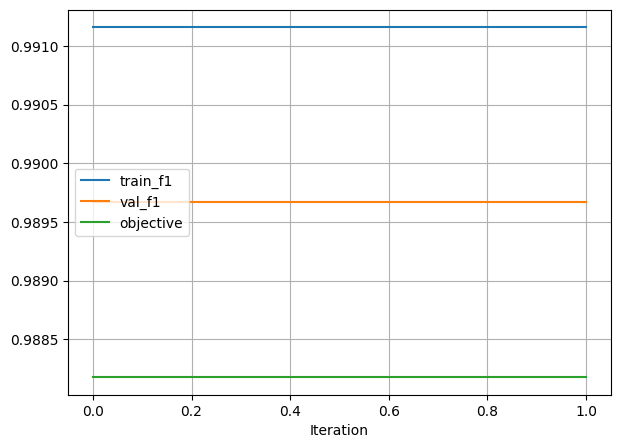

Resultado de la función train_and_evaluate: Pipeline(steps=[('data_pipeline',
                 Pipeline(steps=[('data_processor',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('scaler',
                                                                                    StandardScaler()),
                                                                                   ('selector',
                                                                                    VarianceThreshold(threshold=0.028656716004819928))]),
                                                                   Index(['TSISTOLICA', 'TDIASTOLICA', 'CMes_6', 'CMes_5', 'CMes_4', 'CMes_3',
       '

In [ ]:
# Obtener los parámetros optimizados del diccionario
optimized_params = params['params']

# Llamar a la función con los parámetros optimizados
best_model, best_result = train_and_evaluate(
    alpha=optimized_params['alpha'],
    scaler_choice=optimized_params['scaler_choice'],
    imputer_strategy=optimized_params['imputer_strategy'],
    knn_imputer=optimized_params['knn_imputer'],
    knn_imputer_k=optimized_params['knn_imputer_k'],
    selector=optimized_params['selector'],
    variance_threshold=optimized_params['variance_threshold'],
    k_best=optimized_params['k_best'],
    learning_rate=optimized_params['learning_rate'],
    max_depth=optimized_params['max_depth'],
    min_child_weight=optimized_params['min_child_weight'],
    subsample=optimized_params['subsample'],
    colsample_bytree=optimized_params['colsample_bytree']
)

# Utilizar el resultado, si es necesario
print("Resultado de la función train_and_evaluate:", best_model)

In [ ]:
test_preds = best_model.predict_proba(X_test)[:, 1]

In [ ]:
best_model.fit(X, y)

Pipeline(steps=[('data_pipeline',
                 Pipeline(steps=[('data_processor',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('scaler',
                                                                                    StandardScaler()),
                                                                                   ('selector',
                                                                                    VarianceThreshold(threshold=0.028656716004819928))]),
                                                                   Index(['TSISTOLICA', 'TDIASTOLICA', 'CMes_6', 'CMes_5', 'CMes_4', 'CMes_3',
       'CMes_2', 'CMes_1', 'S...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.18475369901176975, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=4,
                               max_leaves=None, min_child_weight=5, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=42, ...))])

In [ ]:
with open("best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

In [ ]:
test_preds = best_model.predict_proba(X_test)[:, 1]
train_preds = best_model.predict_proba(X_train)[:, 1]
ths = np.linspace(0, 1, 1000)
best_th = ths[np.argmax([f1_score(y_test, test_preds>th) for th in ths])]
best_th

0.3983983983983984

In [ ]:
test_f1 = f1_score(y_test, test_preds>best_th)
train_f1 = f1_score(y_train, train_preds>best_th)
print(f"Train f1: {train_f1}")
print(f"Test f1: {test_f1}")

Train f1: 0.9338709677419355
Test f1: 0.9324783100716709


Xgboost nos entrega el mejor resultado en terminos de score y eficiencia computacional.
El mejor flujo lo dio el modelo XGB
train f1: 0.9338709677419355
Test f1: 0.9324783100716709

## Submision

Hemos elegido realizar el submission con el modelo XGboost

In [ ]:
# Ruta al archivo df_train.parquet
ruta_df_train = '/content/df_test.parquet'

# Cargar el DataFrame desde el archivo
train = pd.read_parquet(ruta_df_train, engine='pyarrow')

In [ ]:
convertir_tipos_de_test(train)

In [ ]:
df_test = convertir_tipos_de_test(train)

In [ ]:
df_test.shape

(68742, 61)

In [ ]:
submission_pred = best_model.predict_proba(df_test)[:, 1]
submission_pred_bool = submission_pred>best_th
submission_pred_int = [int(item) for item in submission_pred_bool]
submission = pd.DataFrame(data=dict(ID=df_test.index, Target=submission_pred_int))
submission.to_csv("submission_ligth.csv", index=False)